In [1]:
import requests
import re
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

### => Extracting the Data

In [2]:
# storing the webstie link in a varible of url  
url = f"https://www.cars24.com/buy-used-car?sort=bestmatch&serveWarrantyCount=true&gaId=863820005.1694103118&listingSource=ViewAllCars&storeCityId=4709&pinId=560001"

In [3]:
# with the help of request.get we get to know about the resposne of the url.
response = requests.get(url)

In [4]:
# checing for the response of the web site code response.
response

<Response [200]>

In [5]:
# storing all the cities codes in the CITY variable
city = [2,3686,4709,1692,8184,6356,777,290,2378,134,2423,5732,2130,2713,769,132,5,33,666,2920,6105,1674,1605,1606,2598]

In [6]:
len(city)

25

In [7]:
# Appending all the data which are scraping from the webstie.
year=[]
model=[]
km=[]
owner=[]
petrol=[]
Transmission=[]
mon_ins=[]
price=[]
loc=[] 

# Using the loop with city and ettereting the url website.
for i in city:
    url = f"https://www.cars24.com/buy-used-car?sort=bestmatch&serveWarrantyCount=true&listingSource=ViewAllCars&storeCityId={i}"
    #print(url)
    response = requests.get(url)
    soup = BeautifulSoup(response.text)
    
    # in this part extracting the data of year of model from htlm class using Beautifulsoup...
    for i in soup.find_all('h2' , class_ = '_2lmIw'):
        #print(i.text)
        text=i.text
        regex=re.findall('^\d+',text)
        if regex:
            year.append(regex[0])
        else:
            year.append(np.nan)
            
            
    #extracting the data of model of the car from htlm class using Beautifulsoup in loop...
    for i in soup.find_all('h2' , class_ = '_2lmIw'):
        #print(i.text)
        text=i.text
        regex=re.findall('^\d+\s(.+)',text)
        if regex:
            model.append(regex[0])
        else:
            model.append(np.nan)
            
            
    #extracting the data of kilometer of car from htlm class using Beautifulsoup in loop...
    for i in soup.find_all('ul' , class_ = '_13yb6'):
        text=i.text
        #print(text)
        regex=re.findall('(.+)\skm',text)
        if regex:
            km.append(regex[0])
        else:
            km.append(np.nan)
            
    #extracting the data of Onwership of the car from htlm class using Beautifulsoup in loop...
    for i in soup.find_all('ul' , class_ = '_13yb6'):
        text=i.text
        #print(text)
        regex=re.findall('km(.+)\sOwner',text)
        if regex:
            owner.append(regex[0])
        else:
            owner.append(np.nan)
            
            
    #extracting the data of Fuel type of the car from htlm class using Beautifulsoup in loop...
    for i in soup.find_all('ul' , class_ = '_13yb6'):
        text=i.text
        #print(text)
        regex=re.findall('Petrol|CNG|Diesel',text)
        if regex:
            petrol.append(regex[0])
        else:
            petrol.append(np.nan)
            
            
    #extracting the data of Transmission the car from htlm class using Beautifulsoup in loop...
    for i in soup.find_all('ul' , class_ = '_1hOnS'):
        text=i.text
        regex=re.findall('Manual|Automatic',text)
        if regex:
            Transmission.append(regex[0])
        else:
            Transmission.append(np.nan)
            
    
    #extracting the data of Insurance of the car from htlm class using Beautifulsoup in loop...        
    for i in soup.find_all('div' , class_ = '_1Em-A'):
        text=i.text
        #print(text)
        regex=re.findall('₹(.+)\/',text)
        if regex:
            mon_ins.append(regex[0])
        else:
            mon_ins.append(np.nan)
            
            
    #extracting the data of PRICE of the car from htlm class using Beautifulsoup in loop...
    for i in soup.find_all('div' , class_ = '_18ToE'):
        text=i.text
        #print(text)
        regex=re.findall('^₹(\d+,?\d+,?\d+)',text)
        if regex:
            price.append(regex[0])
        else:
            price.append(np.nan)
            
    #extracting the data of location the car from which city, from htlm class using Beautifulsoup in loop...
    for i in soup.find_all('span' , class_ = '_3DYbK'):
        text=i.text
#         print(text)
        regex=re.findall('\w+$|Vivekananda Nagar|Benga',text)
        if regex:
            loc.append(regex[0])
        else:
            loc.append(np.nan)
    

## Converting the data which scraping into the dictionary

In [26]:
# Givig a Name of the value using Dictionary

dic = {"Year":year,
      "Model":model,
      "km_Driven":km,
      "Ownership":owner,
      "Fuel_type":petrol,
      "Transmission":Transmission,
      "Ins/month":mon_ins,
      "City":loc,
      "Price":price}

### Creating a DataFrame

In [27]:
#Convert the scraped data to DataFrame 

df = pd.DataFrame(dic)

### Export into .csv format

In [28]:
df.to_csv('Cars24_1.csv',index=False)

###  Read CSV File

In [29]:
# read the dataframe which is saved in csv.

df = pd.read_csv('Cars24_1.csv')
df

Year               Model km_Driven Ownership Fuel_type Transmission  \
0    2017      Maruti Celerio    35,107       1st    Petrol       Manual   
1    2023  Maruti New Wagon-R     1,155       1st    Petrol       Manual   
2    2020       Hyundai Verna    23,961       1st    Petrol    Automatic   
3    2020         Tata ALTROZ    27,314       1st    Petrol       Manual   
4    2018        Renault Kwid    50,247       2nd    Petrol       Manual   
..    ...                 ...       ...       ...       ...          ...   
495  2021          KIA SELTOS    20,474       1st    Petrol       Manual   
496  2013      Nissan Terrano    73,845       1st    Diesel       Manual   
497  2018   Hyundai Grand i10    32,763       2nd    Petrol       Manual   
498  2012  Maruti Wagon R 1.0    96,820       2nd    Petrol       Manual   
499  2012  Maruti Wagon R 1.0    80,563       3rd    Petrol       Manual   

    Per_month   Location      Price  
0       7,546      Delhi   3,86,000  
1      11,241      Delhi   5,75,000  
2      24,459      Noida  12,85,000  
3      11,144  Ghaziabad   5,70,000  
4       6,041      Delhi   3,09,000  
..        ...        ...        ...  
495    27,066      Nasik  14,22,000  
496     9,443      Nasik   4,83,000  
497     8,543      Nasik   4,37,000  
498     5,161      Nasik   2,64,000  
499     5,044      Nasik   2,58,000  

[500 rows x 9 columns]

In [30]:
# checking for the columns
df.columns

Index(['Year', 'Model', 'km_Driven', 'Ownership', 'Fuel_type', 'Transmission',
       'Per_month', 'Location', 'Price'],
      dtype='object')

In [31]:
# to know the shape of the data that mean how meny rows and columns
# 500 rows and 9 columns.
df.shape

(500, 9)

### Checking for  a duplicates values

In [32]:
# checking for the DUPLICATES.

df.duplicated().sum()

53

In [33]:
# droping the duplicates values
df = df.drop_duplicates()

In [34]:
df.duplicated().sum()

0

In [35]:
df.shape

(447, 9)

In [36]:
# inofrormation about the data 
# 447 entries
# total 0 colmns
# data type, NaN etc
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 0 to 499
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          447 non-null    int64 
 1   Model         447 non-null    object
 2   km_Driven     447 non-null    object
 3   Ownership     447 non-null    object
 4   Fuel_type     447 non-null    object
 5   Transmission  447 non-null    object
 6   Per_month     447 non-null    object
 7   Location      447 non-null    object
 8   Price         447 non-null    object
dtypes: int64(1), object(8)
memory usage: 34.9+ KB


In [37]:
# checking for the Missing values.
df.isna().sum()

Year            0
Model           0
km_Driven       0
Ownership       0
Fuel_type       0
Transmission    0
Per_month       0
Location        0
Price           0
dtype: int64

In [38]:
# checing fo the DataTypes
df.dtypes

Year             int64
Model           object
km_Driven       object
Ownership       object
Fuel_type       object
Transmission    object
Per_month       object
Location        object
Price           object
dtype: object

## Cleaning the Data...

In [39]:
df.head(7)

Year                Model km_Driven Ownership Fuel_type Transmission  \
0  2017       Maruti Celerio    35,107       1st    Petrol       Manual   
1  2023   Maruti New Wagon-R     1,155       1st    Petrol       Manual   
2  2020        Hyundai Verna    23,961       1st    Petrol    Automatic   
3  2020          Tata ALTROZ    27,314       1st    Petrol       Manual   
4  2018         Renault Kwid    50,247       2nd    Petrol       Manual   
5  2013  Hyundai Santro Xing    63,686       1st       CNG       Manual   
6  2019           Honda City    47,815       2nd    Petrol       Manual   

  Per_month   Location      Price  
0     7,546      Delhi   3,86,000  
1    11,241      Delhi   5,75,000  
2    24,459      Noida  12,85,000  
3    11,144  Ghaziabad   5,70,000  
4     6,041      Delhi   3,09,000  
5     4,438   Gurugram   2,27,000  
6    13,861      Noida   7,09,000

### - Removing the special characters,  

In [40]:
# removing the special characters from the km_Driven
df['km_Driven'] = df['km_Driven'].replace(',',"",regex=True)

In [41]:
df['km_Driven']

0      35107
1       1155
2      23961
3      27314
4      50247
       ...  
495    20474
496    73845
497    32763
498    96820
499    80563
Name: km_Driven, Length: 447, dtype: object

In [42]:
df['Ownership']

0      1st
1      1st
2      1st
3      1st
4      2nd
      ... 
495    1st
496    1st
497    2nd
498    2nd
499    3rd
Name: Ownership, Length: 447, dtype: object

In [43]:
df['Ownership'] = df['Ownership'].replace('\D','',regex=True)

In [44]:
df.shape

(447, 9)

In [45]:
df['Ownership']

0      1
1      1
2      1
3      1
4      2
      ..
495    1
496    1
497    2
498    2
499    3
Name: Ownership, Length: 447, dtype: object

In [46]:
# changing the column names

df.rename(columns={'Location':'City','Per_month':'Ins/Month'} , inplace=True)

In [47]:
df['Ins/Month']

0       7,546
1      11,241
2      24,459
3      11,144
4       6,041
        ...  
495    27,066
496     9,443
497     8,543
498     5,161
499     5,044
Name: Ins/Month, Length: 447, dtype: object

In [48]:
# removing the special characters from the columns of ins/month.

df['Ins/Month'] = df['Ins/Month'].replace(',','',regex=True)

In [49]:
# removing the special characters from the columns of Price.


df['Price'] = df['Price'].replace(',','',regex=True)

In [50]:
df.head()

Year               Model km_Driven Ownership Fuel_type Transmission  \
0  2017      Maruti Celerio     35107         1    Petrol       Manual   
1  2023  Maruti New Wagon-R      1155         1    Petrol       Manual   
2  2020       Hyundai Verna     23961         1    Petrol    Automatic   
3  2020         Tata ALTROZ     27314         1    Petrol       Manual   
4  2018        Renault Kwid     50247         2    Petrol       Manual   

  Ins/Month       City    Price  
0      7546      Delhi   386000  
1     11241      Delhi   575000  
2     24459      Noida  1285000  
3     11144  Ghaziabad   570000  
4      6041      Delhi   309000

### - Incorrect Format of the data (Invalid Values , Columns)

In [51]:
df.columns

Index(['Year', 'Model', 'km_Driven', 'Ownership', 'Fuel_type', 'Transmission',
       'Ins/Month', 'City', 'Price'],
      dtype='object')

In [52]:
# to know the unique values are present in a City columns

df['City'].unique()

array(['Delhi', 'Noida', 'Ghaziabad', 'Gurugram', 'Faridabad',
       'Hyderabad', 'Bengaluru', 'Benga', 'Ahmedabad', 'Patna', 'Kochi',
       'Kolkata', 'Lucknow', 'Mumbai', 'Pune', 'Chennai', 'Navalur',
       'Mansarovar', 'Nagpur', 'Chandigarh', 'Ludhiana', 'Rohtak', 'Mori',
       'Vivekananda Nagar', 'Vadodara', 'Surat', 'Rajkot', 'Nasik'],
      dtype=object)

In [53]:
# check for the n number of unique values in city

df['City'].nunique()

28

In [54]:
df.head()

Year               Model km_Driven Ownership Fuel_type Transmission  \
0  2017      Maruti Celerio     35107         1    Petrol       Manual   
1  2023  Maruti New Wagon-R      1155         1    Petrol       Manual   
2  2020       Hyundai Verna     23961         1    Petrol    Automatic   
3  2020         Tata ALTROZ     27314         1    Petrol       Manual   
4  2018        Renault Kwid     50247         2    Petrol       Manual   

  Ins/Month       City    Price  
0      7546      Delhi   386000  
1     11241      Delhi   575000  
2     24459      Noida  1285000  
3     11144  Ghaziabad   570000  
4      6041      Delhi   309000

In [55]:
# to know about all the data from bengaluru from the city column
df[df['City'] == 'Bengaluru']

Year               Model km_Driven Ownership Fuel_type Transmission  \
40  2017   Hyundai Elite i20     41003         1    Petrol       Manual   
41  2010         Hyundai i10    105850         1    Petrol       Manual   
42  2022          Tata NEXON      8660         2    Petrol       Manual   
44  2013         Maruti Ritz    106747         1    Petrol       Manual   
45  2017       Ford Ecosport     80390         1    Petrol       Manual   
46  2017       Maruti Baleno     21957         1    Petrol       Manual   
48  2021        Maruti Swift     29850         1    Petrol       Manual   
50  2018          Tata NEXON     59255         1    Diesel       Manual   
52  2017      Renault Duster     38520         1    Petrol       Manual   
53  2015        Maruti Swift     99666         3    Petrol       Manual   
54  2013       Hyundai Verna     62799         3    Petrol       Manual   
55  2018        Maruti Swift     44590         2    Petrol       Manual   
56  2017       Maruti Ertiga     62538         1    Petrol       Manual   
57  2017  Maruti Wagon R 1.0     14524         1    Petrol       Manual   
58  2019   Hyundai Elite i20     65944         2    Petrol       Manual   
59  2010  Maruti Swift Dzire     40020         2    Petrol       Manual   

   Ins/Month       City    Price  
40     12629  Bengaluru   646000  
41      5083  Bengaluru   260000  
42     22746  Bengaluru  1195000  
44      7038  Bengaluru   360000  
45     12356  Bengaluru   632000  
46     13275  Bengaluru   679000  
48     13196  Bengaluru   675000  
50     16331  Bengaluru   858000  
52     15034  Bengaluru   769000  
53      9482  Bengaluru   485000  
54      8641  Bengaluru   442000  
55     11496  Bengaluru   588000  
56     15341  Bengaluru   806000  
57      8289  Bengaluru   424000  
58     12219  Bengaluru   625000  
59      6354  Bengaluru   325000

In [56]:
# to know about all the data from benga from the city column


df[df['City'] == 'Benga']

Year            Model km_Driven Ownership Fuel_type Transmission  \
43  2016  Volkswagen Ameo     59637         2    Diesel       Manual   
47  2020     Hyundai AURA     21627         2    Petrol    Automatic   
49  2019       Honda City     19024         2    Petrol       Manual   
51  2014      Honda Amaze     45696         1    Petrol       Manual   

   Ins/Month   City   Price  
43     10694  Benga  547000  
47     15621  Benga  799000  
49     17759  Benga  933000  
51      7644  Benga  391000

In [57]:
# here the replace the name of the value that is Benga to Bengaluru , 
# becose of that Benga is nothing but Bengaluru, so after doing this all the Bengaluru data's are store in a singkle value

df['City'] = df['City'].replace('Benga','Bengaluru')

In [58]:
df[df['City']=='Benga']

Empty DataFrame
Columns: [Year, Model, km_Driven, Ownership, Fuel_type, Transmission, Ins/Month, City, Price]
Index: []

In [59]:
df[df['City'] == 'Bengaluru']

Year               Model km_Driven Ownership Fuel_type Transmission  \
40  2017   Hyundai Elite i20     41003         1    Petrol       Manual   
41  2010         Hyundai i10    105850         1    Petrol       Manual   
42  2022          Tata NEXON      8660         2    Petrol       Manual   
43  2016     Volkswagen Ameo     59637         2    Diesel       Manual   
44  2013         Maruti Ritz    106747         1    Petrol       Manual   
45  2017       Ford Ecosport     80390         1    Petrol       Manual   
46  2017       Maruti Baleno     21957         1    Petrol       Manual   
47  2020        Hyundai AURA     21627         2    Petrol    Automatic   
48  2021        Maruti Swift     29850         1    Petrol       Manual   
49  2019          Honda City     19024         2    Petrol       Manual   
50  2018          Tata NEXON     59255         1    Diesel       Manual   
51  2014         Honda Amaze     45696         1    Petrol       Manual   
52  2017      Renault Duster     38520         1    Petrol       Manual   
53  2015        Maruti Swift     99666         3    Petrol       Manual   
54  2013       Hyundai Verna     62799         3    Petrol       Manual   
55  2018        Maruti Swift     44590         2    Petrol       Manual   
56  2017       Maruti Ertiga     62538         1    Petrol       Manual   
57  2017  Maruti Wagon R 1.0     14524         1    Petrol       Manual   
58  2019   Hyundai Elite i20     65944         2    Petrol       Manual   
59  2010  Maruti Swift Dzire     40020         2    Petrol       Manual   

   Ins/Month       City    Price  
40     12629  Bengaluru   646000  
41      5083  Bengaluru   260000  
42     22746  Bengaluru  1195000  
43     10694  Bengaluru   547000  
44      7038  Bengaluru   360000  
45     12356  Bengaluru   632000  
46     13275  Bengaluru   679000  
47     15621  Bengaluru   799000  
48     13196  Bengaluru   675000  
49     17759  Bengaluru   933000  
50     16331  Bengaluru   858000  
51      7644  Bengaluru   391000  
52     15034  Bengaluru   769000  
53      9482  Bengaluru   485000  
54      8641  Bengaluru   442000  
55     11496  Bengaluru   588000  
56     15341  Bengaluru   806000  
57      8289  Bengaluru   424000  
58     12219  Bengaluru   625000  
59      6354  Bengaluru   325000

In [60]:
df['City'].unique()

array(['Delhi', 'Noida', 'Ghaziabad', 'Gurugram', 'Faridabad',
       'Hyderabad', 'Bengaluru', 'Ahmedabad', 'Patna', 'Kochi', 'Kolkata',
       'Lucknow', 'Mumbai', 'Pune', 'Chennai', 'Navalur', 'Mansarovar',
       'Nagpur', 'Chandigarh', 'Ludhiana', 'Rohtak', 'Mori',
       'Vivekananda Nagar', 'Vadodara', 'Surat', 'Rajkot', 'Nasik'],
      dtype=object)

In [61]:
# to know about all the data from Vivekananda Nagar from the city column


df[df['City'] == 'Vivekananda Nagar']

Year              Model km_Driven Ownership Fuel_type Transmission  \
400  2021       Hyundai AURA     46196         1    Petrol    Automatic   
401  2018     Datsun Go Plus     10216         1    Petrol       Manual   
402  2022      Hyundai Creta     21359         1    Petrol    Automatic   
403  2018         Tata TIGOR     62813         1    Petrol       Manual   
404  2020          MG HECTOR     34312         1    Petrol    Automatic   
405  2018        Honda Amaze     33189         1    Petrol       Manual   
406  2017     Datsun Redi Go     20228         1    Petrol       Manual   
407  2011    Maruti Alto K10     76371         2    Petrol       Manual   
408  2014       Nissan Micra     67271         2    Petrol    Automatic   
409  2018     Ford FREESTYLE     33693         1    Petrol       Manual   
410  2019       Maruti Swift     68082         2    Petrol       Manual   
411  2019        Skoda Rapid     47901         1    Petrol       Manual   
412  2018         Tata TIGOR     34052         1    Petrol       Manual   
413  2017    Mahindra Kuv100     54698         3    Petrol       Manual   
414  2017  Hyundai Elite i20     77448         2    Petrol       Manual   
415  2019      Ford Ecosport     70693         3    Diesel       Manual   
416  2014        Hyundai Eon     48407         1    Petrol       Manual   
417  2020          KIA SONET     56172         1    Diesel    Automatic   
418  2017       Renault Kwid     57346         2    Petrol       Manual   
419  2019         Tata Tiago     67284         2    Petrol       Manual   

    Ins/Month               City    Price  
400     15386  Vivekananda Nagar   787000  
401      8622  Vivekananda Nagar   441000  
402     36165  Vivekananda Nagar  1900000  
403      9365  Vivekananda Nagar   479000  
404     30455  Vivekananda Nagar  1600000  
405     13060  Vivekananda Nagar   668000  
406      5767  Vivekananda Nagar   295000  
407      4555  Vivekananda Nagar   233000  
408      7390  Vivekananda Nagar   378000  
409     12082  Vivekananda Nagar   618000  
410     11085  Vivekananda Nagar   567000  
411     16826  Vivekananda Nagar   884000  
412     11398  Vivekananda Nagar   583000  
413      7175  Vivekananda Nagar   367000  
414     10088  Vivekananda Nagar   516000  
415     14663  Vivekananda Nagar   750000  
416      5494  Vivekananda Nagar   281000  
417     22708  Vivekananda Nagar  1193000  
418      7292  Vivekananda Nagar   373000  
419      9443  Vivekananda Nagar   483000

In [62]:
# here the replace the name of the value that is Vivekananda Nagar to Coimbatore , 
# becose of that Vivekananda Nagar is nothing but its a place in a Coimbatore that  is city name and its give us good information, 
# so after doing this all the Vivekananda Nagar data's are store in a singkle value

df['City'] = df['City'].replace('Vivekananda Nagar','Coimbatore')

In [63]:
df[df['City'] == 'Coimbatore'].count()

Year            20
Model           20
km_Driven       20
Ownership       20
Fuel_type       20
Transmission    20
Ins/Month       20
City            20
Price           20
dtype: int64

In [64]:
# to know about all the data from Gurugram from the city column


df[df['City'] == 'Gurugram']

Year                Model km_Driven Ownership Fuel_type Transmission  \
5    2013  Hyundai Santro Xing     63686         1       CNG       Manual   
9    2019        Mahindra Thar     36055         1    Diesel       Manual   
10   2019         Maruti Swift     32501         1    Petrol       Manual   
12   2015      Maruti Alto K10     11162         1    Petrol       Manual   
18   2020        Hyundai Verna     47741         1    Diesel       Manual   
314  2018         Renault Kwid     49390         1    Petrol       Manual   
326  2017         Maruti IGNIS     51497         2    Petrol       Manual   
327  2021      Hyundai NEW I20      6616         1    Petrol    Automatic   
329  2014         Maruti Swift     44060         1    Diesel       Manual   
330  2018        Hyundai Creta     58196         1    Petrol       Manual   
333  2019   Maruti New Wagon-R     22863         2    Petrol       Manual   
335  2019        Ford New Figo     63244         1    Diesel       Manual   
337  2017         Maruti Swift     93464         1    Petrol       Manual   
338  2018       Maruti S Cross     64362         1    Diesel       Manual   
339  2018         Maruti Swift     98221         2       CNG       Manual   

    Ins/Month      City   Price  
5        4438  Gurugram  227000  
9       17016  Gurugram  894000  
10      10870  Gurugram  556000  
12       5806  Gurugram  297000  
18      18768  Gurugram  986000  
314      5748  Gurugram  294000  
326      7546  Gurugram  386000  
327     18006  Gurugram  946000  
329      7742  Gurugram  396000  
330     15601  Gurugram  798000  
333      8172  Gurugram  418000  
335     10166  Gurugram  520000  
337      7761  Gurugram  397000  
338     12199  Gurugram  624000  
339     10694  Gurugram  547000

In [65]:
# here the replace the name of the value that is Gurugram to Gurgaon , 
# becose of that Gurugram is nothing but Gurgaon, so after doing this all the Gurgaon data's are store in a singkle value

df['City'] = df['City'].replace('Gurugram','Gurgaon')
df[df['City']=='Gurgaon']

Year                Model km_Driven Ownership Fuel_type Transmission  \
5    2013  Hyundai Santro Xing     63686         1       CNG       Manual   
9    2019        Mahindra Thar     36055         1    Diesel       Manual   
10   2019         Maruti Swift     32501         1    Petrol       Manual   
12   2015      Maruti Alto K10     11162         1    Petrol       Manual   
18   2020        Hyundai Verna     47741         1    Diesel       Manual   
314  2018         Renault Kwid     49390         1    Petrol       Manual   
326  2017         Maruti IGNIS     51497         2    Petrol       Manual   
327  2021      Hyundai NEW I20      6616         1    Petrol    Automatic   
329  2014         Maruti Swift     44060         1    Diesel       Manual   
330  2018        Hyundai Creta     58196         1    Petrol       Manual   
333  2019   Maruti New Wagon-R     22863         2    Petrol       Manual   
335  2019        Ford New Figo     63244         1    Diesel       Manual   
337  2017         Maruti Swift     93464         1    Petrol       Manual   
338  2018       Maruti S Cross     64362         1    Diesel       Manual   
339  2018         Maruti Swift     98221         2       CNG       Manual   

    Ins/Month     City   Price  
5        4438  Gurgaon  227000  
9       17016  Gurgaon  894000  
10      10870  Gurgaon  556000  
12       5806  Gurgaon  297000  
18      18768  Gurgaon  986000  
314      5748  Gurgaon  294000  
326      7546  Gurgaon  386000  
327     18006  Gurgaon  946000  
329      7742  Gurgaon  396000  
330     15601  Gurgaon  798000  
333      8172  Gurgaon  418000  
335     10166  Gurgaon  520000  
337      7761  Gurgaon  397000  
338     12199  Gurgaon  624000  
339     10694  Gurgaon  547000

In [66]:
# to know about all the data from Navalur from the city column

df[df['City'] == 'Navalur']

Year              Model km_Driven Ownership Fuel_type Transmission  \
221  2011     Hyundai Sonata     74692         1    Petrol       Manual   
222  2019       Renault Kwid     55415         1    Petrol       Manual   
225  2020     Renault Duster     35464         1    Petrol       Manual   
226  2019    Volkswagen Ameo     63623         1    Petrol       Manual   
228  2019  Hyundai Elite i20     33640         1    Petrol       Manual   

    Ins/Month     City    Price  
221      7175  Navalur   367000  
222      8411  Navalur   430250  
225     20081  Navalur  1055000  
226      9560  Navalur   489000  
228     14545  Navalur   744000

In [67]:
# here the replace the name of the value that is Navalur to Chennai , 
# becose of that Navalur is nothing but Chennai, so after doing this all the Chennai data's are store in a single value

df['City'] = df['City'].replace('Navalur','Chennai')
df[df['City']=='Chennai']
# df[df['City']=='Chennai'].count()

Year              Model km_Driven Ownership Fuel_type Transmission  \
220  2017         Honda City     40021         1    Petrol       Manual   
221  2011     Hyundai Sonata     74692         1    Petrol       Manual   
222  2019       Renault Kwid     55415         1    Petrol       Manual   
223  2016         Honda City     40352         2    Petrol    Automatic   
224  2017       Maruti Dzire     68979         1    Petrol       Manual   
225  2020     Renault Duster     35464         1    Petrol       Manual   
226  2019    Volkswagen Ameo     63623         1    Petrol       Manual   
227  2022         Tata PUNCH     36035         1    Petrol       Manual   
228  2019  Hyundai Elite i20     33640         1    Petrol       Manual   
229  2011        Hyundai i10     62606         2    Petrol       Manual   
230  2017    Mahindra XUV500     87634         3    Diesel    Automatic   
231  2013         Honda Brio     66423         2    Petrol       Manual   
232  2017         Honda City     68137         1    Petrol       Manual   
233  2019       Maruti IGNIS     30287         1    Petrol       Manual   
234  2022       Skoda SLAVIA     27524         1    Petrol    Automatic   
235  2012        Hyundai i10     53806         3    Petrol       Manual   
236  2020      Hyundai Creta     55407         2    Diesel       Manual   
237  2018        Skoda Rapid     74310         1    Diesel    Automatic   
238  2020  Hyundai Elite i20     37761         1    Petrol       Manual   
239  2016   Volkswagen Vento     77313         1    Petrol       Manual   

    Ins/Month     City    Price  
220     15284  Chennai   803000  
221      7175  Chennai   367000  
222      8411  Chennai   430250  
223     14760  Chennai   755000  
224     12825  Chennai   656000  
225     20081  Chennai  1055000  
226      9560  Chennai   489000  
227     13822  Chennai   707000  
228     14545  Chennai   744000  
229      5063  Chennai   259000  
230     21699  Chennai  1140000  
231      6276  Chennai   321000  
232     14408  Chennai   737000  
233     10010  Chennai   512000  
234     34909  Chennai  1834000  
235      5063  Chennai   259000  
236     27504  Chennai  1445000  
237     18387  Chennai   966000  
238     13822  Chennai   707000  
239     12297  Chennai   629000

In [68]:
# to know about all the data from Mansarovar from the city column

df[df['City'] == 'Mansarovar'].count()

Year            20
Model           20
km_Driven       20
Ownership       20
Fuel_type       20
Transmission    20
Ins/Month       20
City            20
Price           20
dtype: int64

In [69]:
# here the replace the name of the value that is Mansarovar to Gurgaon , 
# becose of that Mansarovar is nothing but Jaipur, so after doing this all the Jaipur data's are store in a single value

df['City'] = df['City'].replace('Mansarovar','Jaipur')
df[df['City']=='Jaipur']
# df[df['City']=='Jaipur'].count()

Year                   Model km_Driven Ownership Fuel_type Transmission  \
240  2011             Hyundai i20    108687         2    Petrol       Manual   
241  2018            Renault Kwid     64715         1    Petrol    Automatic   
242  2014             Honda Amaze     48079         1    Petrol       Manual   
243  2021     Mahindra BOLERO NEO     43902         1    Diesel       Manual   
244  2016              Honda Jazz     82180         2    Petrol       Manual   
245  2013             Hyundai i20     68551         1    Petrol       Manual   
246  2015       Hyundai Grand i10     35537         3    Petrol    Automatic   
247  2017              Tata Tiago     67653         1    Petrol    Automatic   
248  2021           Toyota Glanza     58508         1    Petrol       Manual   
249  2017            Renault Kwid     60077         1    Petrol       Manual   
250  2020         Hyundai NEW I20     35979         1    Diesel       Manual   
251  2018         Maruti Alto 800     85648         1    Petrol       Manual   
252  2020  Hyundai GRAND I10 NIOS     22480         1    Petrol       Manual   
253  2018             Honda Amaze     58159         2    Petrol       Manual   
254  2021           Hyundai Creta      5825         3    Petrol    Automatic   
255  2013             Honda Amaze     52034         1    Petrol       Manual   
256  2014           Maruti Ertiga    100227         1    Diesel       Manual   
257  2021              Tata NEXON     24218         1    Petrol    Automatic   
258  2018            Maruti Swift     97229         1    Petrol       Manual   
259  2014             Hyundai Eon     74729         1    Petrol       Manual   

    Ins/Month    City    Price  
240      4555  Jaipur   233000  
241      7097  Jaipur   363000  
242      7292  Jaipur   373000  
243     17416  Jaipur   915000  
244      9443  Jaipur   483000  
245      7116  Jaipur   364000  
246      7742  Jaipur   396000  
247      8465  Jaipur   433000  
248     13666  Jaipur   699000  
249      5455  Jaipur   279000  
250     15760  Jaipur   828000  
251      5494  Jaipur   281000  
252      9814  Jaipur   502000  
253     10440  Jaipur   534000  
254     30131  Jaipur  1583000  
255      6647  Jaipur   340000  
256     12903  Jaipur   660000  
257     19853  Jaipur  1043000  
258     10049  Jaipur   514000  
259      4184  Jaipur   214000

In [70]:
# to know about all the data from Mori from the city column


df[df['City'] == 'Mori'].count()

Year            20
Model           20
km_Driven       20
Ownership       20
Fuel_type       20
Transmission    20
Ins/Month       20
City            20
Price           20
dtype: int64

In [71]:
# here the replace the name of the value that is Mori to Indore , 
# becose of that Mori is nothing but Gurgaon, so after doing this all the Indore data's are store in a single value

df['City'] = df['City'].replace('Mori','Indore')
df[df['City']=='Indore']
# df[df['City']=='Jaipur'].count()

Year                 Model km_Driven Ownership Fuel_type Transmission  \
380  2013           Hyundai i10     54900         1    Petrol       Manual   
381  2018  Mahindra KUV 100 NXT     12882         1    Petrol       Manual   
382  2016     Hyundai Grand i10     39862         2    Petrol       Manual   
383  2015    Maruti Swift Dzire     51273         1    Petrol       Manual   
384  2016          Maruti Swift     82380         1    Petrol       Manual   
385  2015     Hyundai Elite i20         2         2    Diesel       Manual   
386  2010           Hyundai i10     70706         2    Petrol       Manual   
387  2014           Honda Amaze     55544         2    Petrol       Manual   
388  2018          Maruti Swift     47004         1    Petrol       Manual   
389  2017     Hyundai Grand i10     32367         1    Petrol       Manual   
390  2019           Hyundai Eon     84957         1       CNG       Manual   
391  2018         Hyundai Xcent     41716         1    Petrol       Manual   
392  2015           Hyundai i10     21846         2    Petrol       Manual   
393  2017         Ford Ecosport     93866         2    Diesel       Manual   
394  2015       Maruti Alto K10     37961         2    Petrol       Manual   
395  2013           Hyundai Eon     76597         2    Petrol       Manual   
396  2011   Hyundai Santro Xing     73284         2    Petrol       Manual   
397  2012     Toyota Etios Liva     86850         2    Petrol       Manual   
398  2018            Honda City     20263         1    Petrol       Manual   
399  2018         Maruti Baleno     50081         1    Petrol       Manual   

    Ins/Month    City   Price  
380      5357  Indore  274000  
381      6960  Indore  356000  
382      6803  Indore  348000  
383      9443  Indore  483000  
384      8055  Indore  412000  
385      9106  Indore  465800  
386      4262  Indore  218000  
387      6979  Indore  357000  
388     10283  Indore  526000  
389      8504  Indore  435000  
390      6354  Indore  325000  
391      9775  Indore  500000  
392      6823  Indore  349000  
393     11632  Indore  595000  
394      6021  Indore  308000  
395      4047  Indore  207000  
396      3812  Indore  195000  
397      4712  Indore  241000  
398     14624  Indore  748000  
399     11261  Indore  576000

In [72]:
df.duplicated().sum()

0

In [73]:
df.columns

Index(['Year', 'Model', 'km_Driven', 'Ownership', 'Fuel_type', 'Transmission',
       'Ins/Month', 'City', 'Price'],
      dtype='object')

In [74]:
df['Year'].unique()

array([2017, 2023, 2020, 2018, 2013, 2019, 2015, 2010, 2011, 2022, 2014,
       2021, 2016, 2012], dtype=int64)

In [75]:
df['Model'].unique()

array(['Maruti Celerio', 'Maruti New Wagon-R', 'Hyundai Verna',
       'Tata ALTROZ', 'Renault Kwid', 'Hyundai Santro Xing', 'Honda City',
       'Maruti Baleno', 'Maruti Dzire', 'Mahindra Thar', 'Maruti Swift',
       'Maruti Alto K10', 'Hyundai i20', 'Maruti Alto 800',
       'Renault TRIBER', 'Hyundai Grand i10', 'Datsun Go', 'Tata Tiago',
       'Hyundai VENUE', 'Hyundai i10', 'Hyundai i20 Active',
       'Maruti Swift Dzire', 'Datsun Redi Go', 'KIA SELTOS', 'MG HECTOR',
       'Volkswagen Vento', 'Tata NEXON', 'Mahindra XUV500',
       'Hyundai Elite i20', 'Volkswagen Ameo', 'Maruti Ritz',
       'Ford Ecosport', 'Hyundai AURA', 'Honda Amaze', 'Renault Duster',
       'Maruti Ertiga', 'Maruti Wagon R 1.0', 'Hyundai Eon',
       'Volkswagen Polo', 'Datsun Go Plus', 'Toyota Innova Crysta',
       'Tata TIGOR', 'Hyundai NEW SANTRO', 'Hyundai GRAND I10 NIOS',
       'Mahindra Scorpio', 'Hyundai Xcent', 'Maruti Alto',
       'Maruti A Star', 'Ford New Figo', 'Tata PUNCH', 'Honda Jazz',

In [76]:
df[df['km_Driven'] == '1']

Year              Model km_Driven Ownership Fuel_type Transmission  \
261  2011  Toyota Etios Liva         1         1    Petrol       Manual   

    Ins/Month    City   Price  
261      5083  Nagpur  260000

In [77]:
df[df['km_Driven'] == '2']

Year              Model km_Driven Ownership Fuel_type Transmission  \
385  2015  Hyundai Elite i20         2         2    Diesel       Manual   

    Ins/Month    City   Price  
385      9106  Indore  465800

In [78]:
df['Ownership'].unique()

array(['1', '2', '3'], dtype=object)

In [79]:
df['Fuel_type'].unique()

array(['Petrol', 'CNG', 'Diesel'], dtype=object)

In [80]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [81]:
df['Ins/Month'].unique()

array(['7546', '11241', '24459', '11144', '6041', '4438', '13861',
       '10557', '11222', '17016', '10870', '9071', '5806', '3108', '3890',
       '10401', '6432', '8837', '18768', '5572', '9795', '19015', '8758',
       '5513', '12102', '9931', '8152', '5455', '4907', '9619', '6061',
       '6334', '23640', '28989', '12512', '17664', '15341', '17055',
       '15093', '12629', '5083', '22746', '10694', '7038', '12356',
       '13275', '15621', '13196', '17759', '16331', '7644', '15034',
       '9482', '8641', '11496', '8289', '12219', '6354', '4497', '8583',
       '3597', '3617', '5826', '9756', '9052', '6393', '5024', '6412',
       '41190', '3949', '10362', '14272', '9521', '24611', '4786', '7292',
       '13490', '15542', '6628', '10010', '10538', '10792', '13001',
       '5552', '8543', '12043', '11261', '12082', '8778', '3832', '10283',
       '6647', '5063', '6784', '6197', '14858', '2874', '12004', '10444',
       '5357', '13705', '7097', '9736', '7683', '11535', '14017', '16

In [82]:
df['City'].unique()

array(['Delhi', 'Noida', 'Ghaziabad', 'Gurgaon', 'Faridabad', 'Hyderabad',
       'Bengaluru', 'Ahmedabad', 'Patna', 'Kochi', 'Kolkata', 'Lucknow',
       'Mumbai', 'Pune', 'Chennai', 'Jaipur', 'Nagpur', 'Chandigarh',
       'Ludhiana', 'Rohtak', 'Indore', 'Coimbatore', 'Vadodara', 'Surat',
       'Rajkot', 'Nasik'], dtype=object)

In [83]:
df['Price'].unique()

array(['386000', '575000', '1285000', '570000', '309000', '227000',
       '709000', '540000', '574000', '894000', '556000', '464000',
       '297000', '159000', '199000', '532000', '329000', '452000',
       '986000', '285000', '501000', '999000', '448000', '282000',
       '619000', '508000', '417000', '279000', '251000', '492000',
       '310000', '324000', '1242000', '1523000', '640000', '928000',
       '806000', '896000', '772000', '646000', '260000', '1195000',
       '547000', '360000', '632000', '679000', '799000', '675000',
       '933000', '858000', '391000', '769000', '485000', '442000',
       '588000', '424000', '625000', '325000', '230000', '439000',
       '184000', '185000', '298000', '499000', '463000', '327000',
       '257000', '328000', '2164000', '202000', '530000', '730000',
       '487000', '1293000', '244800', '373000', '690000', '795000',
       '339000', '512000', '539000', '552000', '665000', '284000',
       '437000', '616000', '576000', '618000', '449000',

### - Converting the data types 

In [84]:
# checking the data types of all the columns.

df.dtypes

Year             int64
Model           object
km_Driven       object
Ownership       object
Fuel_type       object
Transmission    object
Ins/Month       object
City            object
Price           object
dtype: object

In [85]:
df.head(3)

Year               Model km_Driven Ownership Fuel_type Transmission  \
0  2017      Maruti Celerio     35107         1    Petrol       Manual   
1  2023  Maruti New Wagon-R      1155         1    Petrol       Manual   
2  2020       Hyundai Verna     23961         1    Petrol    Automatic   

  Ins/Month   City    Price  
0      7546  Delhi   386000  
1     11241  Delhi   575000  
2     24459  Noida  1285000

In [86]:
# here are changing the data types of all columns which is to be requed.

df = df.astype({'km_Driven':int, 'Ownership':int, 'Ins/Month':int , 'Price':int})

In [87]:
# here are seen some fo the the data types are chnged.

df.dtypes

Year             int64
Model           object
km_Driven        int32
Ownership        int32
Fuel_type       object
Transmission    object
Ins/Month        int32
City            object
Price            int32
dtype: object

### - Imputing the missing values

In [88]:
# cheching for a NaN's
# as we can see that there is no nan or missing values is there..

df.isna().sum()

Year            0
Model           0
km_Driven       0
Ownership       0
Fuel_type       0
Transmission    0
Ins/Month       0
City            0
Price           0
dtype: int64

In [89]:
print(df['Year'].isna().sum())
print(df['Model'].isna().sum())
print(df['km_Driven'].isna().sum())
print(df['Ownership'].isna().sum())
print(df['Fuel_type'].isna().sum())
print(df['Transmission'].isna().sum())
print(df['Ins/Month'].isna().sum())
print(df['City'].isna().sum())
print(df['Price'].isna().sum())

0
0
0
0
0
0
0
0
0


### - Identifying and treating the Outliers 

In [90]:
df.head()

Year               Model  km_Driven  Ownership Fuel_type Transmission  \
0  2017      Maruti Celerio      35107          1    Petrol       Manual   
1  2023  Maruti New Wagon-R       1155          1    Petrol       Manual   
2  2020       Hyundai Verna      23961          1    Petrol    Automatic   
3  2020         Tata ALTROZ      27314          1    Petrol       Manual   
4  2018        Renault Kwid      50247          2    Petrol       Manual   

   Ins/Month       City    Price  
0       7546      Delhi   386000  
1      11241      Delhi   575000  
2      24459      Noida  1285000  
3      11144  Ghaziabad   570000  
4       6041      Delhi   309000

#### Checking for the outliers in a Price feature

In [91]:
print('Minimum :',df['Price'].min())
print('Maximum :',df['Price'].max())
print('Mean :',df['Price'].mean())
print('Median :',df['Price'].median())
print('STD :',df['Price'].std())
print('Varience :',df['Price'].var())

Minimum : 145000
Maximum : 2164000
Mean : 516957.2706935123
Median : 449000.0
STD : 292783.1489845437
Varience : 85721972329.3055


In [92]:
# Outliers --> IQR

q1 = df['Price'].quantile(0.25)
q3 = df['Price'].quantile(0.75)
IQR = q3-q1
print(IQR)

294500.0


In [93]:
lower = q1 - (1.5*IQR)
upper = q3 + (1.5*IQR)
print(lower)
print(upper)

-117750.0
1060250.0


In [94]:
# in this senario they all are the outliers data which is displayed 

df[(df['Price'] < lower) | (df['Price'] > upper )]

Year                 Model  km_Driven  Ownership Fuel_type Transmission  \
2    2020         Hyundai Verna      23961          1    Petrol    Automatic   
32   2019            KIA SELTOS      78396          1    Petrol    Automatic   
33   2020             MG HECTOR      31691          1    Petrol    Automatic   
42   2022            Tata NEXON       8660          2    Petrol       Manual   
70   2021  Toyota Innova Crysta      17721          2    Diesel       Manual   
76   2020         Hyundai Verna      72640          1    Diesel       Manual   
190  2017          Jeep Compass      32038          1    Diesel       Manual   
207  2021         Hyundai Creta      21402          1    Petrol       Manual   
230  2017       Mahindra XUV500      87634          3    Diesel    Automatic   
234  2022          Skoda SLAVIA      27524          1    Petrol    Automatic   
236  2020         Hyundai Creta      55407          2    Diesel       Manual   
254  2021         Hyundai Creta       5825          3    Petrol    Automatic   
283  2021      Mahindra XUV 3OO      20738          1    Petrol    Automatic   
340  2019      Mahindra Scorpio      33657          2    Diesel       Manual   
402  2022         Hyundai Creta      21359          1    Petrol    Automatic   
404  2020             MG HECTOR      34312          1    Petrol    Automatic   
417  2020             KIA SONET      56172          1    Diesel    Automatic   
426  2019  Toyota Innova Crysta      80686          1    Diesel    Automatic   
428  2018          Jeep Compass      73762          1    Petrol    Automatic   
436  2020      Mahindra XUV 3OO      38503          1    Diesel    Automatic   
474  2022            Maruti XL6       3815          1    Petrol       Manual   
488  2020      Mahindra Scorpio      71822          2    Diesel       Manual   
495  2021            KIA SELTOS      20474          1    Petrol       Manual   

     Ins/Month        City    Price  
2        24459       Noida  1285000  
32       23640   Hyderabad  1242000  
33       28989   Hyderabad  1523000  
42       22746   Bengaluru  1195000  
70       41190   Ahmedabad  2164000  
76       24611   Ahmedabad  1293000  
190      20252       Noida  1064000  
207      22885        Pune  1202300  
230      21699     Chennai  1140000  
234      34909     Chennai  1834000  
236      27504     Chennai  1445000  
254      30131      Jaipur  1583000  
283      23716  Chandigarh  1246000  
340      25226      Rohtak  1325300  
402      36165  Coimbatore  1900000  
404      30455  Coimbatore  1600000  
417      22708  Coimbatore  1193000  
426      35708    Vadodara  1876000  
428      26039    Vadodara  1368000  
436      21394    Vadodara  1124000  
474      24040      Rajkot  1263000  
488      29598       Nasik  1555000  
495      27066       Nasik  1422000

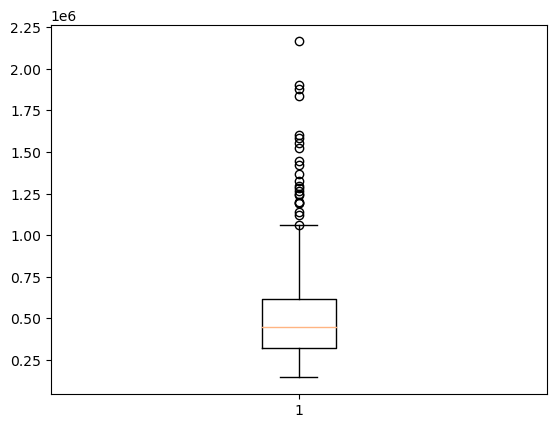

 => Here we can see that the outliers are comes in a price column after the price of 10L 


In [242]:
plt.boxplot(df['Price'])
plt.show()
print(" => Here we can see that the outliers are comes in a price column after the price of 10L ")

#### Checking the outliers in a Ins/month

In [96]:
print('Minimum :',df['Ins/Month'].min())
print('Maximum :',df['Ins/Month'].max())
print('Mean :',df['Ins/Month'].mean())
print('Median :',df['Ins/Month'].median())
print('STD :',df['Ins/Month'].std())
print('Varience :',df['Ins/Month'].var())

Minimum : 2835
Maximum : 41190
Mean : 10040.259507829978
Median : 8778.0
STD : 5560.267807350234
Varience : 30916578.089455374


In [97]:

q1 = df['Ins/Month'].quantile(0.25)
q3 = df['Ins/Month'].quantile(0.75)
IQR = q3-q1
print(IQR)

5758.0


In [99]:
df[ (df['Ins/Month'] < lower ) | (df['Ins/Month'] > upper)]

Year                 Model  km_Driven  Ownership Fuel_type Transmission  \
2    2020         Hyundai Verna      23961          1    Petrol    Automatic   
32   2019            KIA SELTOS      78396          1    Petrol    Automatic   
33   2020             MG HECTOR      31691          1    Petrol    Automatic   
42   2022            Tata NEXON       8660          2    Petrol       Manual   
70   2021  Toyota Innova Crysta      17721          2    Diesel       Manual   
76   2020         Hyundai Verna      72640          1    Diesel       Manual   
207  2021         Hyundai Creta      21402          1    Petrol       Manual   
230  2017       Mahindra XUV500      87634          3    Diesel    Automatic   
234  2022          Skoda SLAVIA      27524          1    Petrol    Automatic   
236  2020         Hyundai Creta      55407          2    Diesel       Manual   
254  2021         Hyundai Creta       5825          3    Petrol    Automatic   
283  2021      Mahindra XUV 3OO      20738          1    Petrol    Automatic   
340  2019      Mahindra Scorpio      33657          2    Diesel       Manual   
402  2022         Hyundai Creta      21359          1    Petrol    Automatic   
404  2020             MG HECTOR      34312          1    Petrol    Automatic   
417  2020             KIA SONET      56172          1    Diesel    Automatic   
426  2019  Toyota Innova Crysta      80686          1    Diesel    Automatic   
428  2018          Jeep Compass      73762          1    Petrol    Automatic   
436  2020      Mahindra XUV 3OO      38503          1    Diesel    Automatic   
474  2022            Maruti XL6       3815          1    Petrol       Manual   
488  2020      Mahindra Scorpio      71822          2    Diesel       Manual   
495  2021            KIA SELTOS      20474          1    Petrol       Manual   

     Ins/Month        City    Price  
2        24459       Noida  1285000  
32       23640   Hyderabad  1242000  
33       28989   Hyderabad  1523000  
42       22746   Bengaluru  1195000  
70       41190   Ahmedabad  2164000  
76       24611   Ahmedabad  1293000  
207      22885        Pune  1202300  
230      21699     Chennai  1140000  
234      34909     Chennai  1834000  
236      27504     Chennai  1445000  
254      30131      Jaipur  1583000  
283      23716  Chandigarh  1246000  
340      25226      Rohtak  1325300  
402      36165  Coimbatore  1900000  
404      30455  Coimbatore  1600000  
417      22708  Coimbatore  1193000  
426      35708    Vadodara  1876000  
428      26039    Vadodara  1368000  
436      21394    Vadodara  1124000  
474      24040      Rajkot  1263000  
488      29598       Nasik  1555000  
495      27066       Nasik  1422000

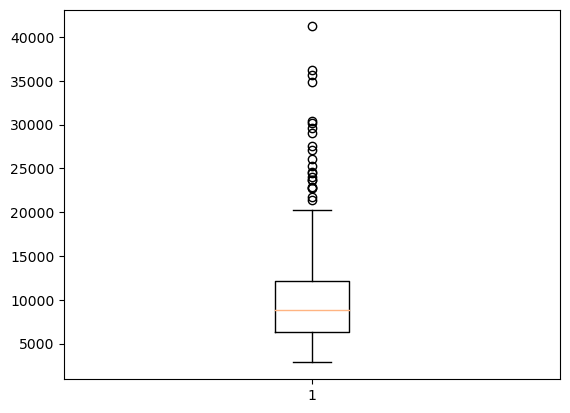

 ==>  Here we can see that the outliers are comes in a Ins/month column after the price of 20729.0 


In [243]:
plt.boxplot(df['Ins/Month'])
plt.show()
print(' ==>  Here we can see that the outliers are comes in a Ins/month column after the price of 20729.0 ')

### Univariate Analysis
Non-Viz  
Min  
Max  
Central tendency  
Dispersion  

In [101]:
df

Year               Model  km_Driven  Ownership Fuel_type Transmission  \
0    2017      Maruti Celerio      35107          1    Petrol       Manual   
1    2023  Maruti New Wagon-R       1155          1    Petrol       Manual   
2    2020       Hyundai Verna      23961          1    Petrol    Automatic   
3    2020         Tata ALTROZ      27314          1    Petrol       Manual   
4    2018        Renault Kwid      50247          2    Petrol       Manual   
..    ...                 ...        ...        ...       ...          ...   
495  2021          KIA SELTOS      20474          1    Petrol       Manual   
496  2013      Nissan Terrano      73845          1    Diesel       Manual   
497  2018   Hyundai Grand i10      32763          2    Petrol       Manual   
498  2012  Maruti Wagon R 1.0      96820          2    Petrol       Manual   
499  2012  Maruti Wagon R 1.0      80563          3    Petrol       Manual   

     Ins/Month       City    Price  
0         7546      Delhi   386000  
1        11241      Delhi   575000  
2        24459      Noida  1285000  
3        11144  Ghaziabad   570000  
4         6041      Delhi   309000  
..         ...        ...      ...  
495      27066      Nasik  1422000  
496       9443      Nasik   483000  
497       8543      Nasik   437000  
498       5161      Nasik   264000  
499       5044      Nasik   258000  

[447 rows x 9 columns]

### doing a vizsualisaion on a numerical columns.

### Viz on Year column on descret data

In [102]:
print('minimum : ',df['Year'].min())
print('maximum : ',df['Year'].max())
print('mean : ',df['Year'].mean())
print('median : ',df['Year'].median())
print('STD : ',df['Year'].std())
print('Varience : ',df['Year'].var())

minimum :  2010
maximum :  2023
mean :  2016.364653243848
median :  2017.0
STD :  3.0802282547667854
Varience :  9.487806101463637


==>> from the above in the column of Year the mean and median are close.

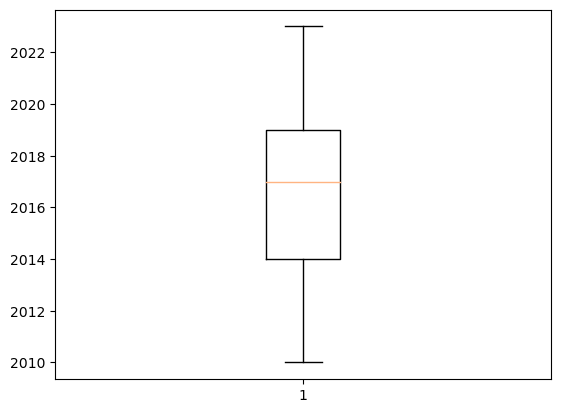

==>> There is no outliers in a year column


In [246]:
plt.boxplot(df['Year'])
plt.show()
print("==>> There is no outliers in a year column")

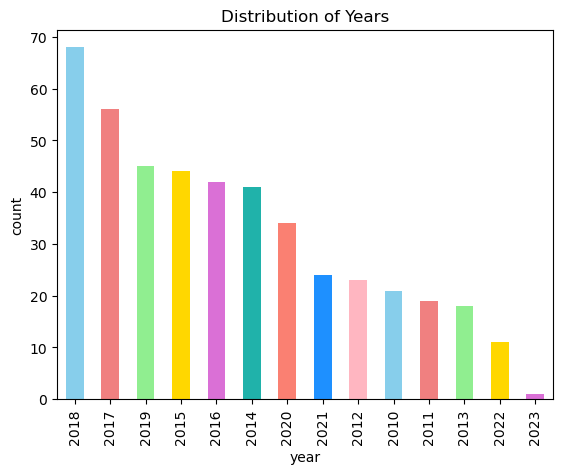

In [103]:
year_count = df['Year'].value_counts()
col = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'orchid', 'lightseagreen', 'salmon', 'dodgerblue', 'lightpink']
year_count.plot(kind='bar',color=col)
plt.xlabel('year')
plt.ylabel('count')
plt.title('Distribution of Years')
plt.show()

here we can absoverd that in the above plot the most number of model year cars are from 2018 to 2020  
and the minimum cars are available in a 2021 to 2022 and ina the year of 2023 is least cars are available

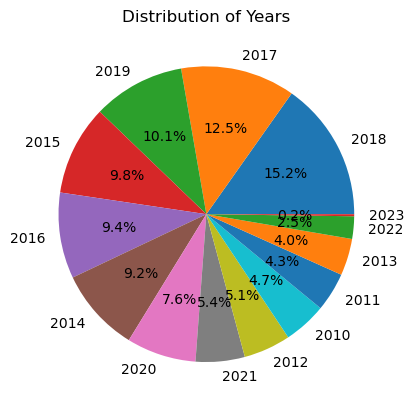

In [104]:
year_count = df['Year'].value_counts()
year_count.plot(kind='pie' , autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Distribution of Years')
plt.show()

in a pie chat graph the maximum number of percentage are comes to 2018 year of model cars

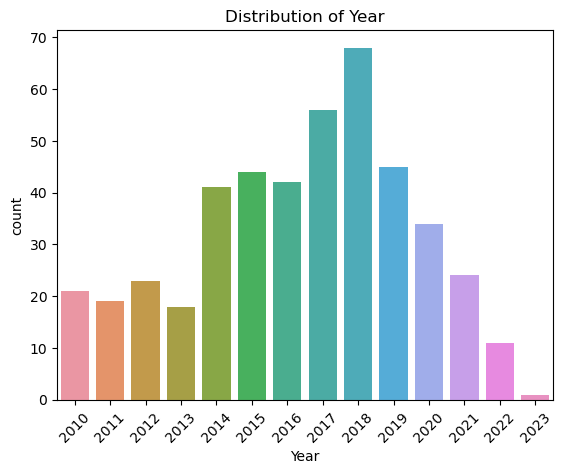

In [105]:
sns.set_palette('pastel')
sns.countplot(data=df, x='Year')
plt.xlabel('Year')
plt.ylabel('count')
plt.title('Distribution of Year')
plt.xticks(rotation=45)
plt.show()

here we can easily absoverd that in a countplot column the maximum number of cars are from 2014 to 2020 and the maximum are in the year or 2018..

In [106]:
df.head(2)

Year               Model  km_Driven  Ownership Fuel_type Transmission  \
0  2017      Maruti Celerio      35107          1    Petrol       Manual   
1  2023  Maruti New Wagon-R       1155          1    Petrol       Manual   

   Ins/Month   City   Price  
0       7546  Delhi  386000  
1      11241  Delhi  575000

### viz on Km-Driven continous data

In [248]:
print('minimum : ',df['km_Driven'].min())
print('maximum : ',df['km_Driven'].max())
print('mean : ',df['km_Driven'].mean())
print('median : ',df['km_Driven'].median())
print('STD : ',df['km_Driven'].std())
print('Varience : ',df['km_Driven'].var())

minimum :  1
maximum :  123488
mean :  54793.87024608501
median :  55407.0
STD :  26375.186734062543
Varience :  695650475.2566688


from above of the km_Driven columns of mean and median are to be close.

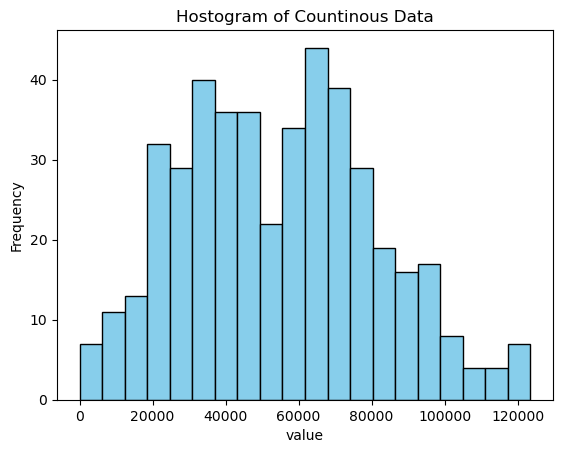

In [108]:
plt.hist(df['km_Driven'] , bins=20, color = 'skyblue', edgecolor='black')
plt.xlabel('value')
plt.ylabel('Frequency')
plt.title('Hostogram of Countinous Data')
plt.show()

In this above plot of hist the most number of Km_Driven cars are from 30000 to 80000

Text(0.5, 0, 'Area of km_Driven')

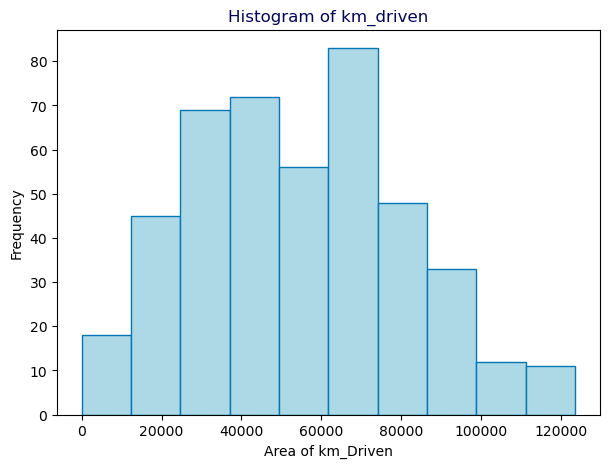

In [109]:
plt.figure(figsize = (7,5))
df["km_Driven"].plot.hist(color = "lightblue",edgecolor = "#0077b6")
plt.title("Histogram of km_driven",color = "#03045e")
plt.xlabel("Area of km_Driven")

In this above plot of hist the most number of Km_Driven cars are from 30000 to 80000

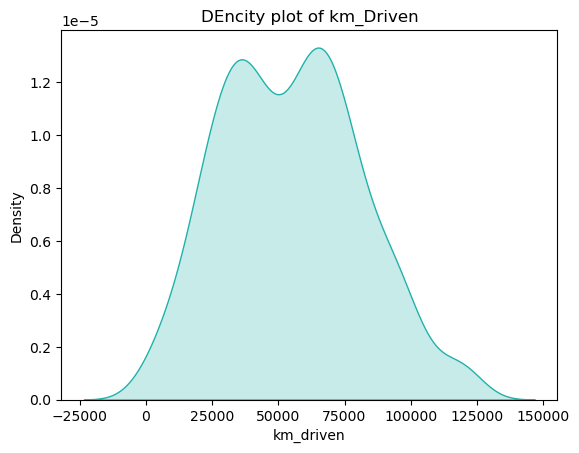

In [110]:
sns.kdeplot(df['km_Driven'] , shade=True, color='lightseagreen')
plt.xlabel('km_driven')
plt.ylabel('Density')
plt.title('DEncity plot of km_Driven')
plt.show()

In above plot of desncity is not a normal distribution as we can see, its starting from the 0 and end on the 135000 of km_Driven

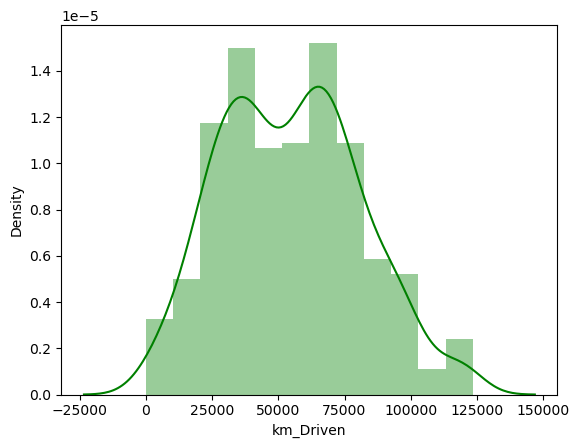

In [111]:
sns.distplot(df['km_Driven'], label='km' , color='g')
plt.show()

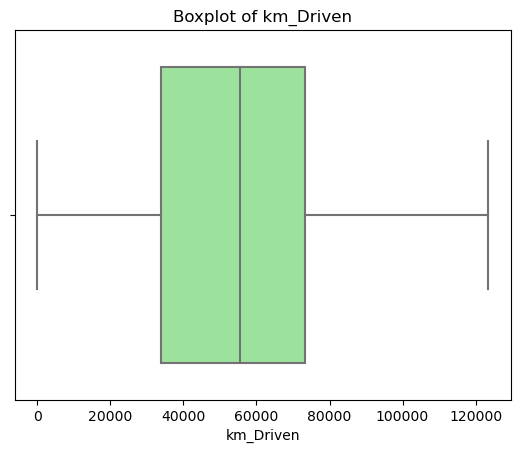

In [112]:
sns.boxplot(df['km_Driven'],color='lightgreen')
plt.xlabel('km_Driven')
plt.title('Boxplot of km_Driven')
plt.show()

from the above plot that is box plot of the columnns of km_Driven in thta column there is no outliers 

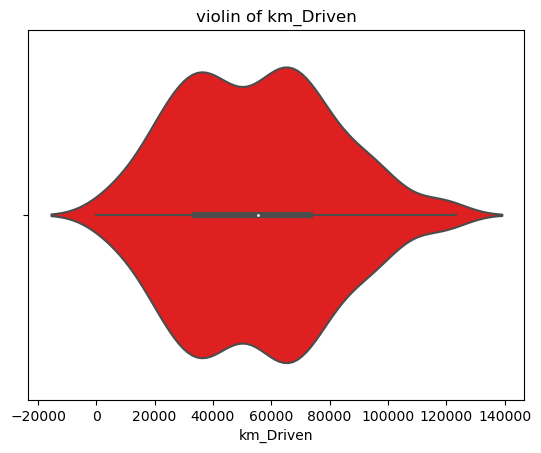

In [113]:
sns.violinplot(df['km_Driven'],color='r')
plt.xlabel('km_Driven')
plt.title('violin of km_Driven')
plt.show()

In [114]:
df.head(2)

Year               Model  km_Driven  Ownership Fuel_type Transmission  \
0  2017      Maruti Celerio      35107          1    Petrol       Manual   
1  2023  Maruti New Wagon-R       1155          1    Petrol       Manual   

   Ins/Month   City   Price  
0       7546  Delhi  386000  
1      11241  Delhi  575000

### Viz on Ownership which is descret data

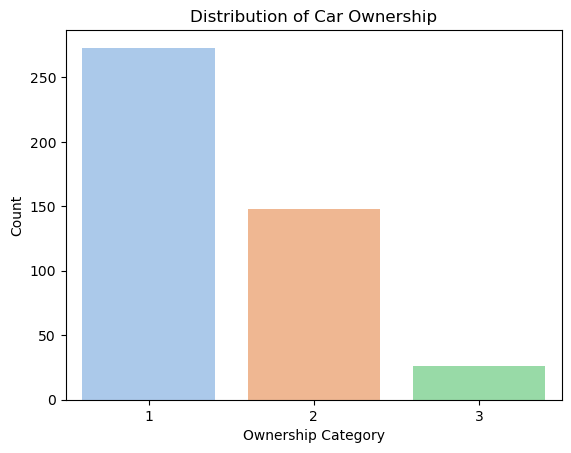

In [115]:
## bar plot

sns.set_palette('pastel')
sns.countplot(data=df, x='Ownership')
plt.xlabel('Ownership Category')
plt.ylabel('Count')
plt.title('Distribution of Car Ownership')
plt.show()

from the above of countplot ghrap column of Ownership is shown the count of the ownership  
which is most number of ownership is 1st that is 250 above cars are owners is 1st only then 2nd & 3rd

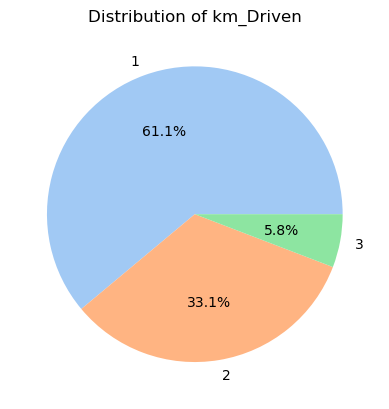

In [116]:
pie = df['Ownership'].value_counts()
pie.plot(kind='pie' , autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Distribution of km_Driven')
plt.show()

In this pie chat Ownership percentage are shown which is 61.1% of 1st ownership and 33.1% of 2nd onwership   
and then the 5.8% of 3rd ownership of cars are available.

<AxesSubplot:>

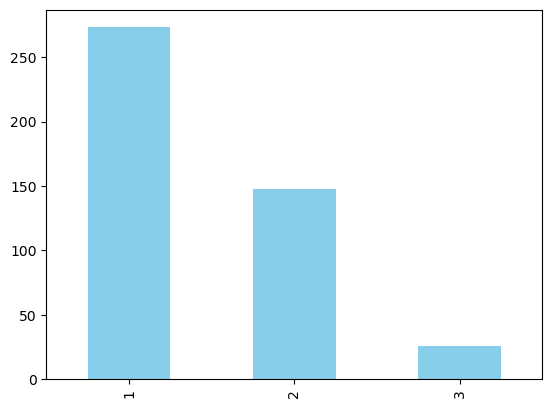

In [117]:
df['Ownership'].value_counts().plot(kind='bar' , color='skyblue')

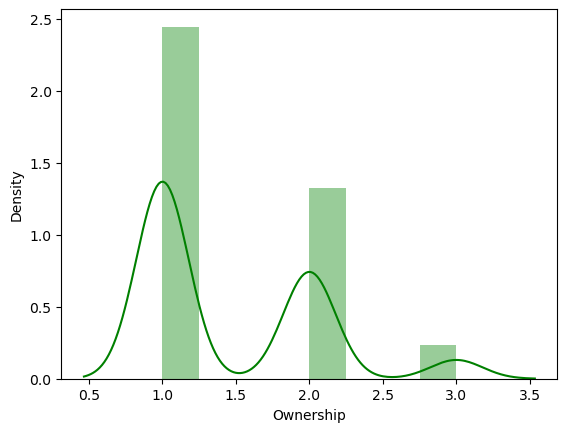

In [118]:
sns.distplot(df['Ownership'], label='Ownership' , color='g')
plt.show()

this above plot is not given any good information about the columns as the dencity is not a normal 

In [119]:
df.head(2)

Year               Model  km_Driven  Ownership Fuel_type Transmission  \
0  2017      Maruti Celerio      35107          1    Petrol       Manual   
1  2023  Maruti New Wagon-R       1155          1    Petrol       Manual   

   Ins/Month   City   Price  
0       7546  Delhi  386000  
1      11241  Delhi  575000

### Viz on Ins/month which is Countinus data set

In [120]:
print('minimum : ',df['Ins/Month'].min())
print('maximum : ',df['Ins/Month'].max())
print('mean : ',df['Ins/Month'].mean())
print('median : ',df['Ins/Month'].median())
print('STD : ',df['Ins/Month'].std())
print('Varience : ',df['Ins/Month'].var())

minimum :  2835
maximum :  41190
mean :  10040.259507829978
median :  8778.0
STD :  5560.267807350234
Varience :  30916578.089455374


From the above the column of ins/month of mean and median are not clodes so there is outliers are there in such a column

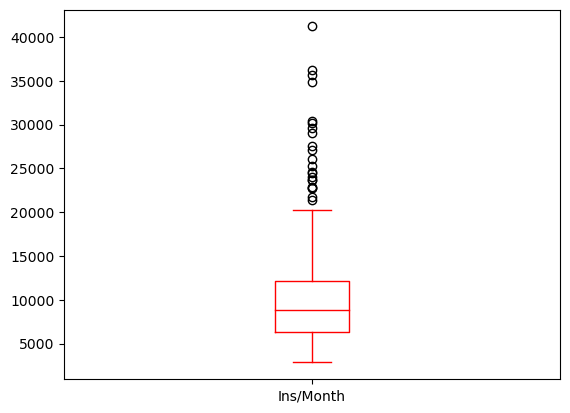

In [261]:
df['Ins/Month'].plot(kind='box',color='r')
plt.show()

from the above column there is a outliers in a column of a ins/month

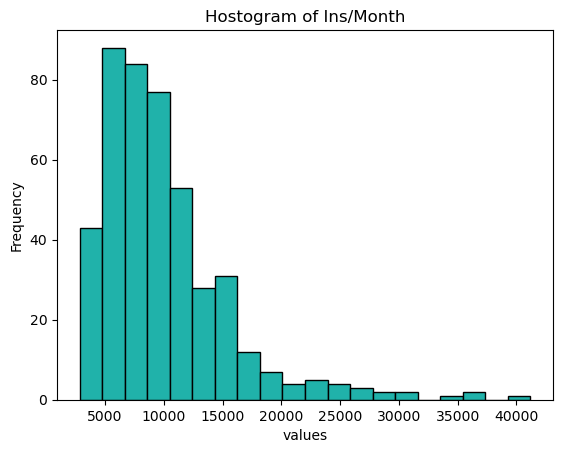

In [121]:
plt.hist(df['Ins/Month'] , bins=20, color = 'lightseagreen', edgecolor='black')
plt.xlabel('values')
plt.ylabel('Frequency')
plt.title('Hostogram of Ins/Month')
plt.show()

In the above column of the histogram of a int/month the price are stared from the 5000 to 15000 is high in count 

Text(0.5, 0, 'Area of Ins/Month')

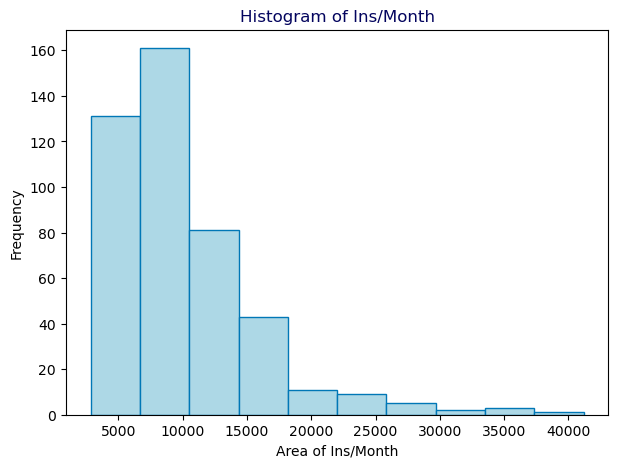

In [122]:
plt.figure(figsize = (7,5))
df["Ins/Month"].plot.hist(color = "lightblue",edgecolor = "#0077b6")
plt.title("Histogram of Ins/Month",color = "#03045e")
plt.xlabel("Area of Ins/Month")

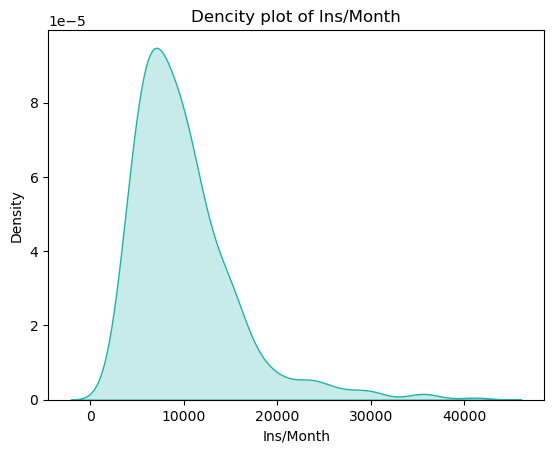

In [263]:
sns.kdeplot(df['Ins/Month'] , shade=True, color='lightseagreen')
plt.xlabel('Ins/Month')
plt.ylabel('Density')
plt.title('Dencity plot of Ins/Month')
plt.show()

From the above column it a dencity(kde) plot which is not a normal distribution becose of there is a outliers in a columns

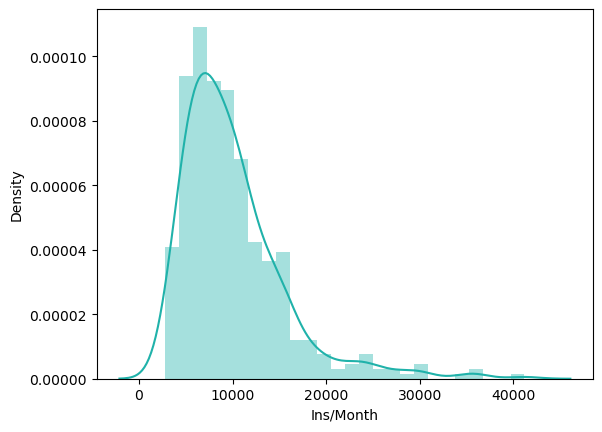

In [124]:
sns.distplot(df['Ins/Month'], label='Emi' , color='lightseagreen')
plt.show()

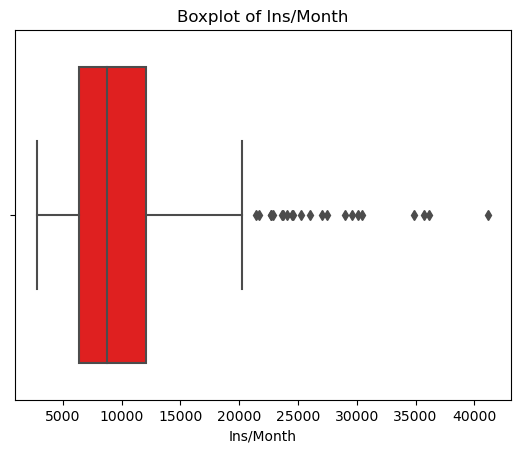

In [125]:
sns.boxplot(df['Ins/Month'],color='r')
plt.xlabel('Ins/Month')
plt.title('Boxplot of Ins/Month')
plt.show()

In the above box plot easily seen the outliers in the column of int/month

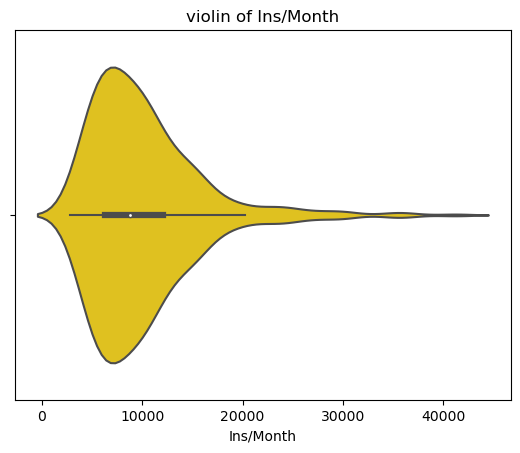

In [126]:
sns.violinplot(df['Ins/Month'],color='gold')
plt.xlabel('Ins/Month')
plt.title('violin of Ins/Month')
plt.show()

## Viz on Price which is Countinus data set

In [127]:
df.head()

Year               Model  km_Driven  Ownership Fuel_type Transmission  \
0  2017      Maruti Celerio      35107          1    Petrol       Manual   
1  2023  Maruti New Wagon-R       1155          1    Petrol       Manual   
2  2020       Hyundai Verna      23961          1    Petrol    Automatic   
3  2020         Tata ALTROZ      27314          1    Petrol       Manual   
4  2018        Renault Kwid      50247          2    Petrol       Manual   

   Ins/Month       City    Price  
0       7546      Delhi   386000  
1      11241      Delhi   575000  
2      24459      Noida  1285000  
3      11144  Ghaziabad   570000  
4       6041      Delhi   309000

In [128]:
print('minimum : ',df['Price'].min())
print('maximum : ',df['Price'].max())
print('mean : ',df['Price'].mean())
print('median : ',df['Price'].median())
print('STD : ',df['Price'].std())
print('Varience : ',df['Price'].var())

minimum :  145000
maximum :  2164000
mean :  516957.2706935123
median :  449000.0
STD :  292783.1489845437
Varience :  85721972329.3055


From the above price column there's mean and median is not a normal it means both are not in a closed

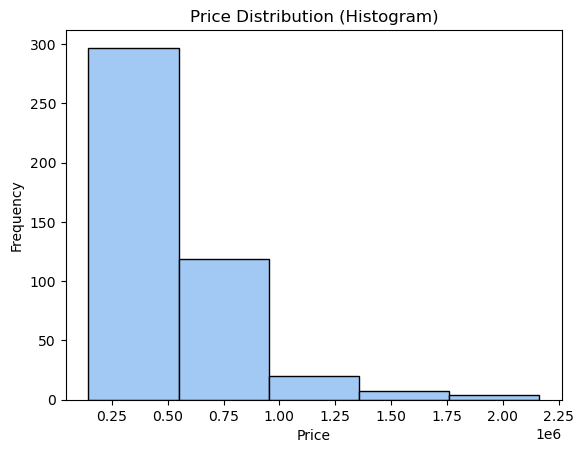

In [129]:
# Create a hsitogram plot

plt.hist(df['Price'] , bins=5 , edgecolor='k')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution (Histogram)')
plt.show()

From the above histogram plot of a price is shown as the price count of 250000 to 1000000 are most of the cars are   available in india

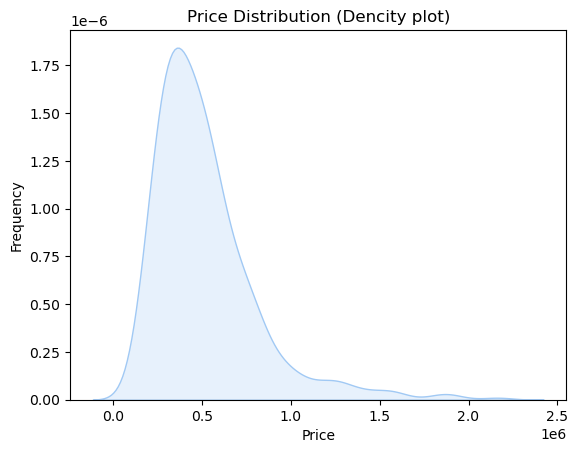

In [130]:
# createing a Density plot

sns.kdeplot(df['Price'], shade=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution (Dencity plot)')
plt.show()

above columns of Density plot is not a normal distribution 

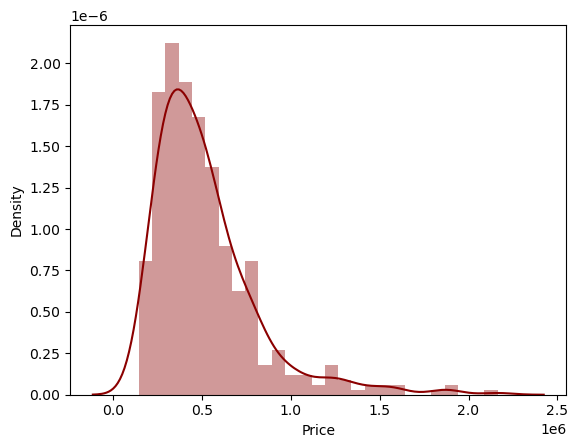

In [131]:
sns.distplot(df['Price'], label='Price' , color='darkred')
plt.show()

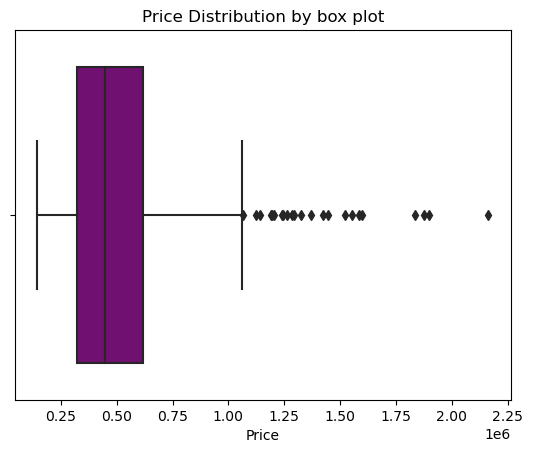

In [132]:
# creating a box plot

sns.boxplot(x=df['Price'] , color='purple')
plt.xlabel('Price')
plt.title('Price Distribution by box plot')
plt.show()

As we get the some outliers in a box plot in a price column of the cars 

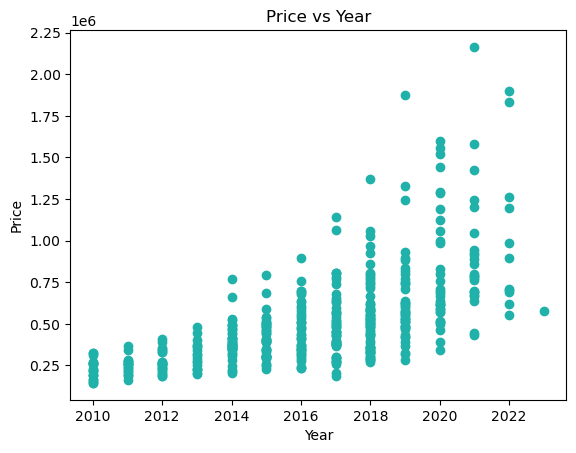

In [133]:
# creating a scater plot

plt.scatter(df['Year'] , df['Price'], color='lightseagreen')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Price vs Year')
plt.show()

on the above of the scatter plot is shown that as the years are increasing price will be also incresing

In [ ]:
# creating a bar plot

plt.bar(df['Year'] , df['Price'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Price vs Year')
plt.show()

### Categorical Variables

### Viz on the model feature

In [135]:
df.head()

Year               Model  km_Driven  Ownership Fuel_type Transmission  \
0  2017      Maruti Celerio      35107          1    Petrol       Manual   
1  2023  Maruti New Wagon-R       1155          1    Petrol       Manual   
2  2020       Hyundai Verna      23961          1    Petrol    Automatic   
3  2020         Tata ALTROZ      27314          1    Petrol       Manual   
4  2018        Renault Kwid      50247          2    Petrol       Manual   

   Ins/Month       City    Price  
0       7546      Delhi   386000  
1      11241      Delhi   575000  
2      24459      Noida  1285000  
3      11144  Ghaziabad   570000  
4       6041      Delhi   309000

### Analysis on the feature of Model

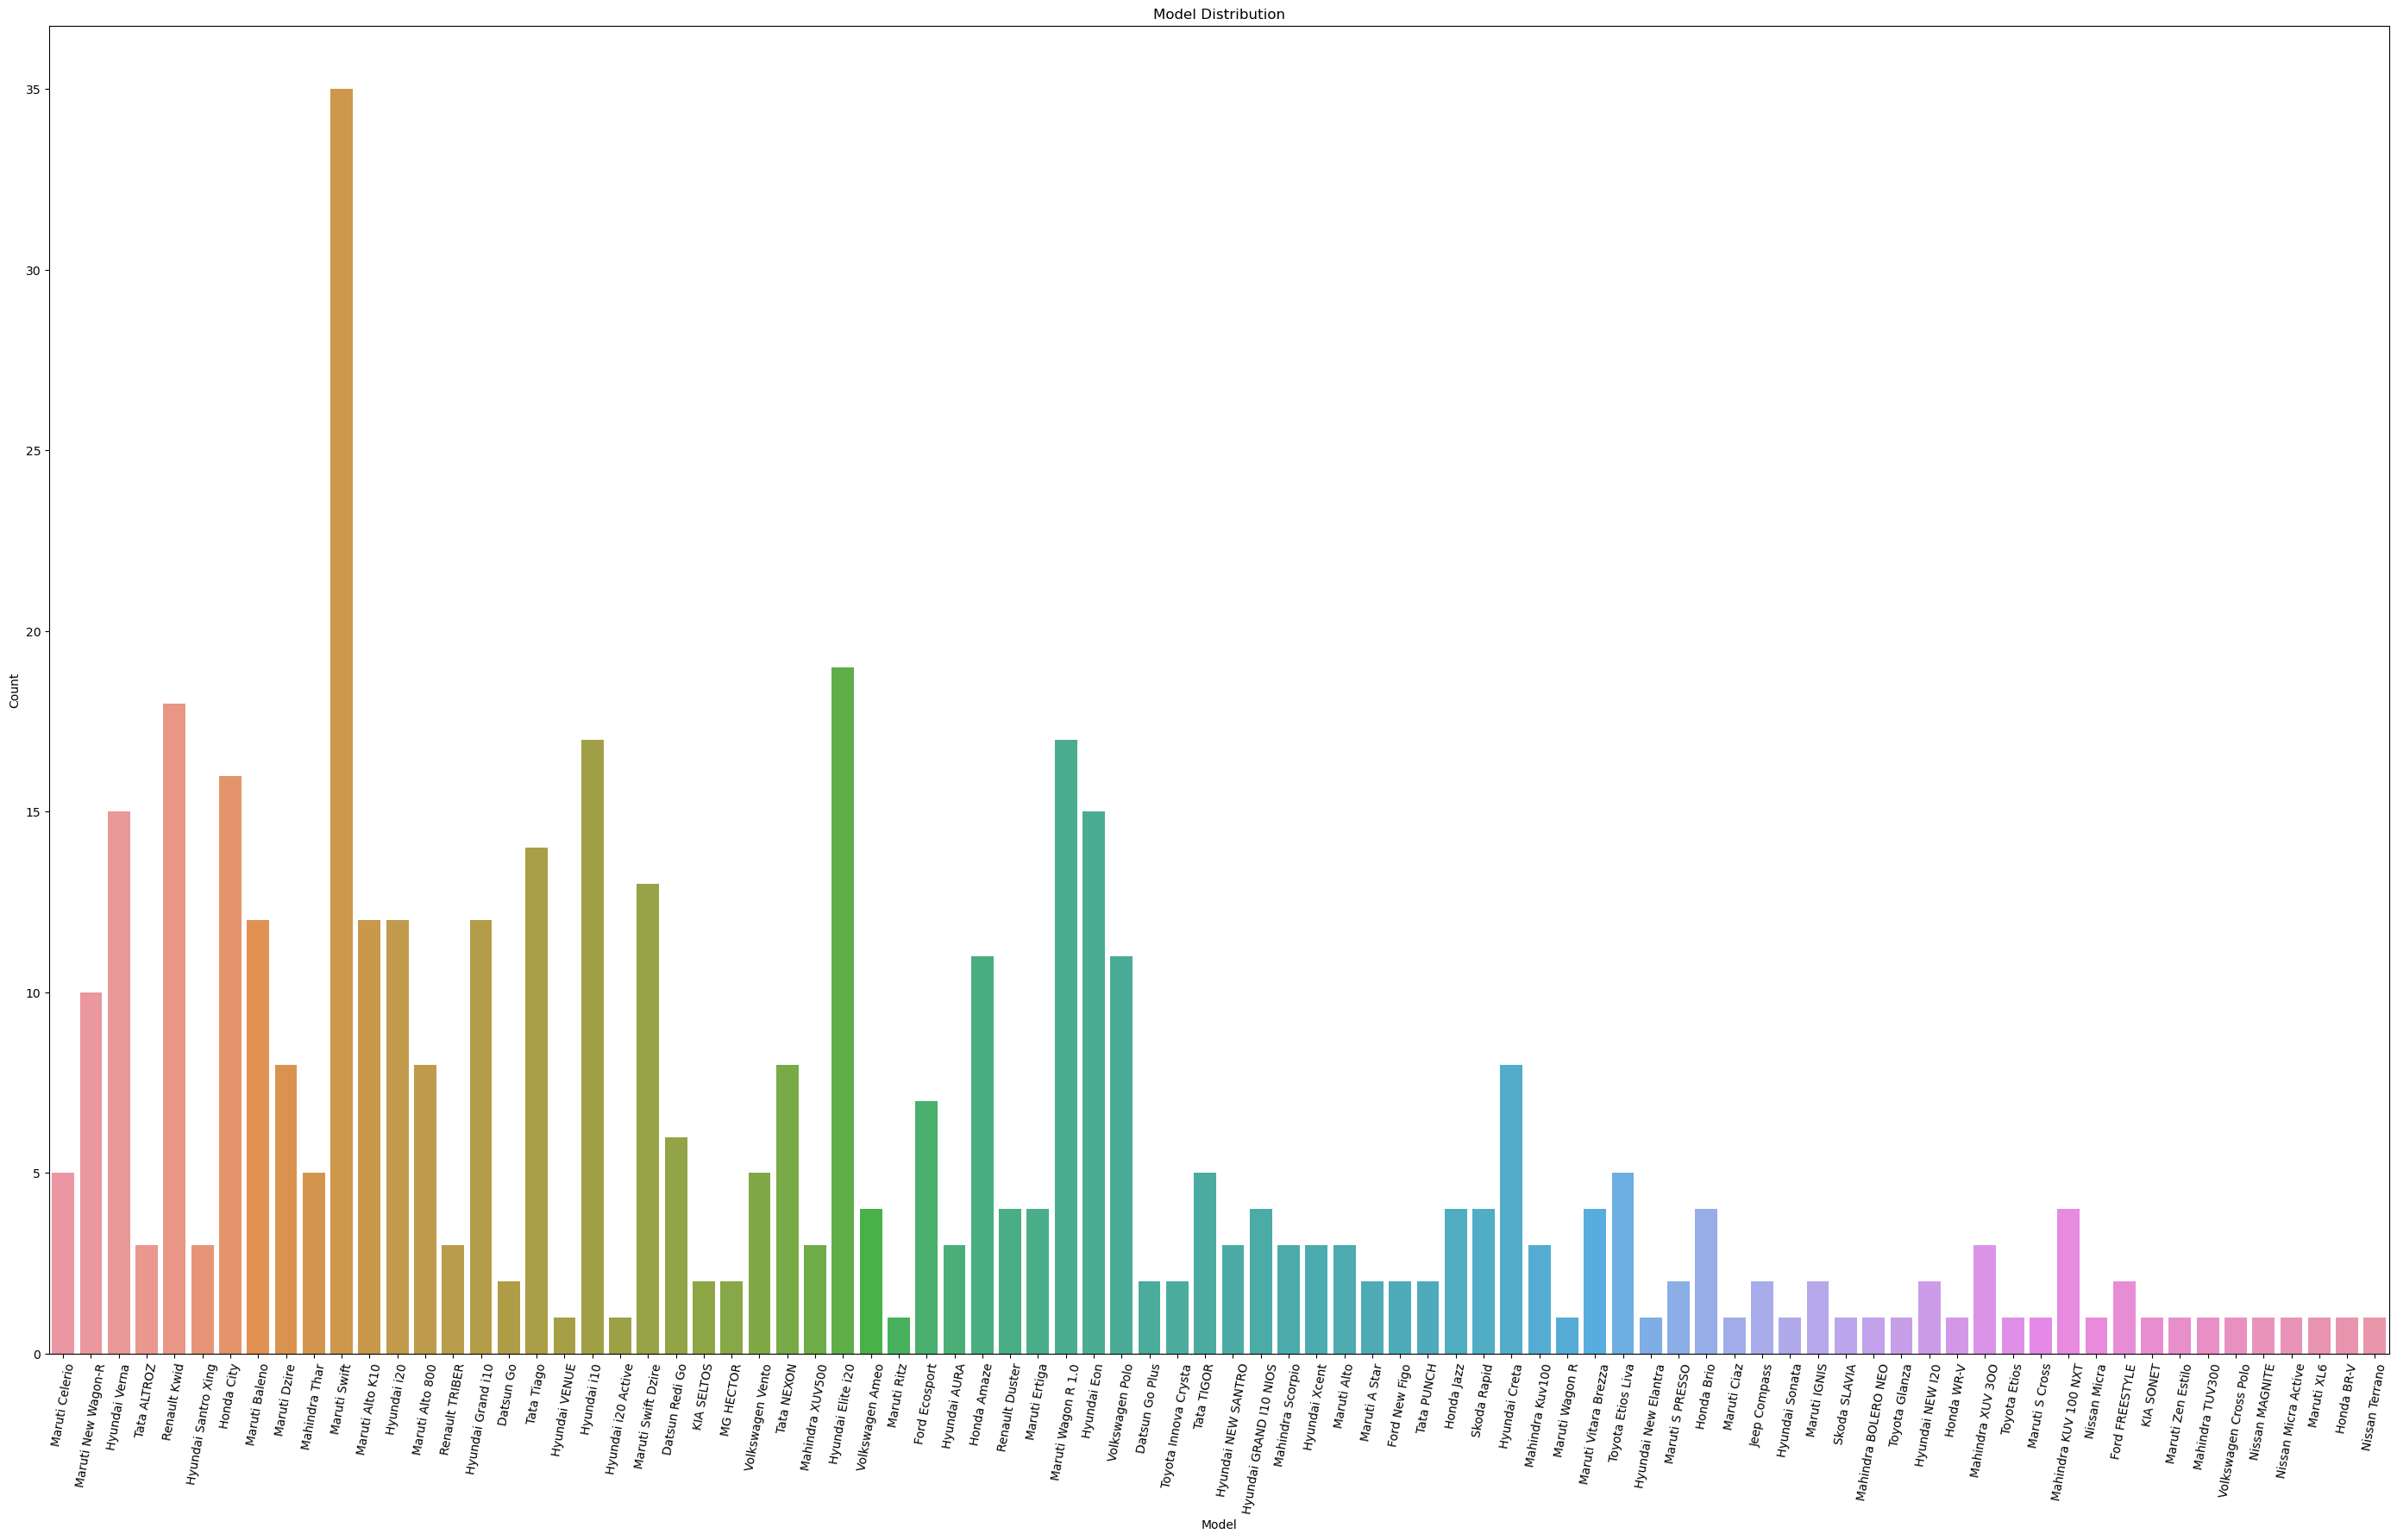

In [136]:
plt.figure(figsize=(35,20))
sns.countplot(data=df, x='Model')
plt.xlabel('Model')
plt.ylabel('Count')
plt.title('Model Distribution')
plt.xticks(rotation=80)
plt.show()

on the above of the countplot is shown that most of the cars in india is Maruti swift..

In [137]:
model_count = df['Model'].value_counts()
model_count

Maruti Swift          35
Hyundai Elite i20     19
Renault Kwid          18
Hyundai i10           17
Maruti Wagon R 1.0    17
                      ..
Hyundai Sonata         1
Maruti Ciaz            1
Hyundai i20 Active     1
Maruti Wagon R         1
Nissan Terrano         1
Name: Model, Length: 84, dtype: int64

### Analysis on the feature of Fuel_type

In [138]:
fuel_count = df['Fuel_type'].value_counts()
fuel_count

Petrol    345
Diesel     78
CNG        24
Name: Fuel_type, dtype: int64

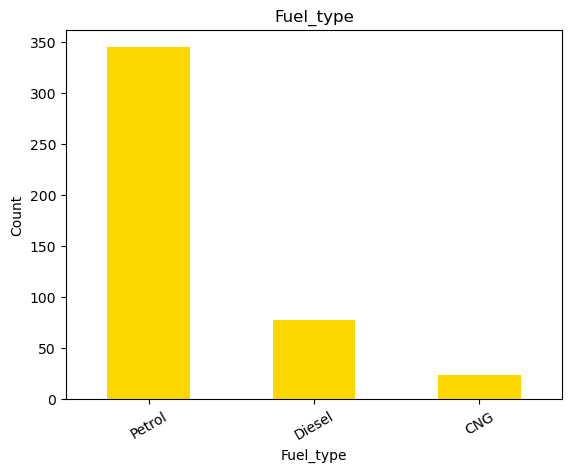

In [139]:
# baar plot on Fuel_type
fuel_count.plot(kind='bar' , color='gold')
plt.xlabel('Fuel_type')
plt.ylabel('Count')
plt.title('Fuel_type')
plt.xticks(rotation=30)
plt.show()

In india most of the used cars of Fuel_types is Petrol compare to others fuel_types 

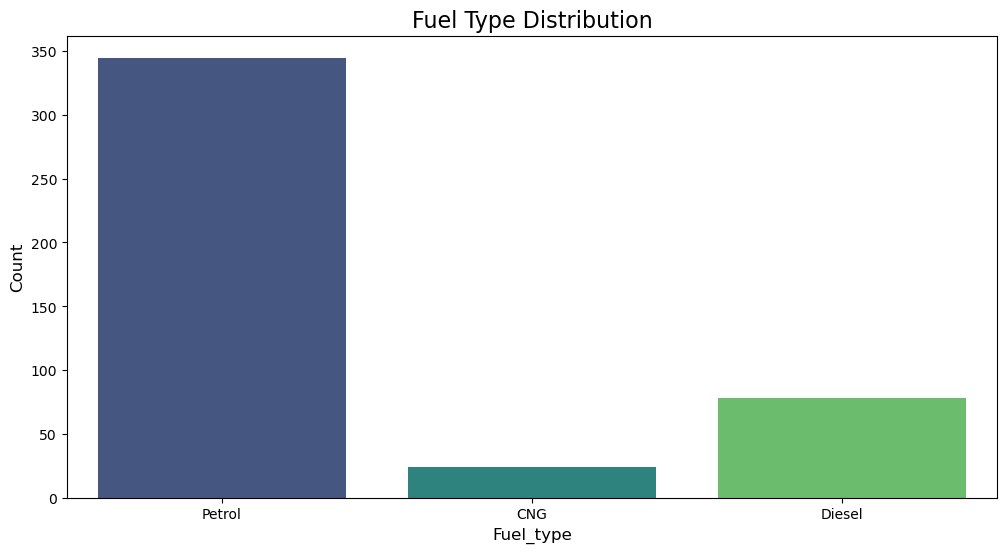

In [140]:
# creating a countplot on fuel type

#incresing the figure size for better visibility
plt.figure(figsize=(12,6))

#Create the count plot with a pleasing color palette
sns.countplot(data=df, x="Fuel_type" , palette='viridis')

#add lable and title
plt.xlabel('Fuel_type' , fontsize=12)
plt.ylabel('Count' , fontsize=12)
plt.title('Fuel Type Distribution', fontsize=16)
plt.show()

In india most of the used cars of Fuel_types is Petrol compare to others fuel_types  
count of petrol is nearst 350 and CNG is nearby 25 and Diesel is 60-70

In [141]:
df['Fuel_type'].unique()

array(['Petrol', 'CNG', 'Diesel'], dtype=object)

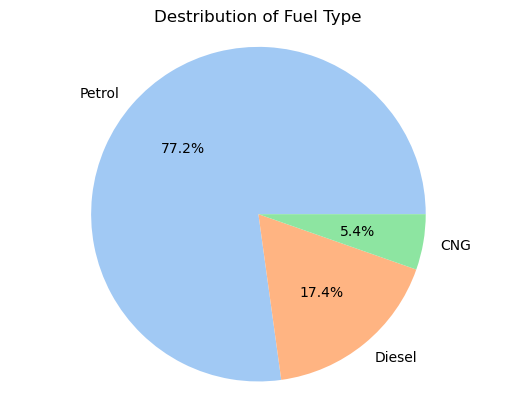

In [142]:
val_count = df['Fuel_type'].value_counts()
plt.pie(val_count , labels=val_count.index , autopct='%1.1f%%')
plt.axis('equal')
plt.title('Destribution of Fuel Type')
plt.show()

In a pie chat plot is shown that petrol of fuel type is more percentage compare to other fueltypes

### Analysis on the feature of Transmission.

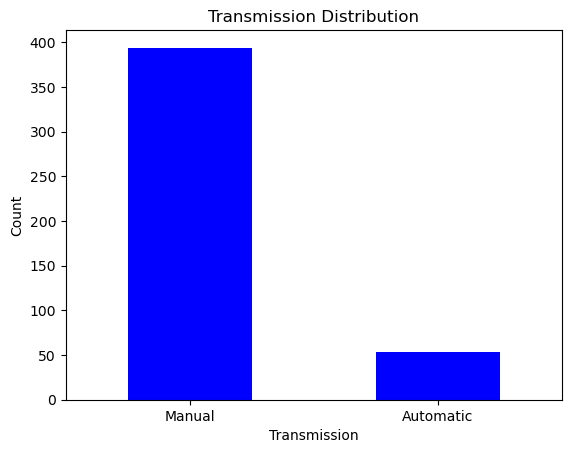

In [143]:
trans_count = df['Transmission'].value_counts()
trans_count.plot(kind='bar', color='blue') 
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.title('Transmission Distribution')
plt.xticks(rotation=0)
plt.show()

in this above count plot there is count of Transmission type that is Manual and Automatic   
in indai there is more number of used cars is Manual with the count of 400 and Automatic is just 50

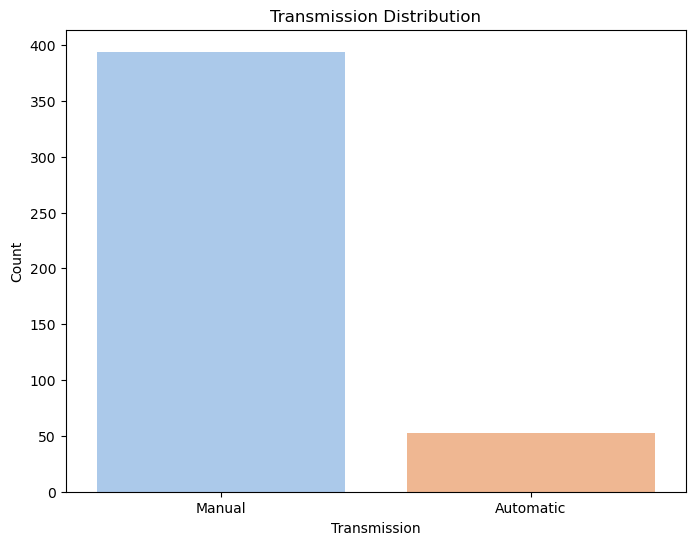

In [144]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Transmission')
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.title('Transmission Distribution')
plt.xticks(rotation=0)
plt.show()

In this above count plot there is count of Transmission type that is Manual and Automatic  
In indai there is more number of used cars is Manual with the count of 400 and Automatic is just 50

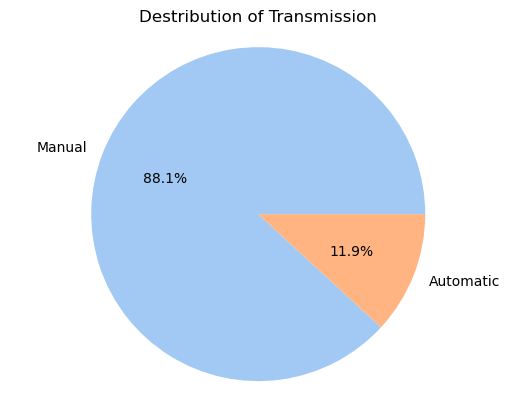

In [298]:
trans_count = df['Transmission'].value_counts()
plt.pie(trans_count , labels=trans_count.index , autopct='%1.1f%%')
plt.axis('equal')
plt.title('Destribution of Transmission')
plt.show()

On the above plot of pie chart is showing the percentage of Transmission  
So in the Transmission of used cars of Manual is 88.1% and Automatic is 11.9% in india

### Analysis on the Feature of City

In [146]:
df['City'].nunique()

26

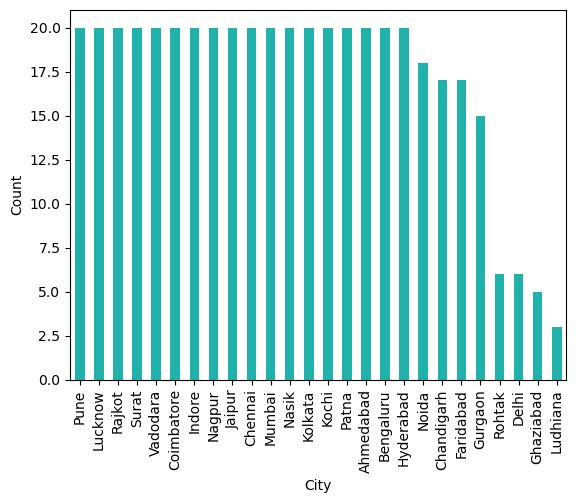

In [147]:
city_con = df['City'].value_counts()
city_con.plot(kind='bar' , color='lightseagreen' )
plt.xlabel("City")
plt.ylabel('Count')
plt.show()

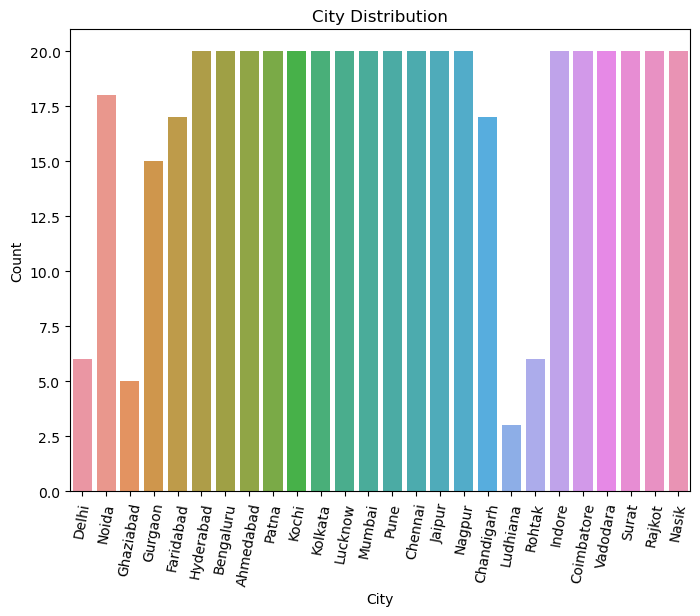

In [148]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='City')
plt.xlabel('City')
plt.ylabel('Count')
plt.title('City Distribution')
plt.xticks(rotation=80)
plt.show()

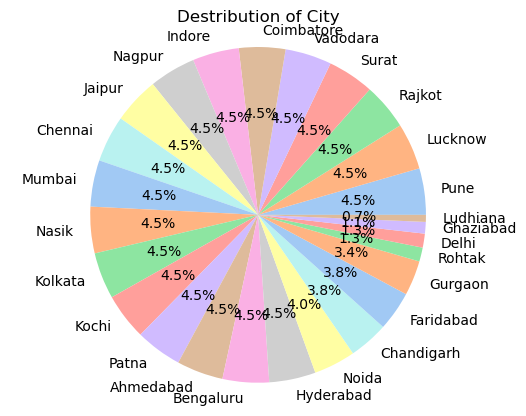

In [149]:
trans_count = df['City'].value_counts()
plt.pie(trans_count , labels=trans_count.index , autopct='%1.1f%%')
plt.axis('equal')
plt.title('Destribution of City' , fontsize=12)
plt.show()

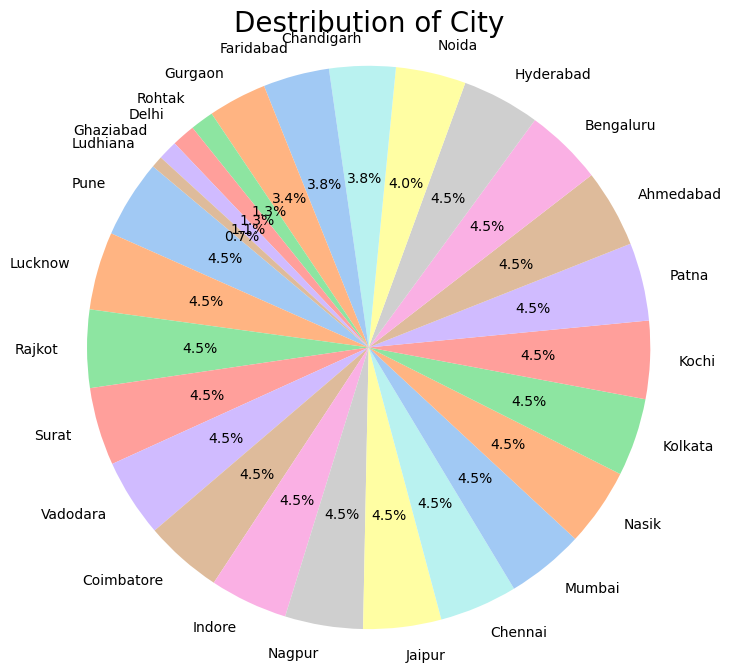

In [150]:
trans_count = df['City'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(trans_count , labels=trans_count.index , autopct='%1.1f%%' , startangle=140)
plt.axis('equal')
plt.title('Destribution of City' , fontsize=20)
plt.show()

# Bi-variate Analysis/Multivariate :

###  price onwersip and fule_type

In [151]:
df.head()

Year               Model  km_Driven  Ownership Fuel_type Transmission  \
0  2017      Maruti Celerio      35107          1    Petrol       Manual   
1  2023  Maruti New Wagon-R       1155          1    Petrol       Manual   
2  2020       Hyundai Verna      23961          1    Petrol    Automatic   
3  2020         Tata ALTROZ      27314          1    Petrol       Manual   
4  2018        Renault Kwid      50247          2    Petrol       Manual   

   Ins/Month       City    Price  
0       7546      Delhi   386000  
1      11241      Delhi   575000  
2      24459      Noida  1285000  
3      11144  Ghaziabad   570000  
4       6041      Delhi   309000

<AxesSubplot:xlabel='Fuel_type', ylabel='Price'>

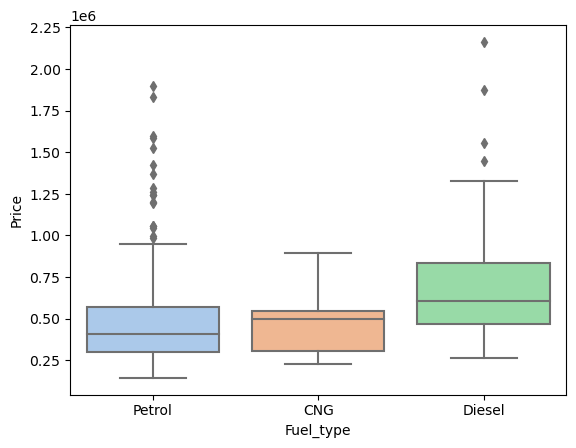

In [152]:
sns.boxplot(x = 'Fuel_type' , y = 'Price' , data=df)

On the above boxplot have absorved that on the basis of Fuel_type with price its getting some outliers on it  
On the Petrol and diesel some of the Outliers are showing..

### Num vs Num

In [158]:
df.head(1)

Year           Model  km_Driven  Ownership Fuel_type Transmission  \
0  2017  Maruti Celerio      35107          1    Petrol       Manual   

   Ins/Month   City   Price  
0       7546  Delhi  386000

In [160]:
# year vs price

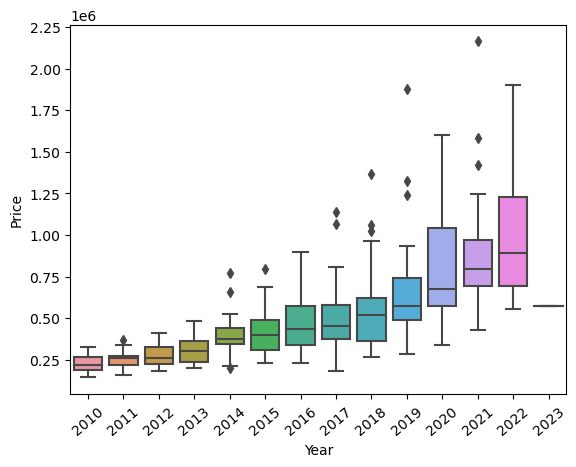

In [161]:
sns.boxplot(x = 'Year' , y = 'Price' , data=df)
plt.xticks(rotation=40)
plt.show()


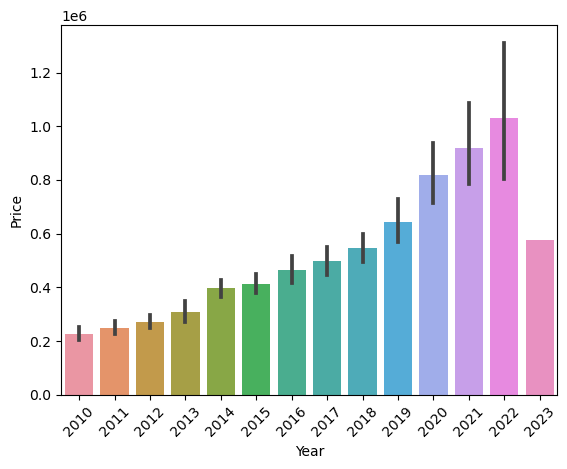

In [162]:
sns.barplot(x = df['Year'], y=df['Price'])
plt.xticks(rotation=45)
plt.show()

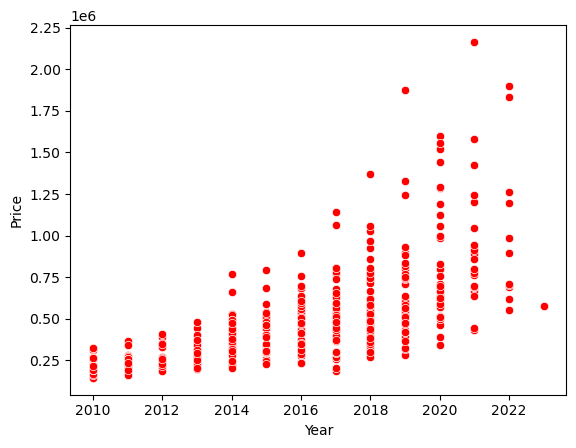

In [163]:
sns.scatterplot(x=df['Year'] , y = df['Price'] , data = df ,  color='r')
plt.show()

In [164]:
from scipy.stats import norm

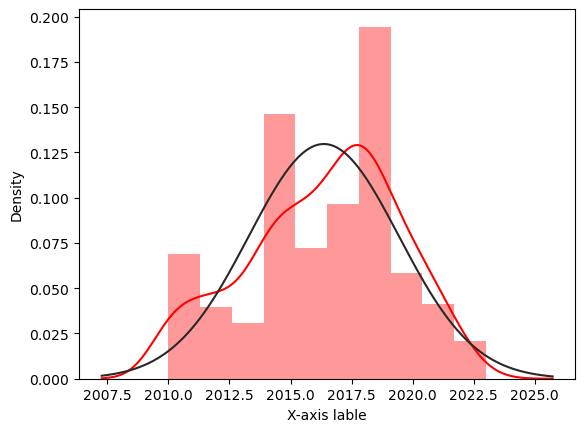

In [165]:
sns.distplot(df['Year'] , kde=True, label = df['Year'] , fit = norm, color='r') 
plt.xlabel('X-axis lable')
plt.ylabel('Density')
plt.show()


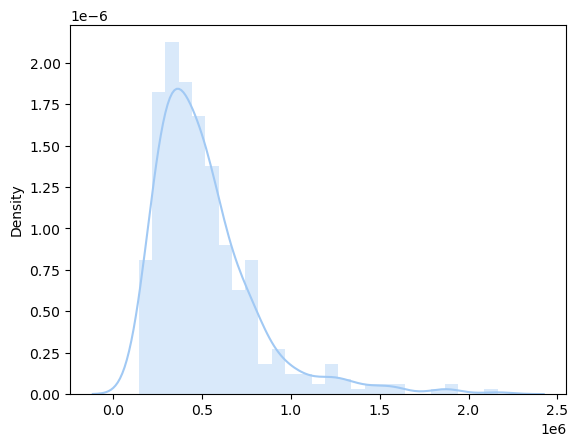

In [166]:
sns.distplot(x=df['Price'], label=df['Year'])
plt.show()

==>> from the above boxplot of price with the year, we get to know some of outliers are comes in a year from 2014 to 2021  
==>> In the barplot of year with price, here we absorved that the year are incresing as price also incrasing.  
==>> Same as in the scatter plot also that is year is increasing price also increasing   
==>> In a distplot as we absorved that with kde reflaction that is not a normal distribution.  

In [168]:
# oWNership vs price

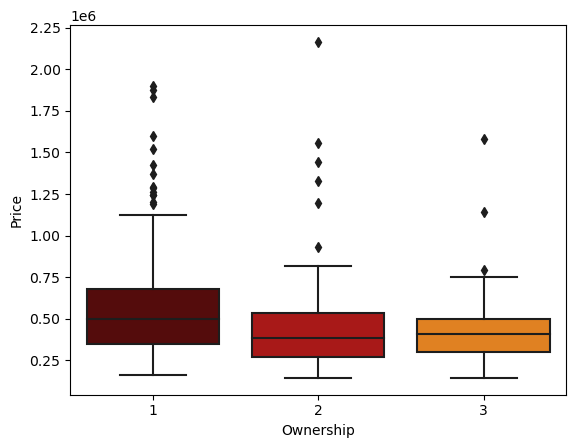

In [169]:
sns.boxplot(x = 'Ownership' , y = 'Price' , data=df , palette='gist_heat')
plt.xticks(rotation=0)
plt.show()

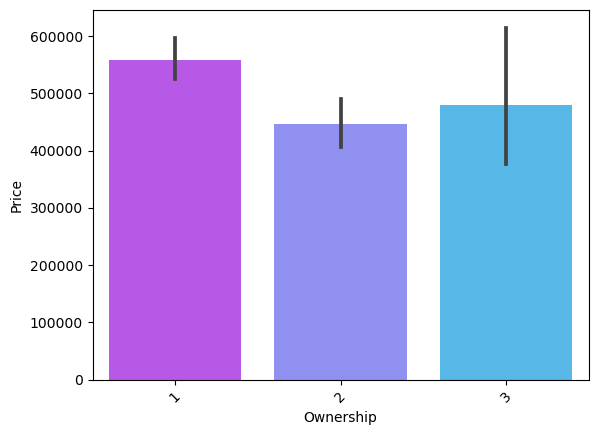

In [170]:
sns.barplot(x = df['Ownership'], y=df['Price'] , palette='cool_r')
plt.xticks(rotation=45)
plt.show()

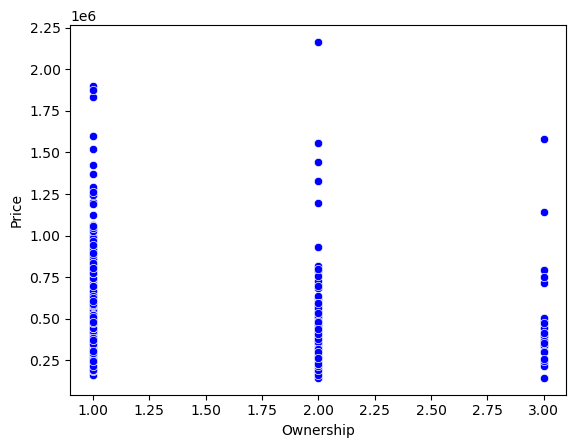

In [171]:
sns.scatterplot(x=df['Ownership'] , y = df['Price'] , data = df ,  color='b')
plt.show()

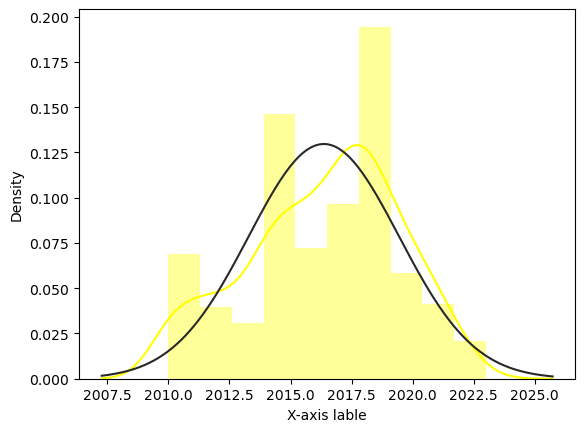

In [172]:
sns.distplot(df['Year'] , kde=True, label = df['Ownership'] , fit = norm, color='yellow') 
plt.xlabel('X-axis lable')
plt.ylabel('Density')
plt.show()


==>> from the above boxplot of price with the Ownership, we get to know some of outliers are comes in a all ownership.  
==>> In the barplot of Ownership with price, here we absorved that the Ownership of 1st is highest price approxe neraly          5.7Lakh in a used cars in India then 3rd and then 2nd.    
==>> Same as in scatter plot also shown that more number are used cars from 1st ownershipn and minimum is 3rd ownership.   
==>> In a distplot as we absorved that with kde reflaction that is not a normal distribution.

In [174]:
# ins/month vs Onwership

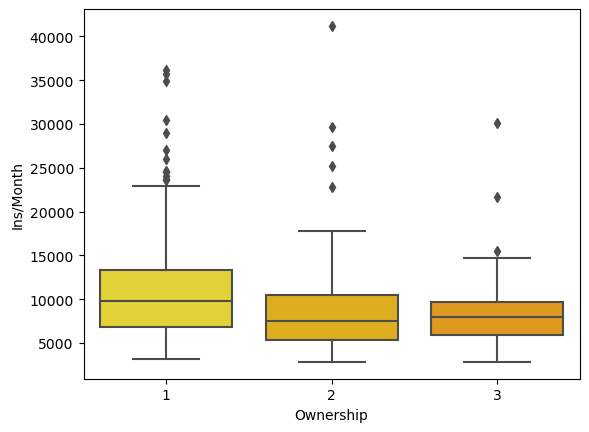

In [175]:
sns.boxplot(x = 'Ownership' , y = 'Ins/Month' , data=df , palette = 'Wistia')
plt.xticks(rotation=0)
plt.show()

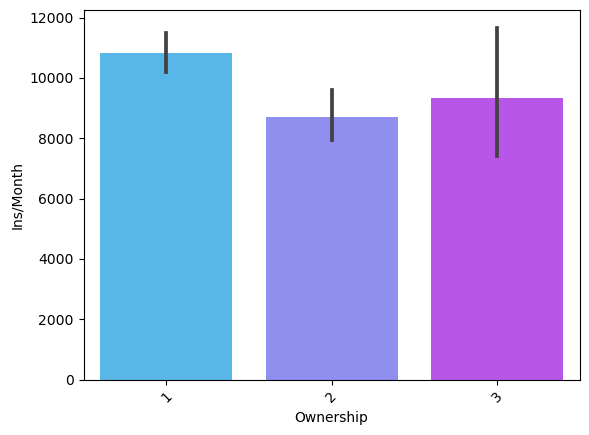

In [176]:
sns.barplot(x = df['Ownership'], y=df['Ins/Month'] , palette='cool')
plt.xticks(rotation=45)
plt.show()

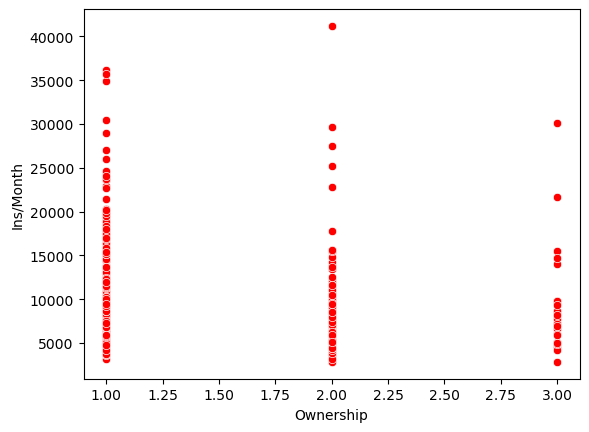

In [177]:
sns.scatterplot(x=df['Ownership'] , y = df['Ins/Month'] , data = df ,  color='r')
plt.show()

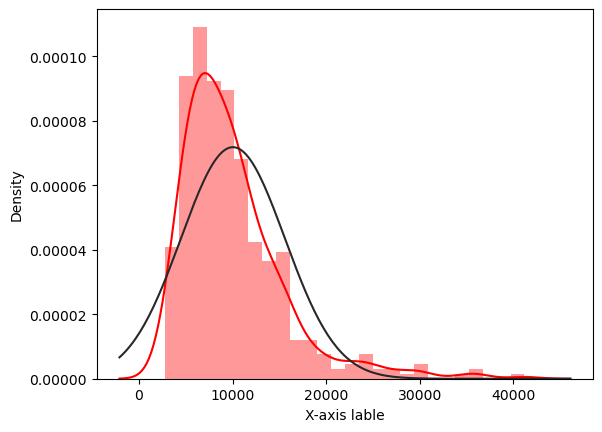

In [178]:
sns.distplot(df['Ins/Month'] , kde=True, label = df['Ownership'] , fit = norm, color='r') 
plt.xlabel('X-axis lable')
plt.ylabel('Density')
plt.show()


==>> from the above boxplot of Ins/Month with the Ownership, we get to know some of outliers are comes in a all ownership.  
==>> In the barplot of Ownership with Ins/Month, here we absorved that the Ownership of 1st is highest Ins/Month approxe neraly 11K in a used cars in India then 3rd and then 2nd.    
==>> Same as in scatter plot also shown that more number are used cars from 1st ownershipn and minimum is from 3rd ownership.   
==>> In a distplot as we absorved that with kde reflaction that is not a normal distribution.

In [180]:
#  km_driven vs ownershiip

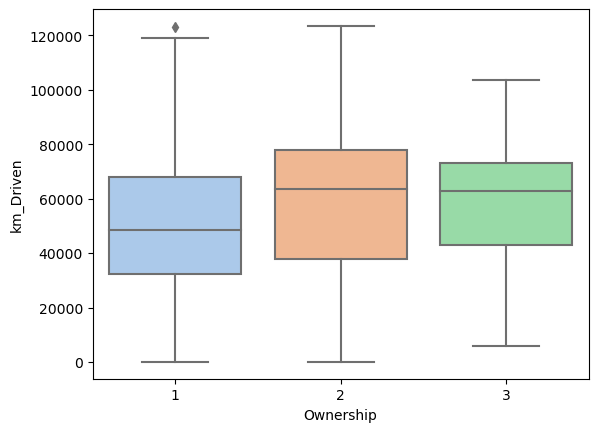

In [181]:
sns.boxplot(x = 'Ownership' , y = 'km_Driven' , data=df )
plt.xticks(rotation=0)
plt.show()

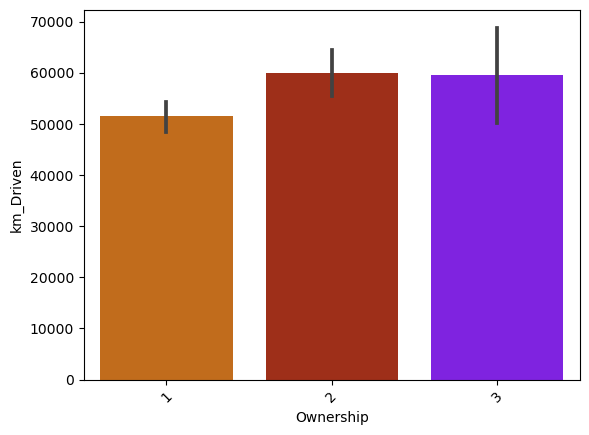

In [182]:
sns.barplot(x = df['Ownership'], y=df['km_Driven'] , palette='gnuplot_r')
plt.xticks(rotation=45)
plt.show()

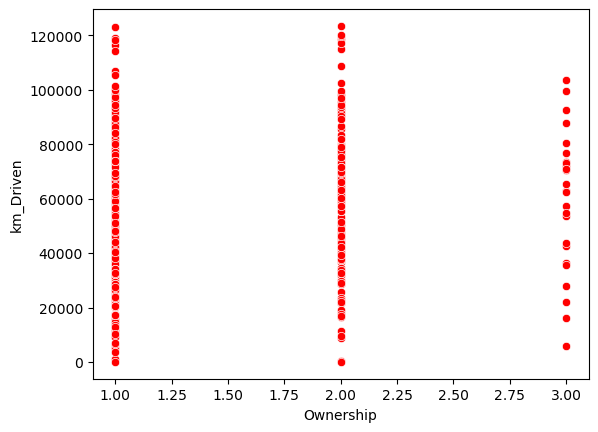

In [300]:
sns.scatterplot(x=df['Ownership'] , y = df['km_Driven'] , data = df ,  color='r')
plt.show()

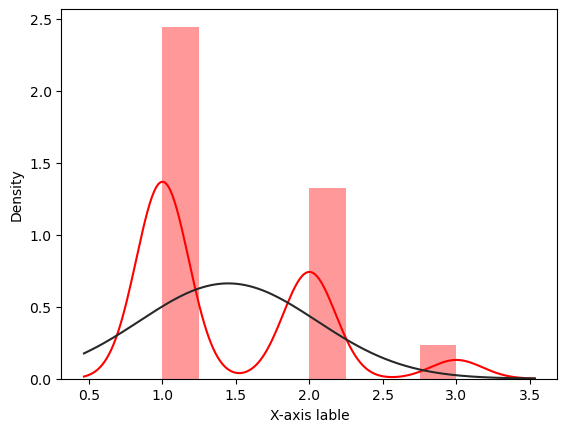

In [184]:
sns.distplot(df['Ownership'] , kde=True, label = df['km_Driven'] , fit = norm, color='r') 
plt.xlabel('X-axis lable')
plt.ylabel('Density')
plt.show()


==>> from the above boxplot of km_Driven with the Ownership, we get to know just one outliers are shown on the top of 1st ownership.  
==>> In the barplot of Ownership with km_Driven, here we absorved that the Ownership of 1st is less km_Driven approxe neraly 51K in a used cars in India then 3rd and then 2nd are high Driven compare to 1st.  
==>> Same as in scatter plot also shown that more number are used cars from 1st ownershipn and minimum is from 3rd ownership.  
==>> In a distplot as we absorved that with kde reflaction that is not a normal distribution.

In [186]:
# year vs km_Driven

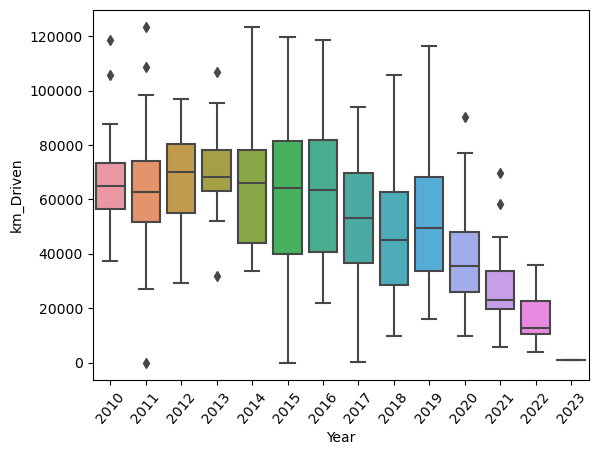

In [187]:
sns.boxplot(x = 'Year' , y = 'km_Driven' , data=df )
plt.xticks(rotation=50)
plt.show()

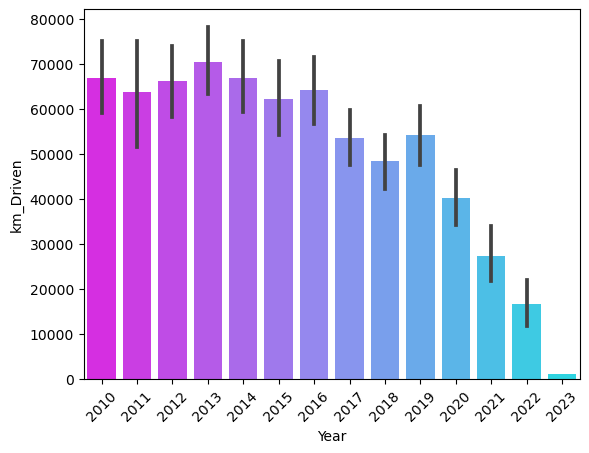

In [188]:
sns.barplot(x = df['Year'], y=df['km_Driven'] , palette='cool_r')
plt.xticks(rotation=45)
plt.show()

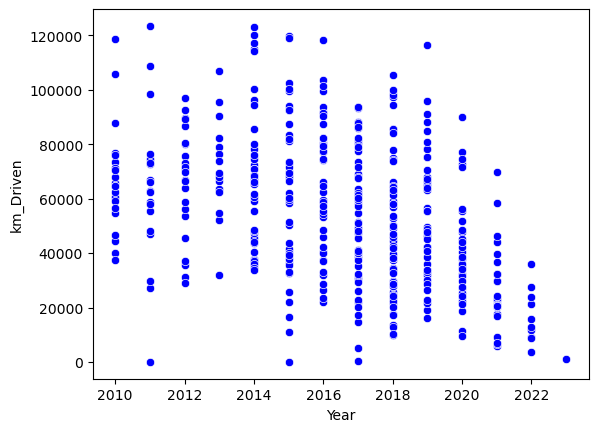

In [189]:
sns.scatterplot(x=df['Year'] , y = df['km_Driven'] , data = df ,  color='blue')
plt.show()

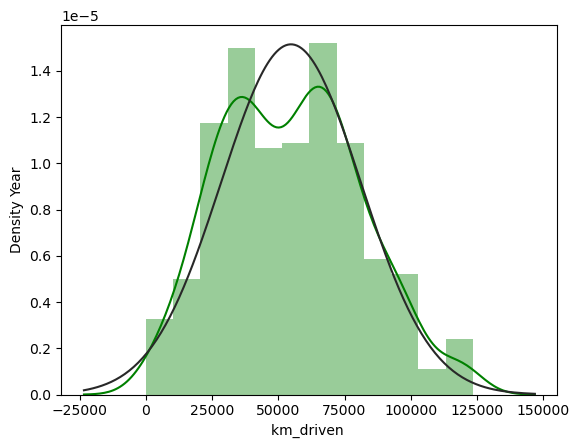

In [301]:
sns.distplot(df['km_Driven'] , kde=True, label = df['Year'] , fit = norm, color='green') 
plt.xlabel('km_driven ')
plt.ylabel('Density Year')
plt.show()


==>> from the above boxplot of km_Driven with the Year, we get to know some outliers from 2010 to 2013 and 2020 to 2021.   
==>> In the barplot of Year with km_Driven, here we absorved that the Year is increasing and the km_Driven is decreasing.  
==>> Same as in scatter plot also shown that more number are used cars are Driven from 2010 to 2020 as year increase km_Driven are decrease.  
==>> In a distplot as we absorved that with kde reflaction that is not a normal distribution.

In [191]:
# km_driven vs ownershiip

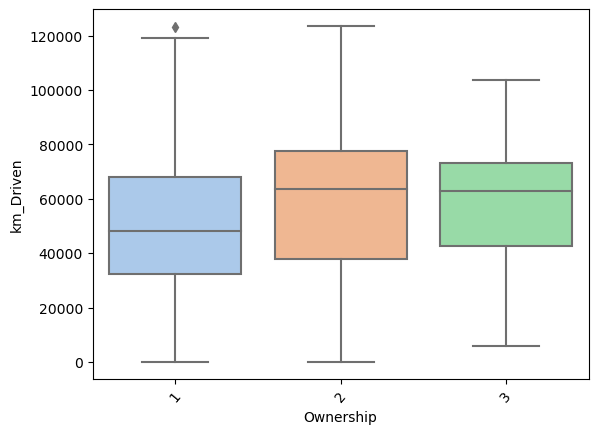

In [192]:
sns.boxplot(x = 'Ownership' , y = 'km_Driven' , data=df )
plt.xticks(rotation=50)
plt.show()

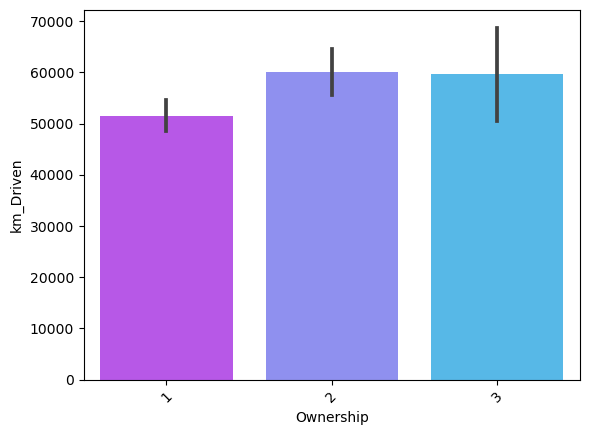

In [193]:
sns.barplot(x = df['Ownership'], y=df['km_Driven'] , palette='cool_r')
plt.xticks(rotation=45)
plt.show()

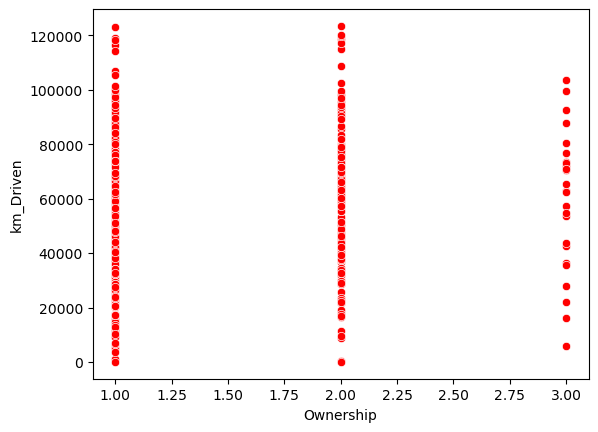

In [194]:
sns.scatterplot(x=df['Ownership'] , y = df['km_Driven'] , data = df ,  color='r')
plt.show()

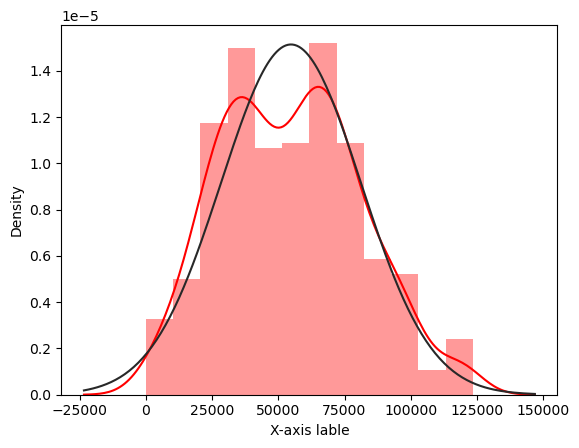

In [195]:
sns.distplot(df['km_Driven'] , kde=True, label = df['Ownership'] , fit = norm, color='r') 
plt.xlabel('X-axis lable')
plt.ylabel('Density')
plt.show()


==>> from the above boxplot of km_Driven with the Ownership, we get to know just one outliers are shown on the top of 1st ownership.  
==>> In the barplot of Ownership with km_Driven, here we absorved that the Ownership of 1st is less km_Driven approxe neraly 51K in a used cars in India then 3rd and then 2nd are high Driven compare to 1st.  
==>> Same as in scatter plot also shown that more number are used cars from 1st ownershipn and minimum is from 3rd ownership.  
==>> In a distplot as we absorved that with kde reflaction that is not a normal distribution.  

In [196]:
# year vs km_Driven

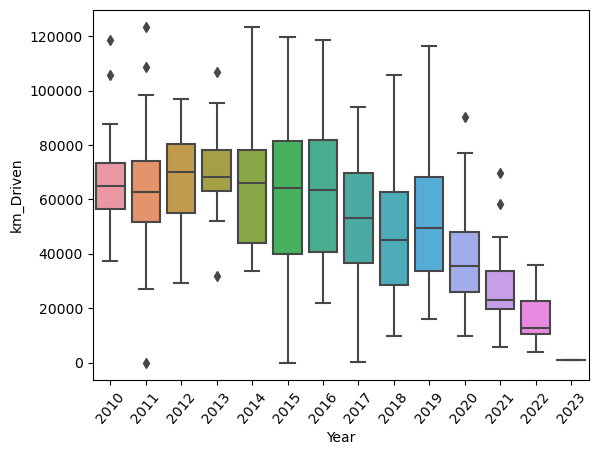

In [197]:
sns.boxplot(x = 'Year' , y = 'km_Driven' , data=df )
plt.xticks(rotation=50)
plt.show()

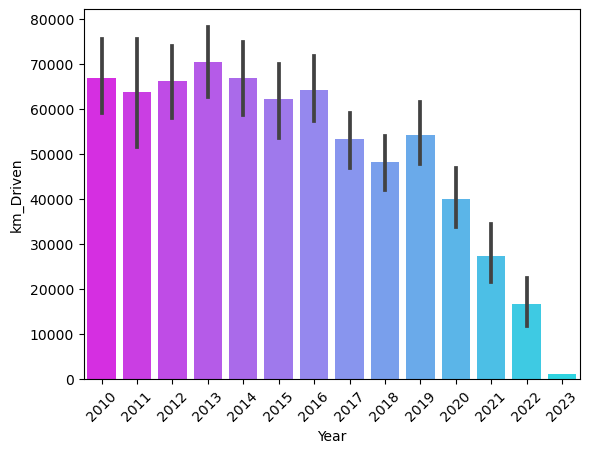

In [198]:
sns.barplot(x = df['Year'], y=df['km_Driven'] , palette='cool_r')
plt.xticks(rotation=45)
plt.show()

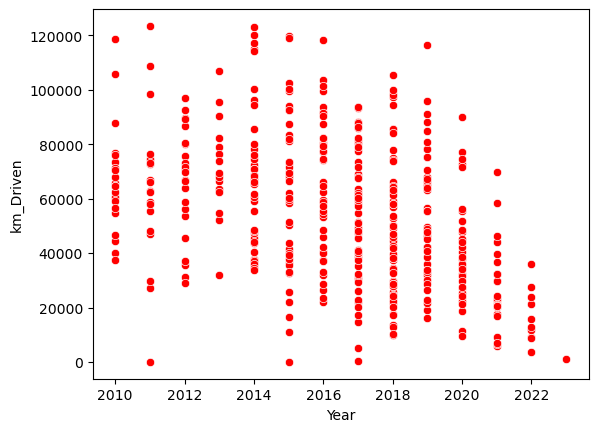

In [199]:
sns.scatterplot(x=df['Year'] , y = df['km_Driven'] , data = df ,  color='r')
plt.show()

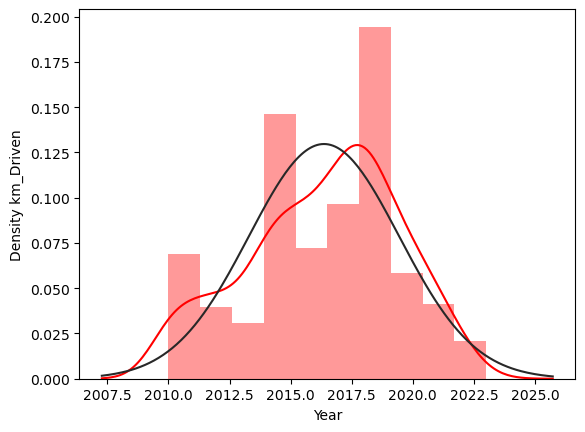

In [200]:
sns.distplot(df['Year'] , kde=True, label = df['km_Driven'] , fit = norm, color='r') 
plt.xlabel('Year')
plt.ylabel('Density km_Driven')
plt.show()


==>> from the above boxplot of km_Driven with the Year, we get to know some outliers from 2010 to 2013 and 2020 to 2021.  
==>> In the barplot of Year with km_Driven, here we absorved that the Year is increasing and the km_Driven is decreasing.  
==>> Same as in scatter plot also shown that more number are used cars are Driven from 2010 to 2020 as year increase km_Driven are decrease.  
==>> In a distplot as we absorved that with kde reflaction that is not a normal distribution.  

In [202]:
# Year vs Ownership

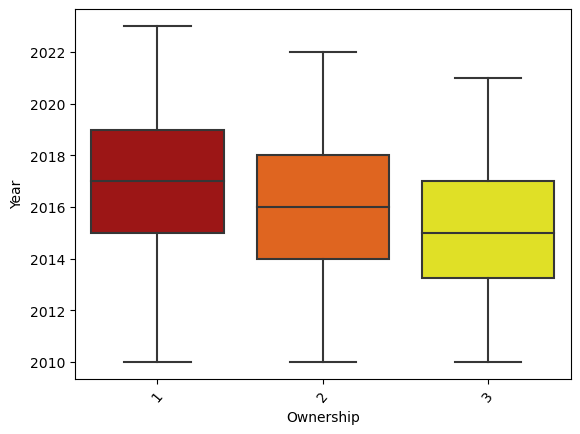

In [203]:
sns.boxplot(x = 'Ownership' , y = 'Year' , data=df , palette='hot')
plt.xticks(rotation=50)
plt.show()

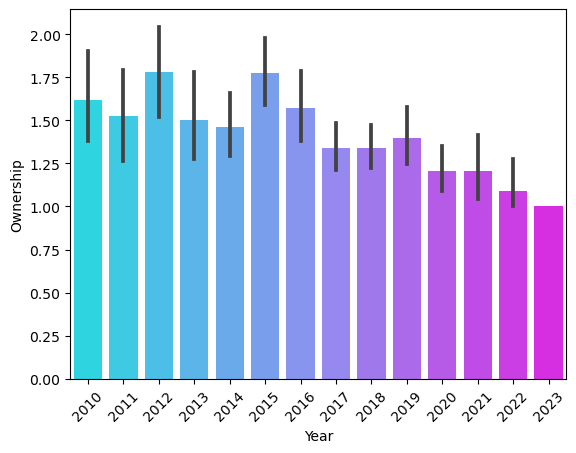

In [311]:
sns.barplot(x = df['Year'], y=df['Ownership'] , palette='cool')
plt.xticks(rotation=45)
plt.show()

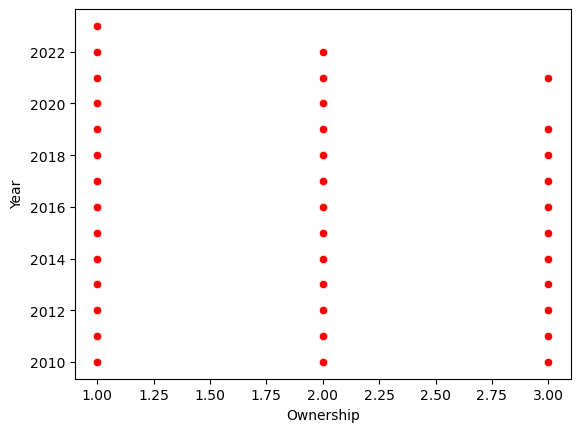

In [304]:
sns.scatterplot(x=df['Ownership'] , y = df['Year'] , data = df ,  color='r')
plt.show()

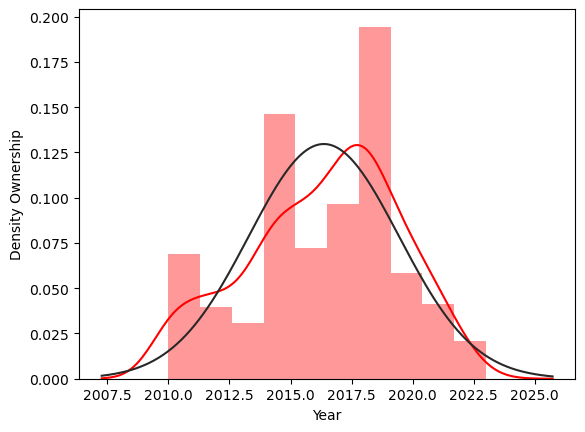

In [306]:
sns.distplot(df['Year'] , kde=True, label = df['Ownership'] , fit = norm, color='r') 
plt.xlabel('Year')
plt.ylabel('Density Ownership')
plt.show()


==>> from the above boxplot of Ownership with the Year, we get to know there is no outliers.  
==>> In the barplot of Year with Ownership, here we absorved that the all are as similer base just a slide diffrence.   
==>> Same as in scatter plot also shown that more number are used cars are on 1st onwer compase to others owners.  
==>> In a distplot as we absorved that with kde reflaction that is not a normal distribution.  

<AxesSubplot:xlabel='Ownership', ylabel='count'>

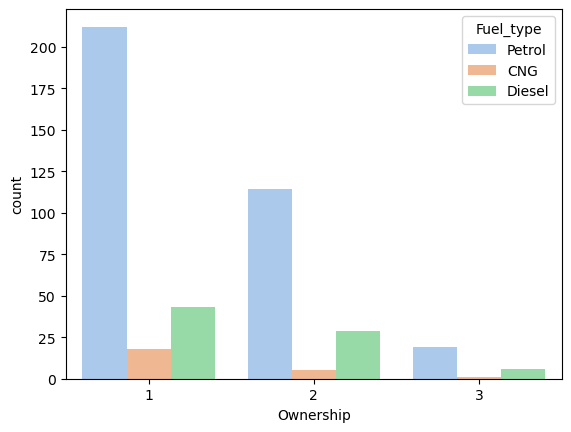

In [205]:
# num vs cat

sns.countplot(x='Ownership', data=df, hue='Fuel_type')

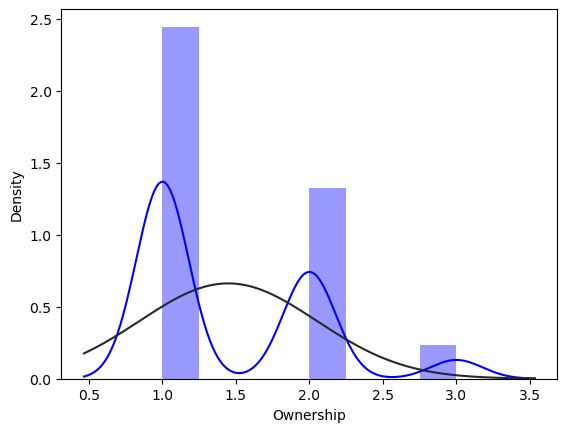

In [206]:
sns.distplot(df['Ownership'], label=df['Fuel_type'], fit=norm, color='b')
plt.show()

In [208]:
# year vs ins/month

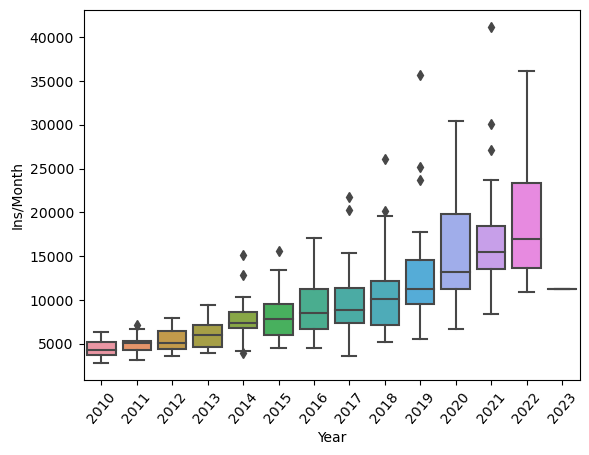

In [209]:
sns.boxplot(x = 'Year' , y = 'Ins/Month' , data=df )
plt.xticks(rotation=50)
plt.show()

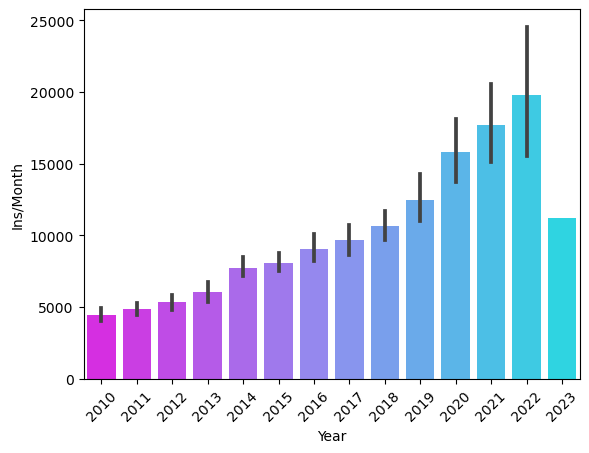

In [210]:
sns.barplot(x = df['Year'], y=df['Ins/Month'] , palette='cool_r')
plt.xticks(rotation=45)
plt.show()


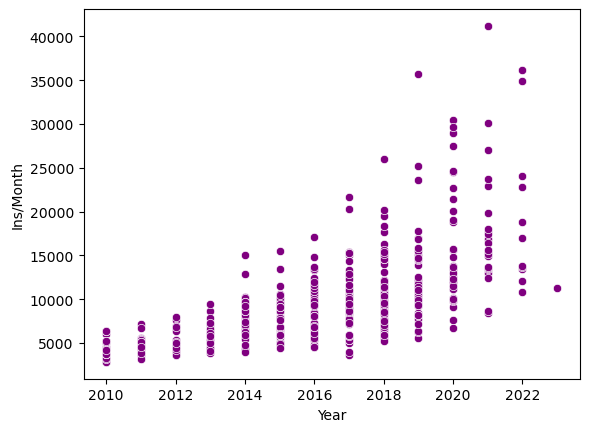

In [211]:
sns.scatterplot(x=df['Year'] , y = df['Ins/Month'] , data = df ,  color='purple')
plt.show()

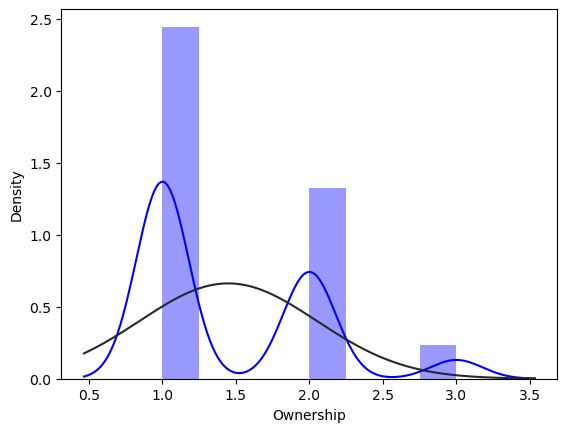

In [212]:
sns.distplot(df['Ownership'], label=df['Fuel_type'], fit=norm, color='b')
plt.show()

==>> from the above boxplot of Ins/Month with the Year, we get to know some outliers are comes up.
==>> In the barplot of Year with Ins/Month, here we absorved that the as the year are increasing EMI amount also increasing.  
==>> Same as in scatter plot also shown that Insurance amount of the used cars are increaing by the year increaing.  
==>> In a distplot as we absorved that with kde reflaction that is not a normal distribution.

### * Multivariate Analysis :

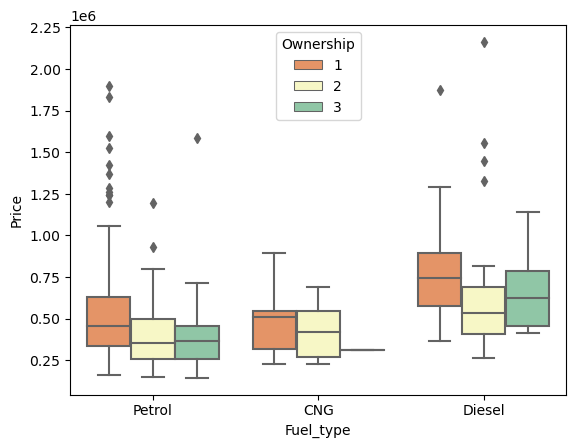

In [265]:
sns.Multivariate Aboxplot(x = 'Fuel_type' , y = 'Price' , data=df , hue = 'Ownership' , palette='Spectral')
plt.show()

In the above boxplot we do the Multivariate to check the diff between of price/fuel_type/ownership so in a petrol fuel type there is more number of data as well as outliers are also more there when compare to Diesel.And the lable are shown as that the colour of ownership that Orange:-1st owner, halfwhite:-2nd owner, and the green:-3rd ownership. as we can absover that the prices are highest of the used car of Diesel fuel type compare to Petrol and CNG. and in a CNG there only one data are is there of 3rd ownership

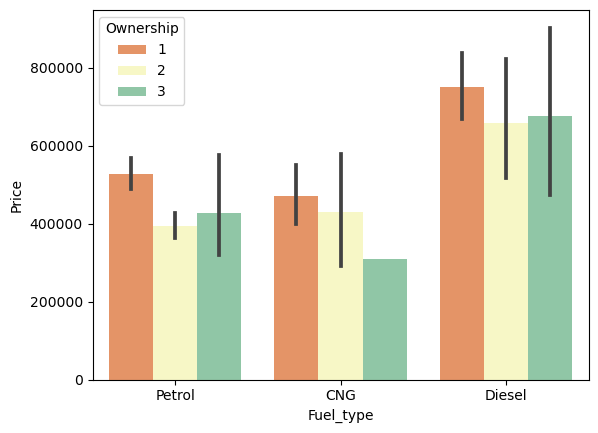

In [264]:
sns.barplot(x = 'Fuel_type' , y = 'Price' , data=df , hue = 'Ownership' , palette='Spectral')
plt.show()

In the above boxplot we do the Multivariate to check the diff between of price/fuel_type/ownership so in a petrol fuel type there is more number of data as well as outliers are also more there when compare to Diesel. And the lable are shown as that the colour of ownership that Orange:-1st owner, halfwhite:-2nd owner, and the green:-3rd ownership.and as we can absover that the prices are highest of the used car of Diesel fuel type compare to Petrol and CNG. and in a CNG there only less data are is there of 3rd ownership

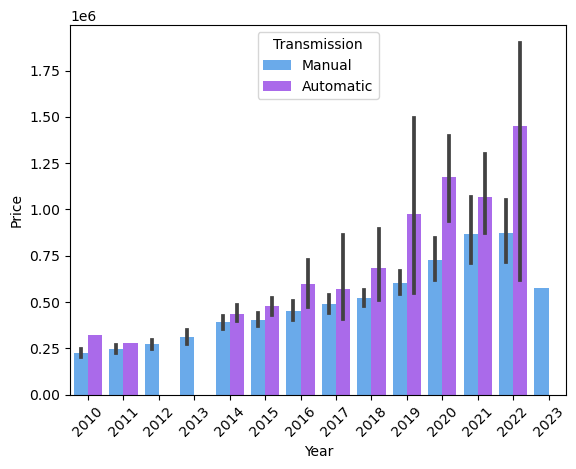

In [266]:
sns.barplot(x = 'Year' , y = 'Price' , data=df , hue = 'Transmission' , palette='cool')
plt.xticks(rotation=45)
plt.show()

From the above of the barplot is shown the multivareate of the data that is year/price/ and Transmission. In the ghaph the lable is shown the diffrent colour of the Transmission that is blue for Manula and purple is for Automatic. as we absoverd that the used cars price are increasing in India when year is increaing and also one thing we notic that as the year are increaing the Transmission of the used car is also increaing by the time of year .

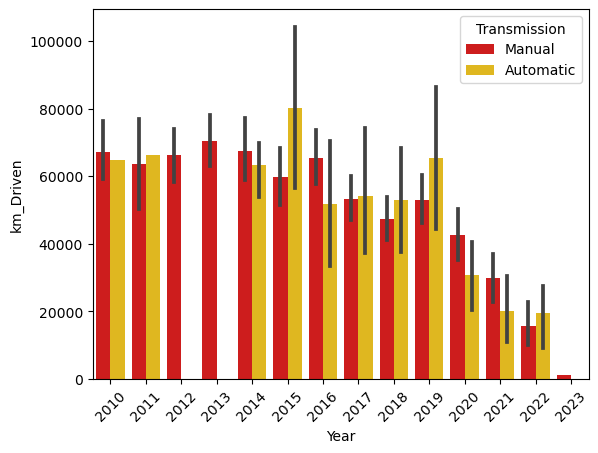

In [275]:
sns.barplot(x = 'Year' , y = 'km_Driven' , data=df , hue = 'Transmission' , palette='hot')
plt.xticks(rotation=45)
plt.show()

From the above of the barplot is shown the multivareate of the data that is year/km_Driven/ and Transmission. In the ghaph the lable is shown the diffrent colour of the Transmission that is RED for Manula and YELLOW is for Automatic. as we absoverd that the used cars Year are increasing km_driven is decreaing and also one thing we notic that as the year are increaing the Transmission of the used car is also decreasing by the time of year .

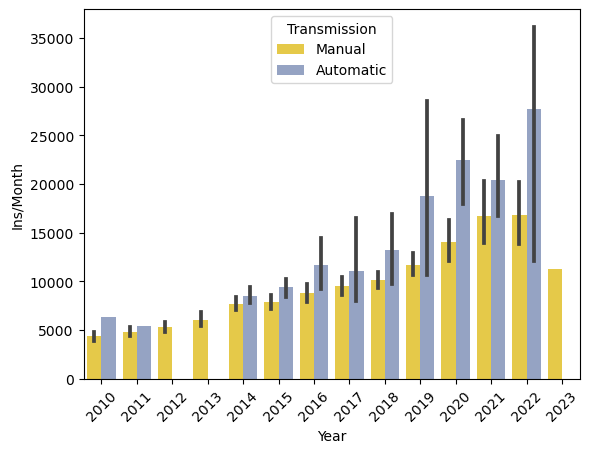

In [293]:
sns.barplot(x = 'Year' , y = 'Ins/Month' , data=df , hue = 'Transmission' , palette='Set2_r')
plt.xticks(rotation=45)
plt.show()

From the above of the barplot is shown the multivareate of the data that is year/Ins-Month/ and Transmission. In the ghaph the lable is shown the diffrent colour of the Transmission that is YELLOW for Manula and GRAY is for Automatic. as we absoverd that the used cars Year are increasing Ins/Month is also increaing and also one thing we notic that as the year are increaing the Transmission of the used car of Automatic is also increasing by the time of year .

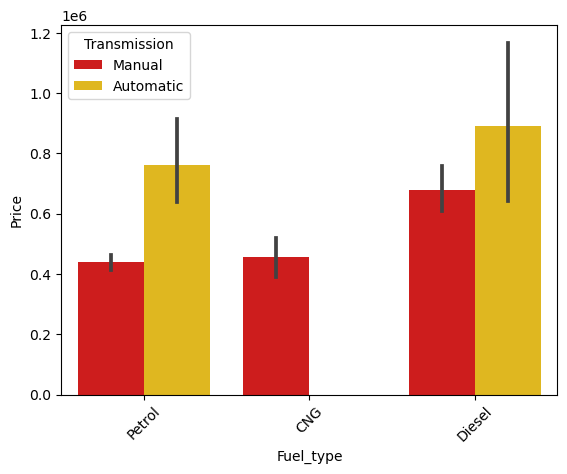

In [295]:
sns.barplot(x = 'Fuel_type' , y = 'Price' , data=df , hue = 'Transmission' , palette='hot')
plt.xticks(rotation=45)
plt.show()

From the above of the barplot is shown the multivareate of the data that is Price/Fuel_type/ and Transmission. In the ghaph the lable is shown the diffrent colour of the Transmission that is RED for Manula and YELLOW is for Automatic. as we absoverd that the used cars PRICe are high in Diesel fuel type and more high in a Automatic of a car. and we notic that there no used cars are available in a CNG in a Automatic Transmission. 

In [294]:
df.head(1)

Year           Model  km_Driven  Ownership Fuel_type Transmission  \
0  2017  Maruti Celerio      35107          1    Petrol       Manual   

   Ins/Month   City   Price  
0       7546  Delhi  386000

#### Here is doing some groupby

<AxesSubplot:xlabel='Ownership'>

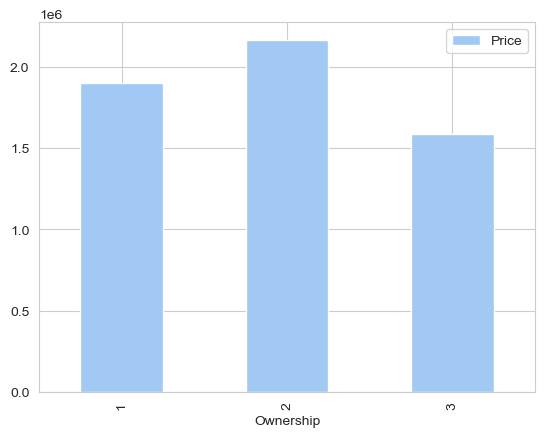

In [338]:
max_price = pd.DataFrame(df.groupby(by='Ownership')['Price'].max())
max_price
max_price.plot(kind='bar')

IN that above bar plot its show the maximum of the price by the owensrhsip which is 2nd ownership of the used car is max

<AxesSubplot:xlabel='Transmission'>

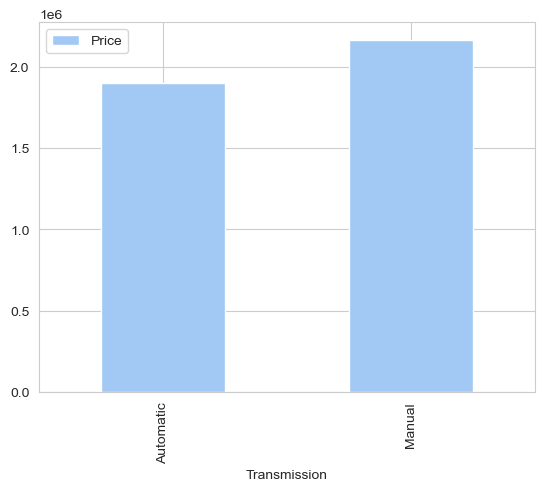

In [354]:
trans = pd.DataFrame(df.groupby(by='Transmission')['Price'].max())
trans.plot(kind='bar')

In that above bar plot its show the maximum of the price by the Transmission which is the max of Manual of the used car is max price

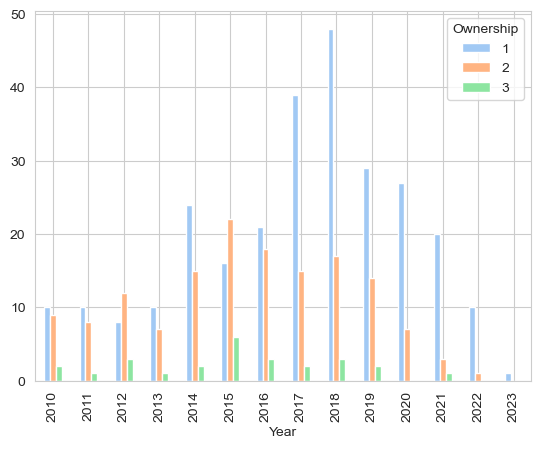

In [355]:
# here are doing a pivot table

pivote_t = df.pivot_table(values='Price' , index='Year', columns='Ownership', aggfunc='count')
pivote_t.plot(kind='bar')
plt.show()

In that above bar plot its show the Counting of the price by the owensrhsip with the year wise, where from the 2017 to 2021 are the highest number or ownership if is there.

In [345]:
chk = pd.pivot_table(df,index=df['Ownership'],columns=df['Fuel_type'], values='Price', aggfunc='mean')
chk

Fuel_type       CNG         Diesel         Petrol
Ownership                                        
1          470500.0  749744.186047  527284.198113
2          430600.0  657581.034483  393840.350877
3          309000.0  674666.666667  426842.105263

<AxesSubplot:xlabel='Ownership'>

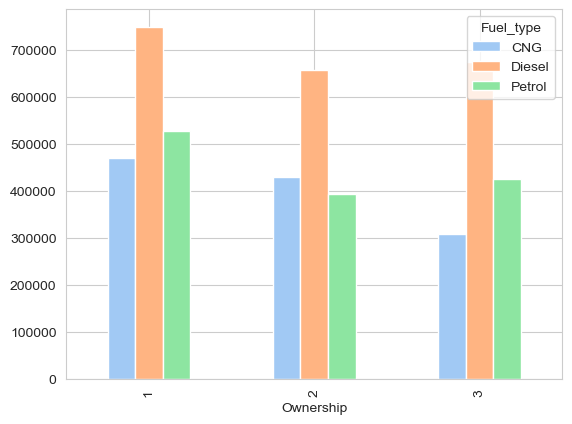

In [351]:
chk.plot(kind='bar')

On that above bar plot its show the Average of the price by the owensrhsip with the Feul_type which is Diesel price are likely to more high in the average from all the ownership.

In [352]:
chk_2 = pd.pivot_table(df,index=df['Year'],columns=df['Fuel_type'], values='Price', aggfunc='mean')
chk_2

Fuel_type            CNG        Diesel        Petrol
Year                                                
2010                 NaN           NaN  2.276190e+05
2011                 NaN  2.610000e+05  2.490444e+05
2012       272000.000000  4.005000e+05  2.598000e+05
2013       250333.333333  3.975000e+05  3.102308e+05
2014                 NaN  4.626000e+05  3.751129e+05
2015       434666.666667  5.003455e+05  3.792667e+05
2016       391666.666667  5.991458e+05  4.134889e+05
2017                 NaN  7.644286e+05  4.579388e+05
2018       407500.000000  7.072308e+05  5.125660e+05
2019       495000.000000  9.271444e+05  5.905948e+05
2020       540333.333333  1.203429e+06  7.429583e+05
2021       635000.000000  1.216750e+06  8.705421e+05
2022       893000.000000           NaN  1.045100e+06
2023                 NaN           NaN  5.750000e+05

In [ ]:
trans = pd.DataFrame(df.groupby(by='Transmission')['Price'].max())
trans.plot(kind='bar')

<AxesSubplot:xlabel='Year'>

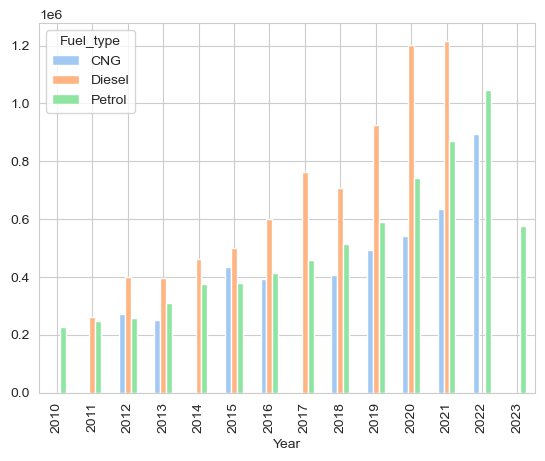

In [353]:
chk_2.plot(kind='bar')

### Below are some Pair plots are there....

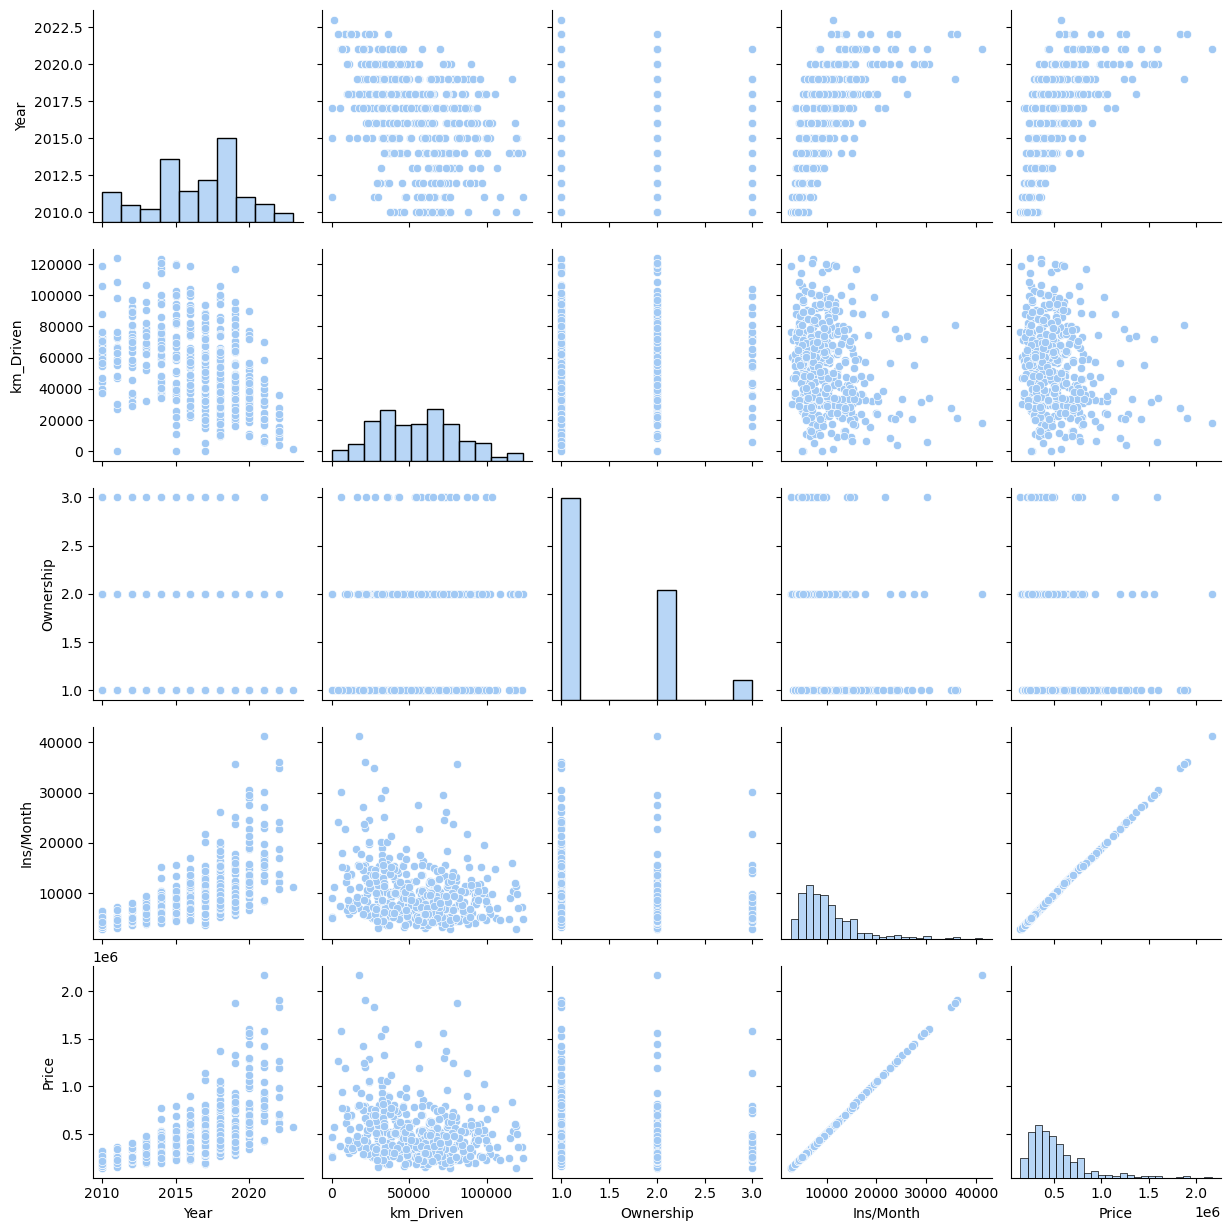

In [213]:
# sns.pairplot(df , palette='pastel')
sns.pairplot(df)

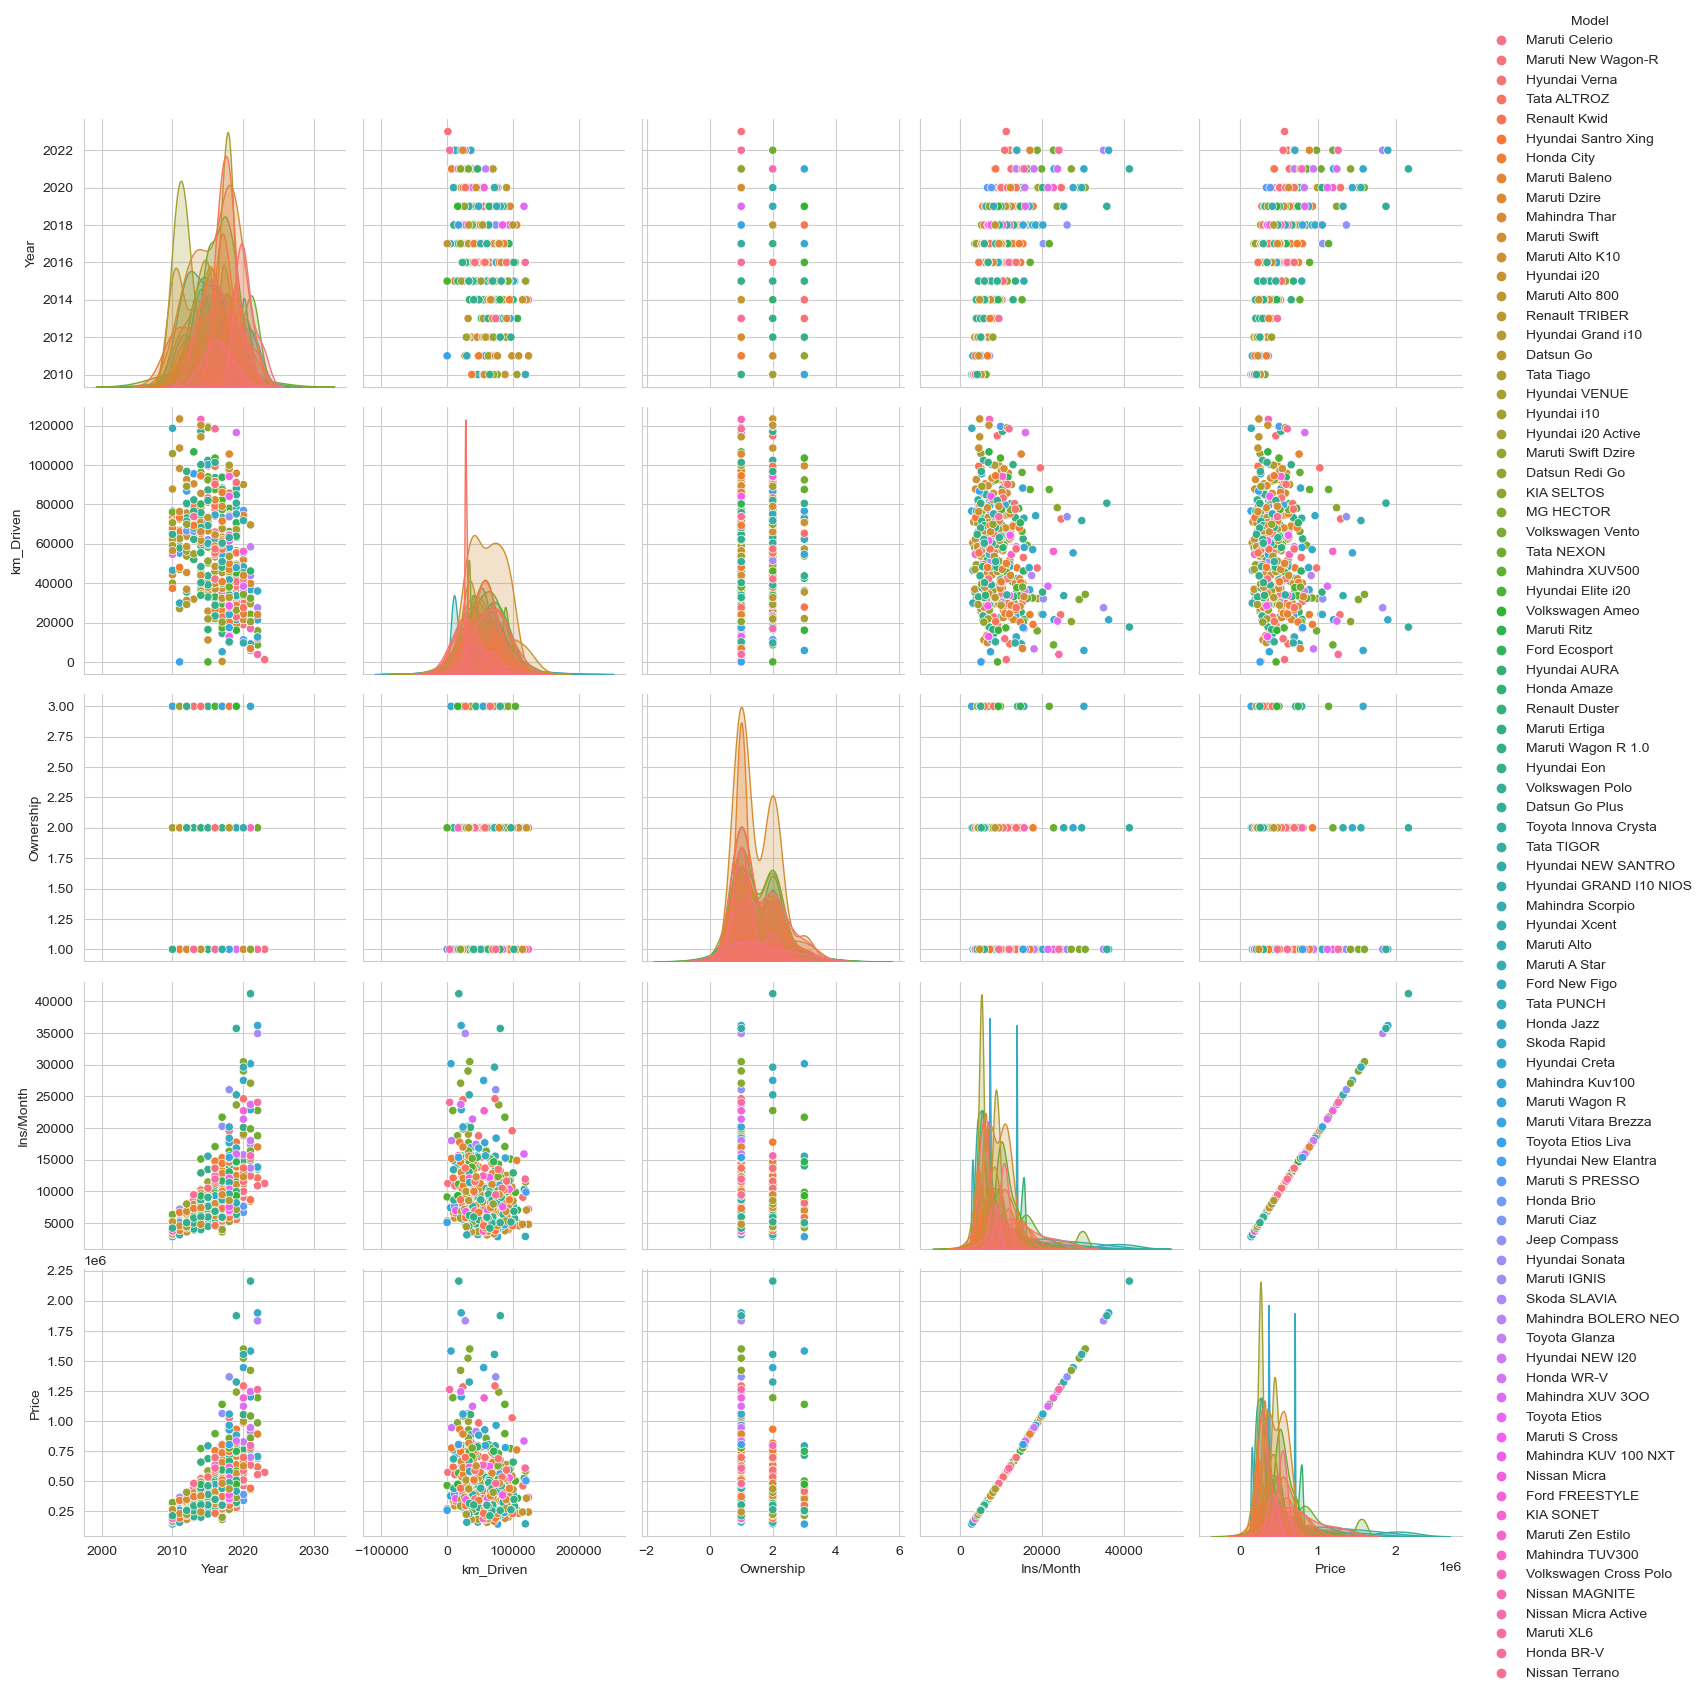

In [315]:
plt.close();
sns.set_style('whitegrid');
sns.pairplot(df,hue='Model', size=3);
plt.show()

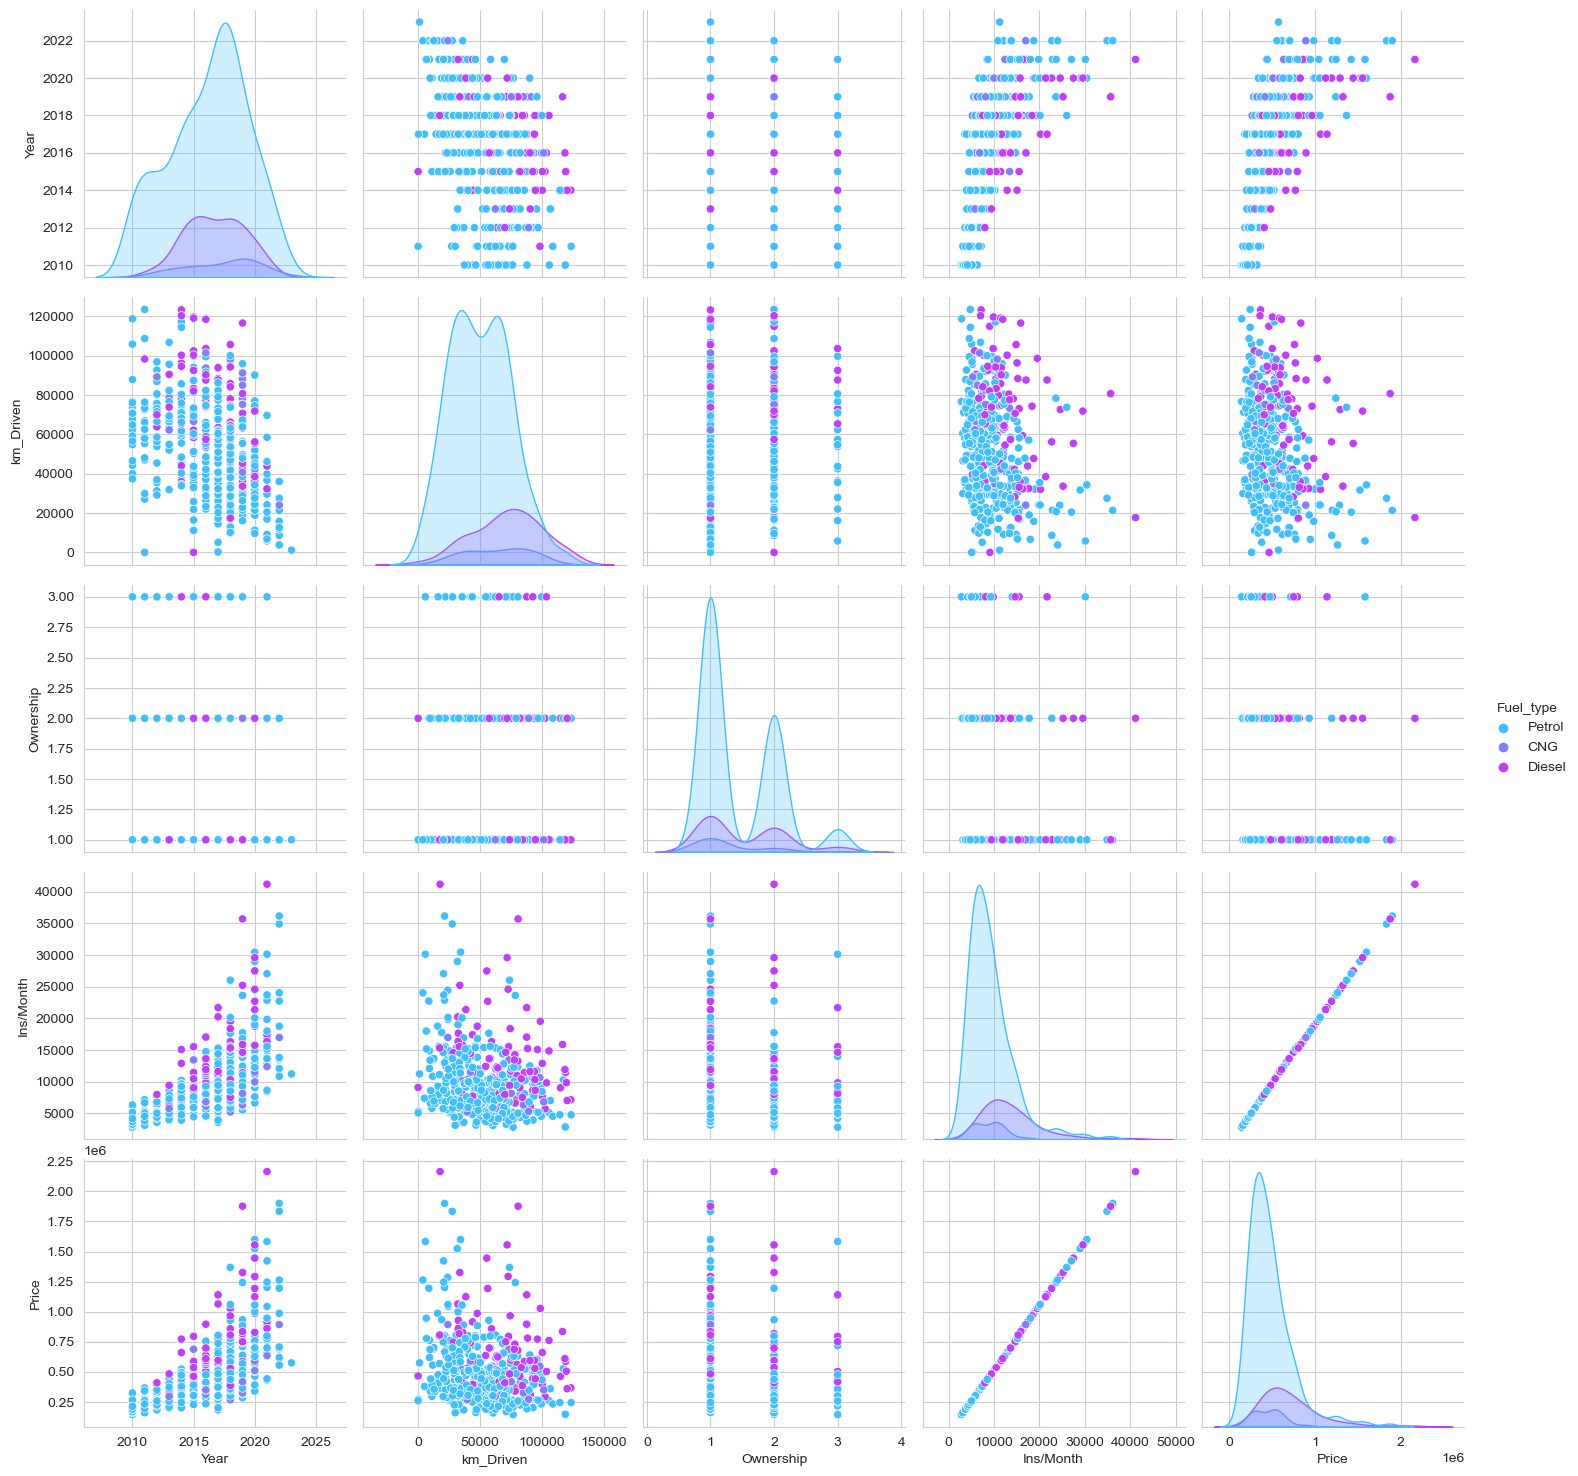

In [322]:
plt.close();
sns.set_style('whitegrid');
sns.pairplot(df,hue='Fuel_type', size=3 , palette='cool');
plt.show()

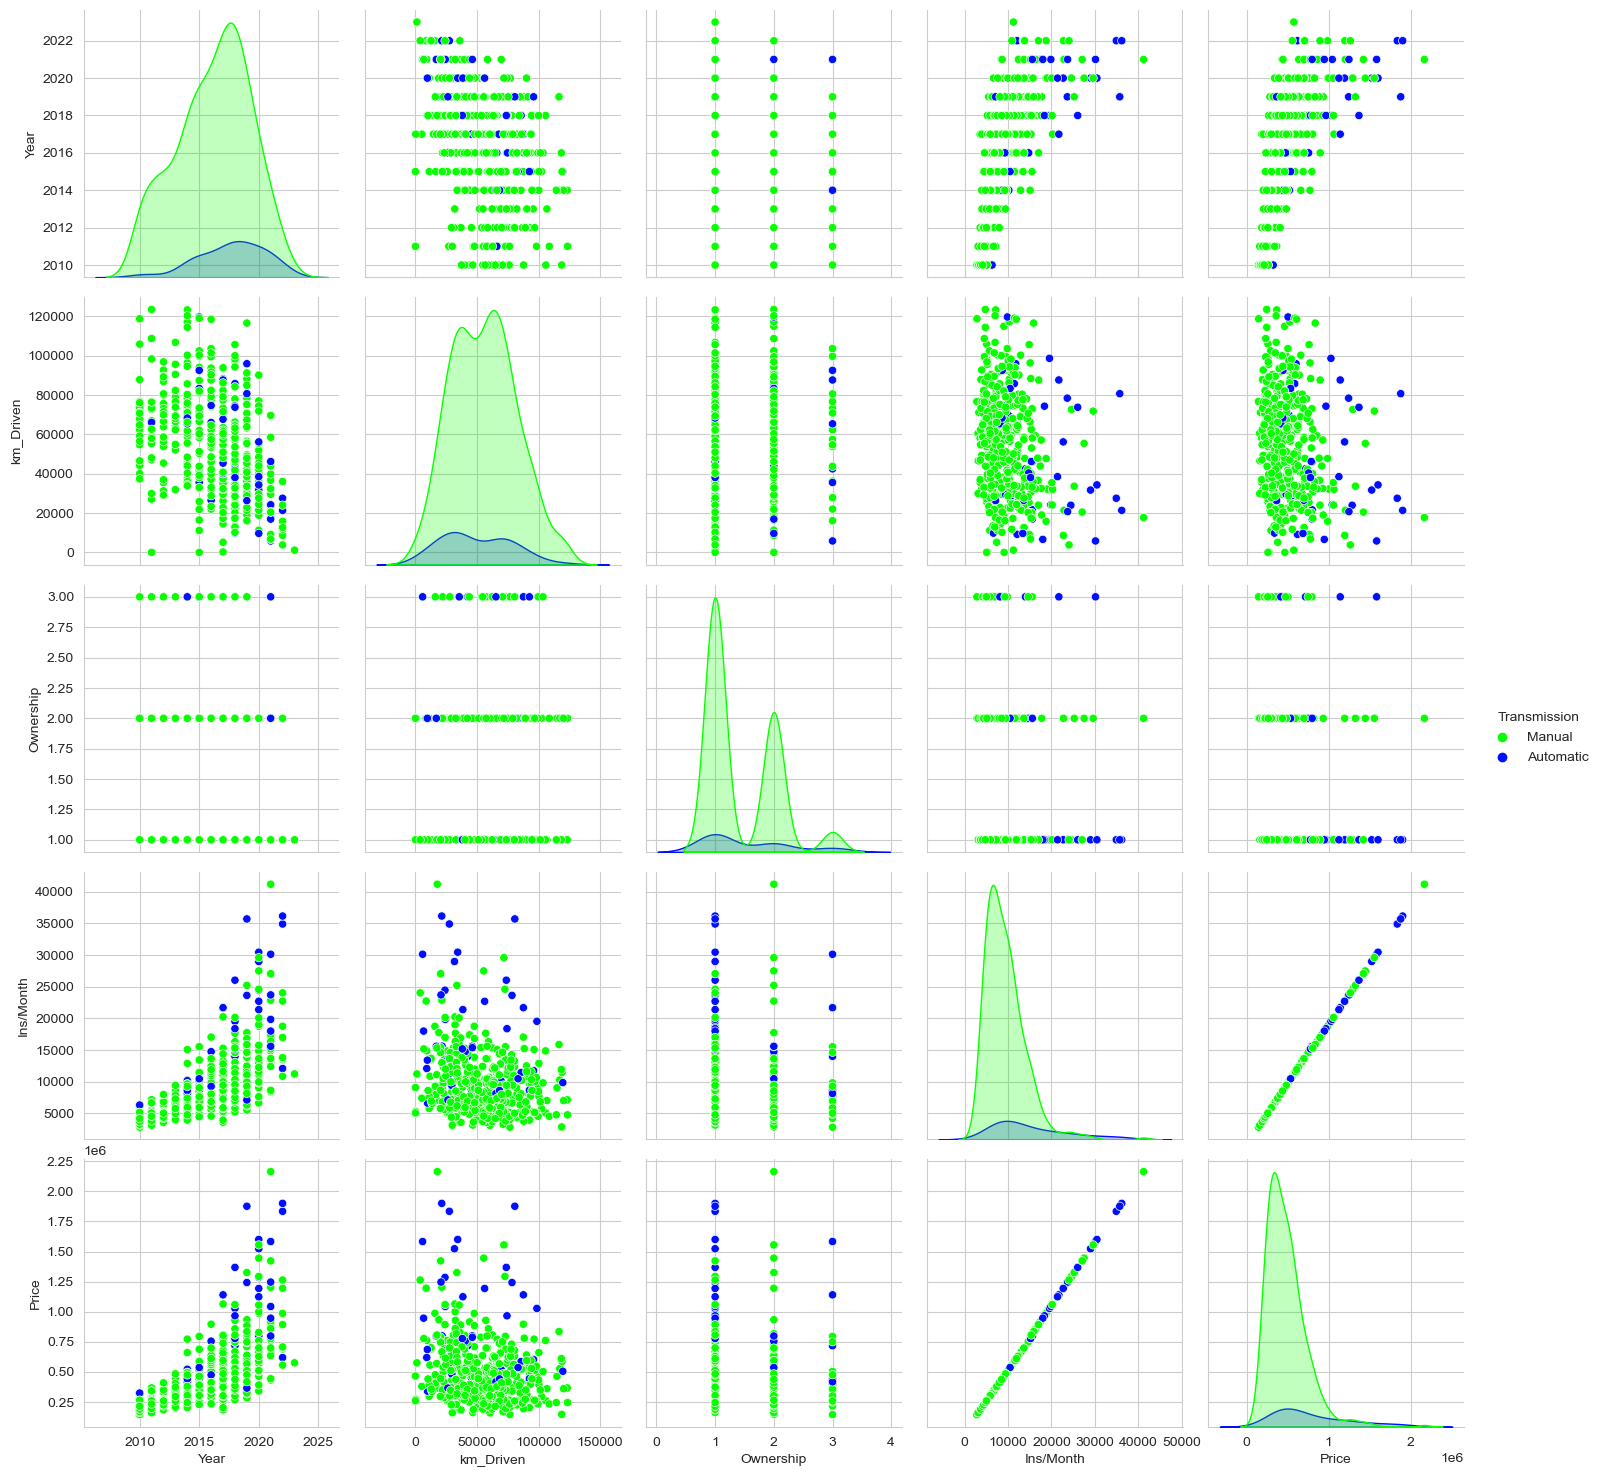

In [325]:
plt.close();
sns.set_style('whitegrid');
sns.pairplot(df,hue='Transmission', size=3 , palette='hsv');
plt.show()

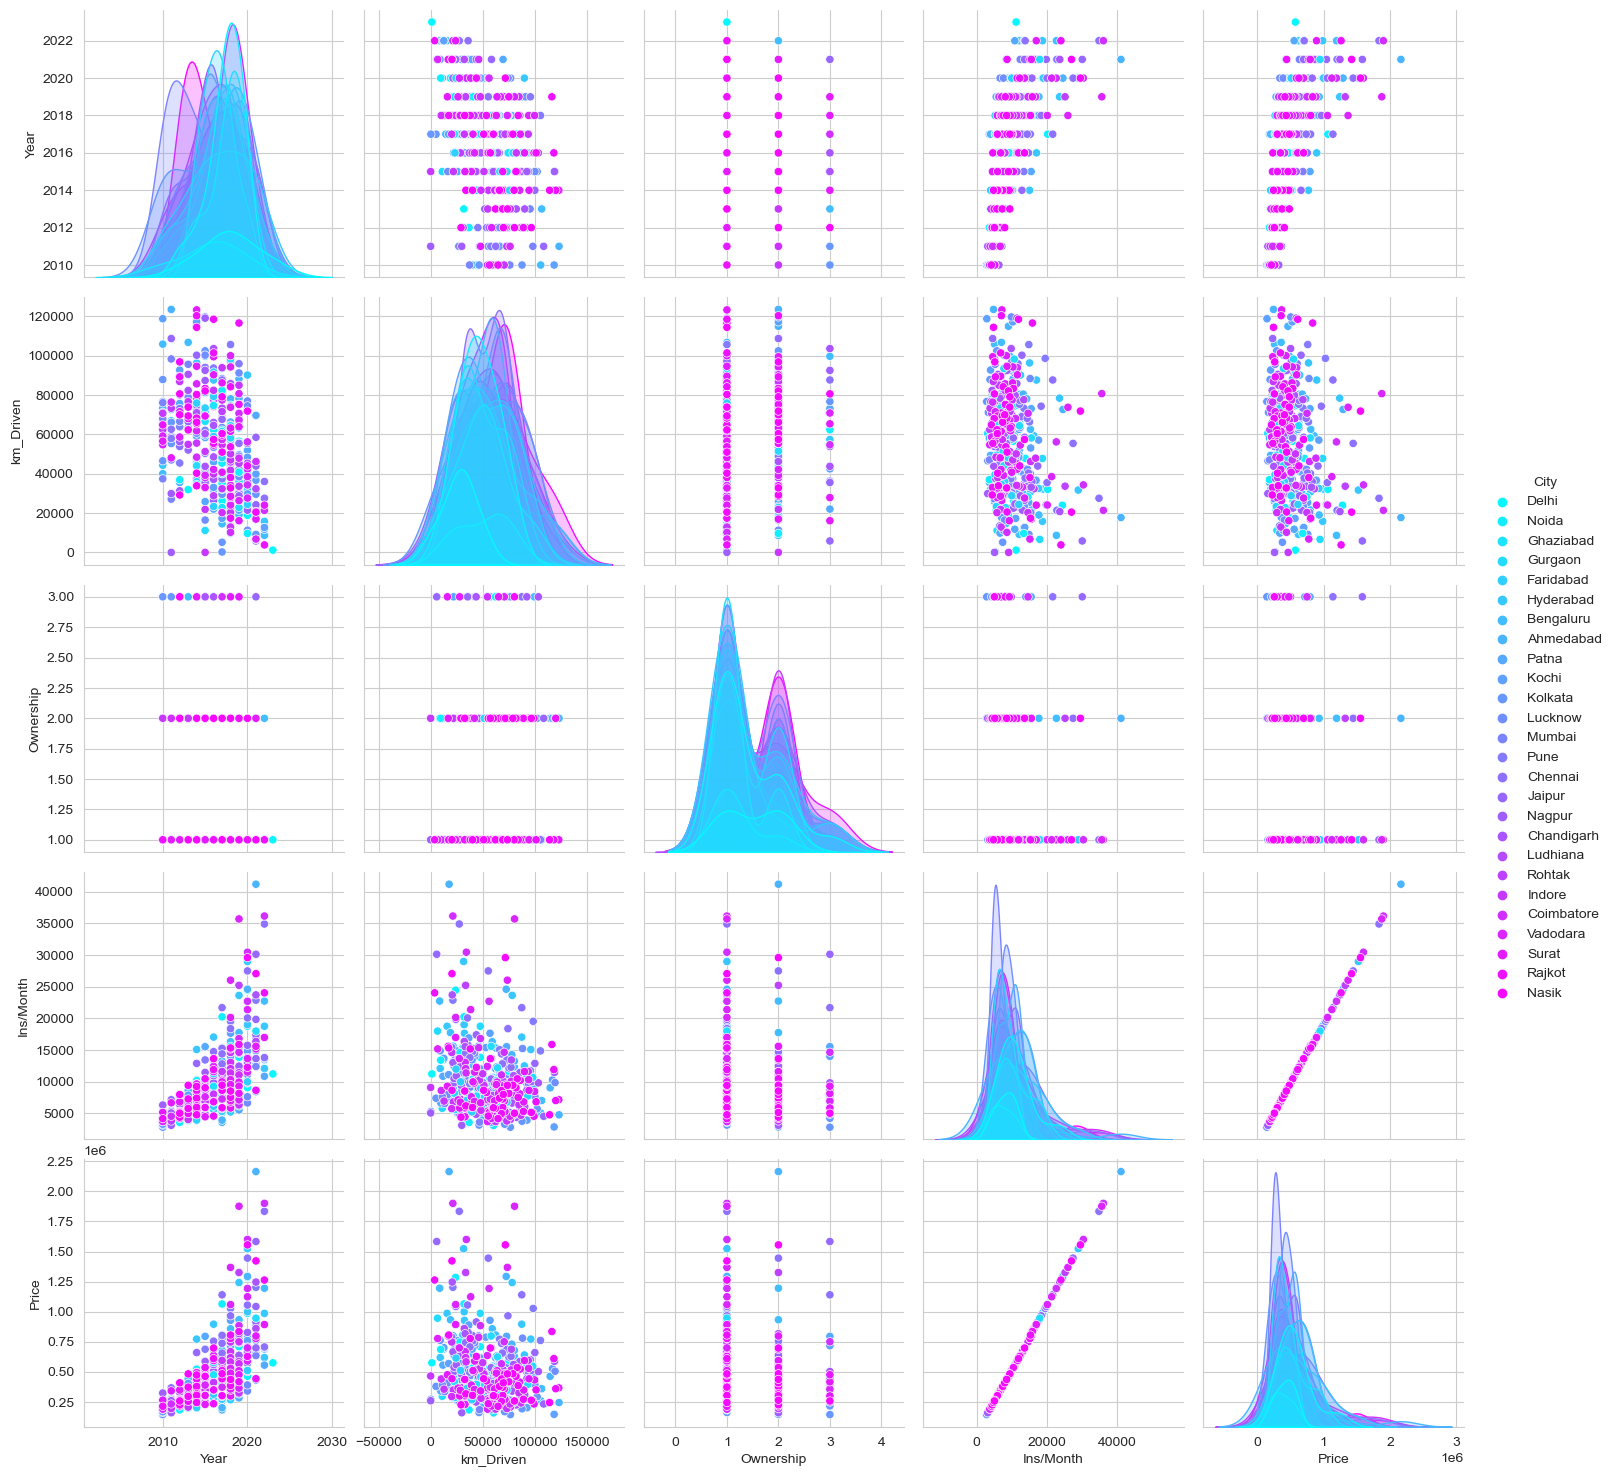

In [327]:
plt.close();
sns.set_style('whitegrid');
sns.pairplot(df,hue='City', size=3 , palette='cool');
plt.show()

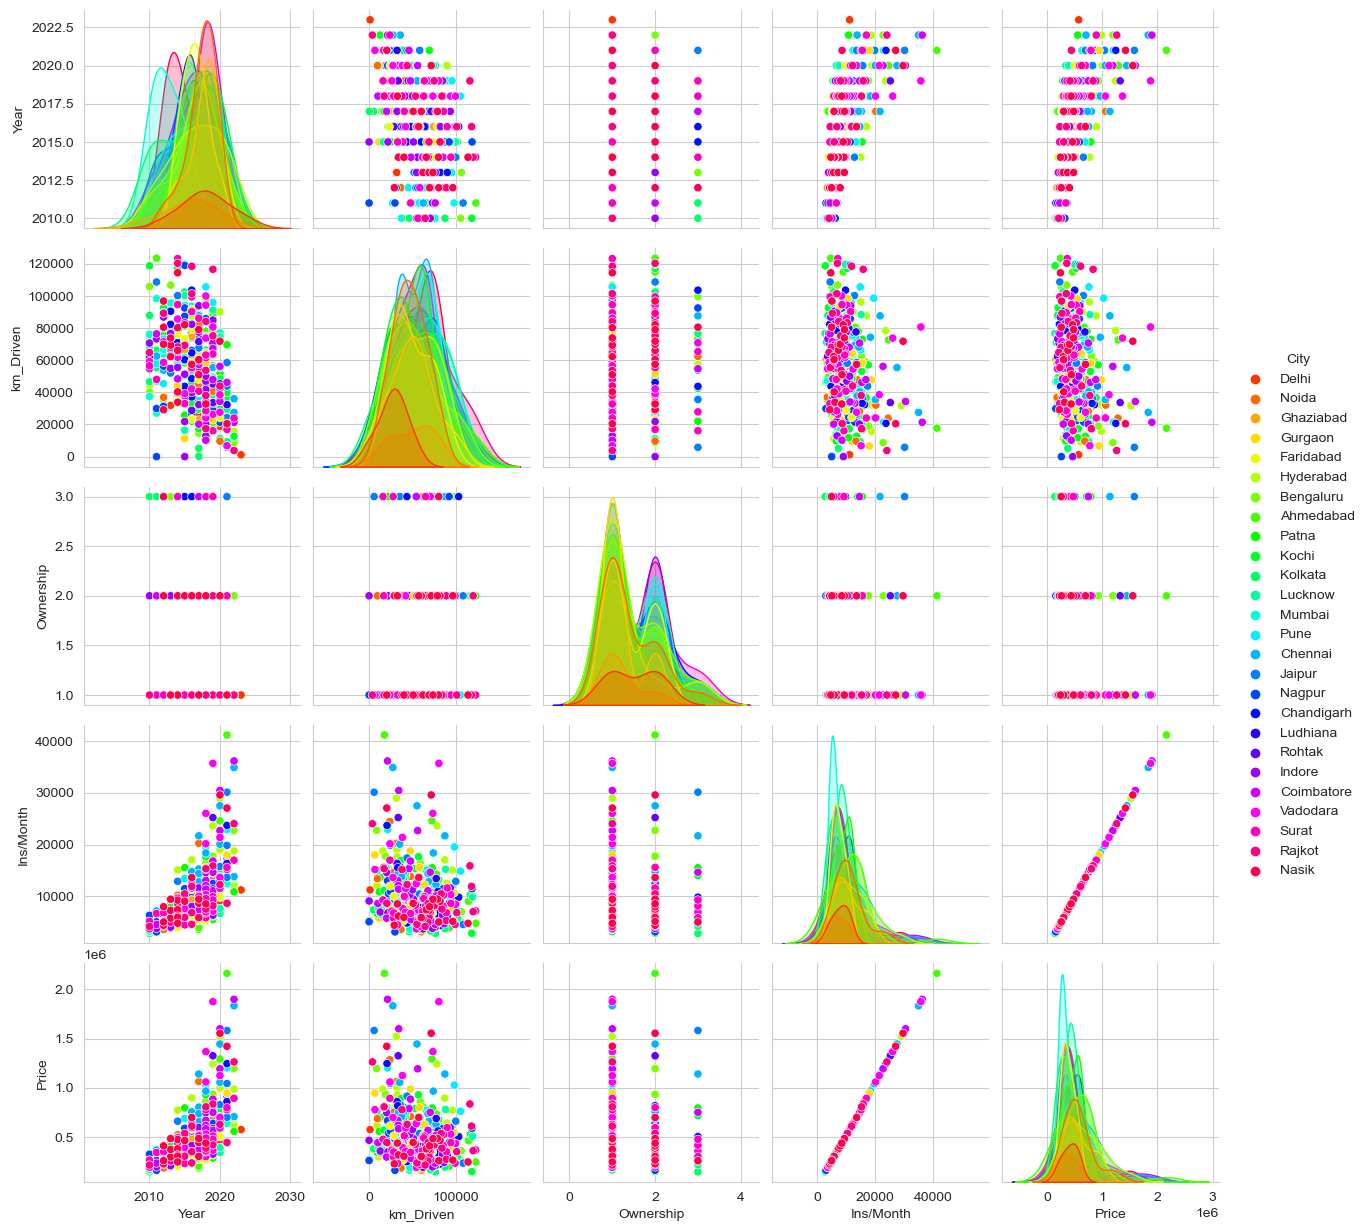

In [328]:
plt.close();
sns.set_style('whitegrid');
sns.pairplot(df,hue='City', palette='hsv');
plt.show()

In [214]:
df.head(1)

Year           Model  km_Driven  Ownership Fuel_type Transmission  \
0  2017  Maruti Celerio      35107          1    Petrol       Manual   

   Ins/Month   City   Price  
0       7546  Delhi  386000

Text(0.5, 1.0, 'Correlation Heatmap')

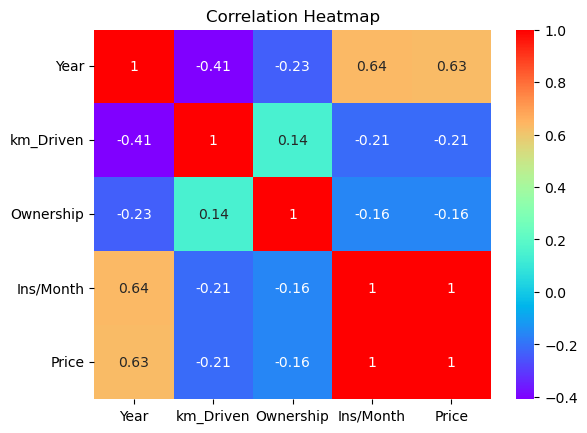

In [215]:
corr_mat = df[['Year','km_Driven','Ownership','Ins/Month','Price']].corr()

# plt.figure(figsize=(10,8))

sns.heatmap(corr_mat, annot=True, cmap='rainbow')
plt.title('Correlation Heatmap')

Text(0.5, 1.0, 'Correlation Heatmap')

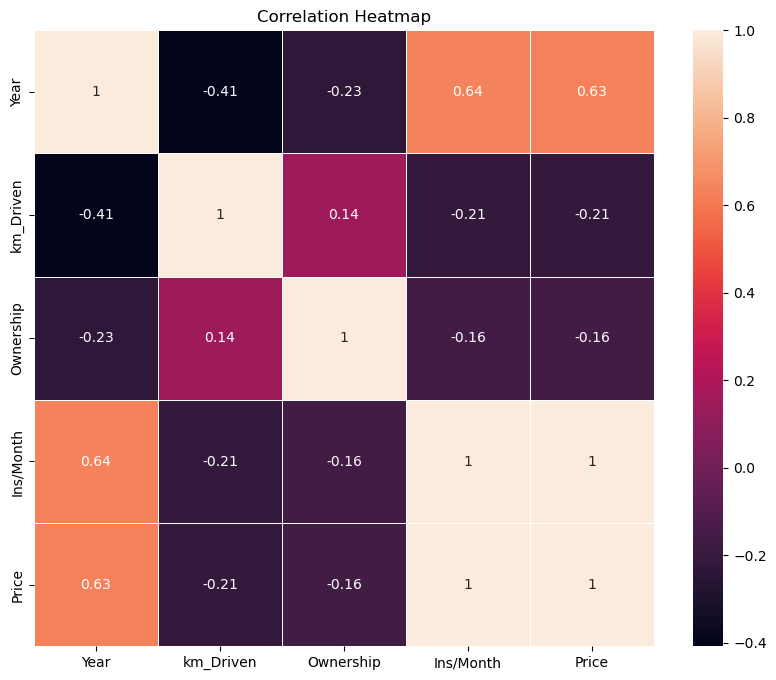

In [217]:
corr_mat = df[['Year','km_Driven','Ownership','Ins/Month','Price']].corr()

plt.figure(figsize=(10,8))

sns.heatmap(corr_mat, annot=True,  linewidths=0.5)
plt.title('Correlation Heatmap')

from the heat map plot we can absoverb that the PRICE and INT/MONTH(EMI) are stongly positive correlated value.

# Conclusion

==>> Price Comparison: buyer to easily compare price and features of the different used cars. This is the transparency can help buyers makes informerd decision and find the best deals.  

==>> Used cars are generally more affordable then new cars becouse they have already experianced significant depreciation. New cars typically lose values quikly in the first few years.  

==>> The used cars market offers a wide variate of the makes, models, and years. This is diversity allows buyers to find a vehicle that suits their needs and preference..  

==>> Look into the long-term ownership costs of the specific vehicle, including fuel efficiency, insurance rates,and potential costs.

# Recommendations..

==>> Estimate ongoing onwership costs, including fuel efficiency, insuranmce rates, and potential repair expenses.These costs can vary by make and model..  

==>> Contact yours insurnace providers to get an estimate of insurance costs for the specific makes and model you're considering.  

==>> think about the cars fuel efficiency, especially if you have specific mileage requiements or want to reduce your environmental footprint.

==>> Ask the seller about the cars ownership history. Understanding how many previous owners the car has had can provide insights into how well it has been maintained.